In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.linear_model
import sklearn.model_selection
import sklearn.neighbors
import sklearn.naive_bayes
import sklearn.ensemble 
import xgboost as xgb
import tensorflow as tf

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error

import lightgbm as lgb
from lightgbm import early_stopping

from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression
import catboost as cb
from catboost import *
from catboost import CatBoostClassifier
from catboost.utils import eval_metric

import matplotlib.pyplot as plt
import seaborn as sns

import ydata_profiling
from ydata_profiling import ProfileReport
import optuna
from optuna import Trial
import scipy
from scipy.stats import yeojohnson, skew, mode

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.inspection import permutation_importance
from sklearn.datasets import make_multilabel_classification
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
import imblearn
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_colwidth = 200

Package versions

In [2]:
print('pandas:',pd.__version__)
print('numpy:',np.__version__)
print('scikit-learn:',sklearn.__version__)
print('SciPy:',scipy.__version__)
print('Tensorflow:',tf.__version__)
print('XGBoost:',xgb.__version__)
print('CatBoost:',cb.__version__)
print('LightGBM:',lgb.__version__)
print('Optuna:',optuna.__version__)
print('imblearn:',imblearn.__version__)
print('ydata_profiling:',ydata_profiling.__version__)

pandas: 1.5.3
numpy: 1.23.5
scikit-learn: 1.2.2
SciPy: 1.9.3
Tensorflow: 2.10.0
XGBoost: 1.7.5
CatBoost: 1.1.1
LightGBM: 3.3.5
Optuna: 3.1.1
imblearn: 0.10.1
ydata_profiling: v4.1.2


The horse racing dataset used was sourced from Kaggle named "Horse Racing in HK". It contains racing records of every horse race event that occurred between June 2nd, 1997, and approximately August 7th, 2005, from two race tracks in Shatin and Happy Valley. You can access and download the dataset [here](https://www.kaggle.com/gdaley/hkracing).

In [3]:
races = pd.read_csv(r'C:\Projects\HorseML\races.csv')
runs = pd.read_csv(r'C:\Projects\HorseML\runs.csv')

In [4]:
races.head()

race_id        date venue  race_no config  surface  distance         going  \
0        0  1997-06-02    ST        1      A        0      1400  GOOD TO FIRM   
1        1  1997-06-02    ST        2      A        0      1200  GOOD TO FIRM   
2        2  1997-06-02    ST        3      A        0      1400  GOOD TO FIRM   
3        3  1997-06-02    ST        4      A        0      1200  GOOD TO FIRM   
4        4  1997-06-02    ST        5      A        0      1600  GOOD TO FIRM   

  horse_ratings      prize  ...  place_combination3  place_combination4  \
0         40-15   485000.0  ...                 6.0                 NaN   
1         40-15   485000.0  ...                 4.0                 NaN   
2         60-40   625000.0  ...                13.0                 NaN   
3        120-95  1750000.0  ...                10.0                 NaN   
4         60-40   625000.0  ...                 1.0                 NaN   

   place_dividend1  place_dividend2  place_dividend3  place_dividend4  \
0             36.5             25.5             18.0              NaN   
1             12.5             47.0             33.5              NaN   
2             23.0             23.0             59.5              NaN   
3             14.0             24.5             16.0              NaN   
4             15.5             28.0             17.5              NaN   

   win_combination1  win_dividend1  win_combination2  win_dividend2  
0                 8          121.0               NaN            NaN  
1                 5           23.5               NaN            NaN  
2                11           70.0               NaN            NaN  
3                 5           52.0               NaN            NaN  
4                 2           36.5               NaN            NaN  

[5 rows x 37 columns]

In [5]:
runs.head()

race_id  horse_no  horse_id  result  won  lengths_behind  horse_age  \
0        0         1      3917      10  0.0            8.00          3   
1        0         2      2157       8  0.0            5.75          3   
2        0         3       858       7  0.0            4.75          3   
3        0         4      1853       9  0.0            6.25          3   
4        0         5      2796       6  0.0            3.75          3   

  horse_country horse_type  horse_rating  ...  time2  time3  time4  time5  \
0           AUS    Gelding            60  ...  21.59  23.86  24.62    NaN   
1            NZ    Gelding            60  ...  21.99  23.30  23.70    NaN   
2            NZ    Gelding            60  ...  21.59  23.90  24.22    NaN   
3           SAF    Gelding            60  ...  21.83  23.70  24.00    NaN   
4            GB    Gelding            60  ...  21.75  23.22  23.50    NaN   

   time6  finish_time  win_odds  place_odds  trainer_id  jockey_id  
0    NaN        83.92       9.7         3.7         118          2  
1    NaN        83.56      16.0         4.9         164         57  
2    NaN        83.40       3.5         1.5         137         18  
3    NaN        83.62      39.0        11.0          80         59  
4    NaN        83.24      50.0        14.0           9        154  

[5 rows x 37 columns]

In [6]:
df = runs.merge(races, on="race_id", how = 'inner')
df.tail()

race_id  horse_no  horse_id  result  won  lengths_behind  horse_age  \
79442     6348        10      1238       6  0.0            1.25          5   
79443     6348        11       985       7  0.0            2.25          5   
79444     6348        12      3147      10  0.0            3.00          5   
79445     6348        13      1982       8  0.0            2.50          3   
79446     6348        14      3491      11  0.0            4.25          3   

      horse_country horse_type  horse_rating  ... place_combination3  \
79442           AUS    Gelding            87  ...                8.0   
79443            NZ    Gelding            84  ...                8.0   
79444            NZ    Gelding            83  ...                8.0   
79445           AUS    Gelding            82  ...                8.0   
79446           IRE    Gelding            81  ...                8.0   

       place_combination4  place_dividend1  place_dividend2  place_dividend3  \
79442                 NaN             38.0             63.0             18.5   
79443                 NaN             38.0             63.0             18.5   
79444                 NaN             38.0             63.0             18.5   
79445                 NaN             38.0             63.0             18.5   
79446                 NaN             38.0             63.0             18.5   

       place_dividend4  win_combination1  win_dividend1  win_combination2  \
79442              NaN                 2          134.0               NaN   
79443              NaN                 2          134.0               NaN   
79444              NaN                 2          134.0               NaN   
79445              NaN                 2          134.0               NaN   
79446              NaN                 2          134.0               NaN   

       win_dividend2  
79442            NaN  
79443            NaN  
79444            NaN  
79445            NaN  
79446            NaN  

[5 rows x 73 columns]

In [7]:
df = df.dropna(subset=['place_odds'])

In [8]:
df['date'] = pd.to_datetime(df['date'])

# Feature Engineering



*    Recent Performance: Rolling average of the results from the last three races.

*   Rolling Average Speed: Rolling average of finishing times from the last three races.

*   Horse Weight: Weight of the horse without gear.
    
*  Horse Gear: Quantifies the number of pieces of gear that the horse is equipped with.

* Cumulative Races: Total number of races the horse has participated in up to the current point.

* Jockey Win Rate: Current winning rate of the jockey.

* Trainer Win Rate: Current winning rate of the trainer.

*    Win Rate: Current winning rate of the horse at the given time.

*   Place Rate: Current placement rate (top three finish) of the horse at the given time.

*  Show Rate: Current show rate (top four finish) of the horse at the given time.

*   First 2 Races: Boolean value indicates whether the race falls within a horse's initial two races. Given that the rolling average window requires a minimum of three races, this designation assists the model in distinguishing the 0s that result from a horse not winning a race instead of lack of races



In [9]:
df = df.sort_values(['horse_id', 'race_id'])

df['Track_specific_performance'] = df.groupby(['surface', 'horse_id'])['result'] \
    .transform(lambda x: x.expanding(1).mean().shift())

df.set_index(['horse_id', 'race_id'], inplace=True)


performance_df = df.pivot(columns='surface', values='Track_specific_performance')

performance_df.columns = ['turf_performance', 'dirt_performance']

performance_df = performance_df.fillna(0)

df = df.merge(performance_df, left_index=True, right_index=True)

df.reset_index(inplace=True)


# Calculate Trainer_win_rate over time
df = df.sort_values(by=['trainer_id', 'race_id'])
grouped = df.groupby('trainer_id')
trainer_win_rate = grouped['won'].apply(lambda x: x.shift().expanding().mean())
trainer_win_rate = trainer_win_rate.reset_index(level=0, drop=True)
df['trainer_win_rate'] = trainer_win_rate

# Calculate Recent_performance
df = df.sort_values(['horse_id', 'race_id'], ascending=[True, True])
df['Recent_performance_3'] = df.groupby('horse_id')['result'].rolling(window=3).mean().reset_index(drop=True)
df['Recent_performance_3'] = df['Recent_performance_3'].shift()
df['first_2_races'] = df['Recent_performance_3'].isna().astype(int)
df['Recent_performance_3'] = df['Recent_performance_3'].fillna(0)

# Calculate Average_speed for the last 4 races
df['speed'] = df['distance'] / df['finish_time']
df['rolling_avg_speed'] = df.groupby('horse_id')['speed'].rolling(window=3).mean().reset_index(drop=True)
df['rolling_avg_speed'] = df.groupby('horse_id')['rolling_avg_speed'].shift()
df['rolling_avg_speed'] = df['rolling_avg_speed'].fillna(0)

# Calculate weight difference between declared horse + carry weight and actual carry weight to get the horse' true weight
df['horse_weight'] = df['declared_weight'] - df['actual_weight']  
 

# Count the pieces of gear the horse is wearing
df.loc[(df['horse_gear'] == '--'), 'horse_gear'] = '0'
df['horse_gear'] = df['horse_gear'].apply(lambda x: int(len(x.split('/'))) if x != '0' else 0)
df['horse_gear'] = df['horse_gear'].astype(int)

# Amount of races done by the horse at that time
df['cumulative_races'] = df.groupby('horse_id').cumcount()

In [10]:
# Calculate jockey winrate over time
df = df.sort_values(by=['jockey_id', 'race_id'])
grouped = df.groupby('jockey_id')
jockey_win_rate = grouped['won'].apply(lambda x: x.shift().expanding().mean())
jockey_win_rate = jockey_win_rate.reset_index(level=0, drop=True)
df['jockey_win_rate'] = jockey_win_rate

# Calculate win/place/show rates over time
df['place_rate'] = (df['result'] <= 2)
df['show_rate'] = (df['result'] <= 3)
df = df.sort_values(by=['horse_id', 'race_id'])
grouped = df.groupby('horse_id')

rolling_win_rate = grouped['won'].apply(lambda x: x.shift().expanding().mean())
rolling_place_rate = grouped['place_rate'].apply(lambda x: x.shift().expanding().mean())
rolling_show_rate = grouped['show_rate'].apply(lambda x: x.shift().expanding().mean())

rolling_win_rate = rolling_win_rate.reset_index(level=0, drop=True)
rolling_place_rate = rolling_place_rate.reset_index(level=0, drop=True)
rolling_show_rate = rolling_show_rate.reset_index(level=0, drop=True)

df['rolling_win_rate'] = rolling_win_rate
df['rolling_place_rate'] = rolling_place_rate
df['rolling_show_rate'] = rolling_show_rate


df.drop(columns=['place_rate', 'show_rate','speed'], inplace=True)
df[['trainer_win_rate','rolling_avg_speed','jockey_win_rate','rolling_win_rate','rolling_place_rate', 'rolling_show_rate']] = df[['trainer_win_rate','rolling_avg_speed','jockey_win_rate','rolling_win_rate','rolling_place_rate', 'rolling_show_rate']].fillna(0)


In [11]:
# Restoring data to it's original placement
df = df.sort_values(['race_id', 'horse_no'], ascending=[True, True])
df = df.reset_index(drop=True)
df.tail()

horse_id  race_id  horse_no  result  won  lengths_behind  horse_age  \
75707      1153     6128        10      11  0.0            8.25          4   
75708      1925     6128        11       6  0.0            5.50          6   
75709      2531     6128        12       4  0.0            4.50          3   
75710       212     6128        13       9  0.0            7.00          4   
75711      1229     6128        14      10  0.0            7.50          3   

      horse_country horse_type  horse_rating  ...  trainer_win_rate  \
75707            NZ    Gelding            65  ...          0.065599   
75708            GB    Gelding            64  ...          0.078857   
75709           AUS    Gelding            63  ...          0.122483   
75710           AUS      Horse            63  ...          0.131257   
75711           AUS    Gelding            63  ...          0.058140   

       Recent_performance_3  first_2_races  rolling_avg_speed  horse_weight  \
75707              6.000000              0          17.145825        1025.0   
75708              8.333333              0          16.915399         956.0   
75709              2.333333              0          17.056503        1006.0   
75710             10.000000              0          17.053430        1063.0   
75711              9.333333              0          17.058269        1035.0   

       cumulative_races  jockey_win_rate  rolling_win_rate  \
75707                 8         0.054835          0.250000   
75708                34         0.096282          0.058824   
75709                 6         0.205382          0.166667   
75710                14         0.167645          0.071429   
75711                 4         0.061052          0.000000   

       rolling_place_rate  rolling_show_rate  
75707            0.375000           0.625000  
75708            0.088235           0.205882  
75709            0.500000           0.666667  
75710            0.071429           0.285714  
75711            0.000000           0.000000  

[5 rows x 86 columns]

In [12]:
df_temp = df.copy()
# drops columns based off threshhold
df_temp.dropna( axis=1, thresh=len(df) - 10, inplace = True) 
df_temp.shape
df_temp = df_temp.dropna()
df_temp.shape

(75710, 61)

Remove this one

# Data Cleaning/Feature Engineering

In [13]:
# odds = df_temp.groupby("race_id")["win_odds"].rank("dense").astype(int)
# print(classification_report(df_temp['result'],odds))

In [14]:
df_temp.head()

horse_id  race_id  horse_no  result  won  lengths_behind  horse_age  \
0      3917        0         1      10  0.0            8.00          3   
1      2157        0         2       8  0.0            5.75          3   
2       858        0         3       7  0.0            4.75          3   
3      1853        0         4       9  0.0            6.25          3   
4      2796        0         5       6  0.0            3.75          3   

  horse_country horse_type  horse_rating  ...  trainer_win_rate  \
0           AUS    Gelding            60  ...          0.103169   
1            NZ    Gelding            60  ...          0.075445   
2            NZ    Gelding            60  ...          0.067308   
3           SAF    Gelding            60  ...          0.065380   
4            GB    Gelding            60  ...          0.063804   

   Recent_performance_3  first_2_races  rolling_avg_speed  horse_weight  \
0              6.000000              0                0.0         887.0   
1             12.000000              0                0.0         847.0   
2             11.666667              0                0.0         950.0   
3              0.000000              1                0.0         991.0   
4              4.333333              0                0.0         841.0   

   cumulative_races  jockey_win_rate  rolling_win_rate  rolling_place_rate  \
0                 0         0.088235               0.0                 0.0   
1                 0         0.106557               0.0                 0.0   
2                 0         0.057880               0.0                 0.0   
3                 0         0.052925               0.0                 0.0   
4                 0         0.074419               0.0                 0.0   

   rolling_show_rate  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 61 columns]

In [15]:
df_drop = df_temp.drop(['date','won','horse_no','race_no','horse_id', 'jockey_id','trainer_id',
       'place_combination1', 'place_combination2',
       'place_dividend1', 'place_dividend2', 'win_combination1',
       'win_dividend1','sec_time1', 'sec_time2', 'sec_time3', 'time1_y',
       'time2_y', 'time3_y', 'position_sec1',
       'position_sec2', 'position_sec3', 'behind_sec1', 'behind_sec2',
       'behind_sec3', 'time1_x', 'time2_x', 'time3_x', 'lengths_behind'], axis = 1)

categorical_cols = ['horse_type', 
                    'venue',
                    'config', 
                    'going', 
                    'horse_ratings',
                    'horse_country',
                    'race_class']

continuous = ['horse_age',
              'horse_rating',
              'horse_gear',
              'win_odds',
              'place_odds',
              'declared_weight',
              'actual_weight',
              'distance',
              'turf_performance', 
              'dirt_performance',
              'trainer_win_rate',
              'Recent_performance_3',
              'rolling_avg_speed',
              'horse_weight',
              'jockey_win_rate',
              'rolling_win_rate',
              'rolling_place_rate',
              'rolling_show_rate']
df_drop.columns

Index(['race_id', 'result', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'horse_gear', 'declared_weight', 'actual_weight',
       'draw', 'finish_time', 'win_odds', 'place_odds', 'venue', 'config',
       'surface', 'distance', 'going', 'horse_ratings', 'race_class',
       'turf_performance', 'dirt_performance', 'trainer_win_rate',
       'Recent_performance_3', 'first_2_races', 'rolling_avg_speed',
       'horse_weight', 'cumulative_races', 'jockey_win_rate',
       'rolling_win_rate', 'rolling_place_rate', 'rolling_show_rate'],
      dtype='object')

In [16]:
def catagorize(df):
    for col in categorical_cols:
        df[col] = df[col].astype('category')
    return df

In [17]:
# df_keep_cata = catagorize(df_keep_cata)

In [18]:
df_keep_cata = df_drop.copy()

In [19]:
df_drop = pd.get_dummies(df_drop,columns=categorical_cols)


In [20]:
df_drop.head()

race_id  result  horse_age  horse_rating  horse_gear  declared_weight  \
0        0      10          3            60           0           1020.0   
1        0       8          3            60           0            980.0   
2        0       7          3            60           0           1082.0   
3        0       9          3            60           0           1118.0   
4        0       6          3            60           0            972.0   

   actual_weight  draw  finish_time  win_odds  ...  race_class_0  \
0            133     7        83.92       9.7  ...             0   
1            133    12        83.56      16.0  ...             0   
2            132     8        83.40       3.5  ...             0   
3            127    13        83.62      39.0  ...             0   
4            131    14        83.24      50.0  ...             0   

   race_class_1  race_class_2  race_class_3  race_class_4  race_class_5  \
0             0             0             0             0             1   
1             0             0             0             0             1   
2             0             0             0             0             1   
3             0             0             0             0             1   
4             0             0             0             0             1   

   race_class_6  race_class_11  race_class_12  race_class_13  
0             0              0              0              0  
1             0              0              0              0  
2             0              0              0              0  
3             0              0              0              0  
4             0              0              0              0  

[5 rows x 107 columns]

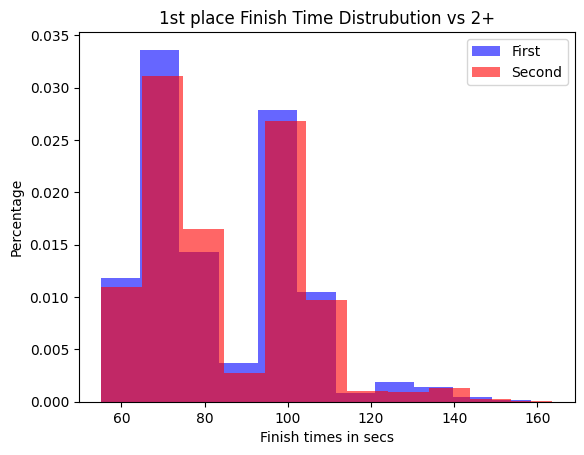

In [21]:
  plt.hist(df_drop[df_drop['result']==1]['finish_time'], color='blue', label="First", density=True,alpha=0.6,  bins=11)
  plt.hist(df_drop[df_drop['result']>=2]['finish_time'], color='red', label="Second", density=True,alpha=0.6, bins=11)

  # plt.hist(df_drop[df_drop['result']==3]['finish_time'], color='pink', label="Third", alpha=0.6, bins=8)

  plt.title("1st place Finish Time Distrubution vs 2+")
  plt.ylabel("Percentage")
  plt.xlabel("Finish times in secs")
  plt.legend()
  plt.show()

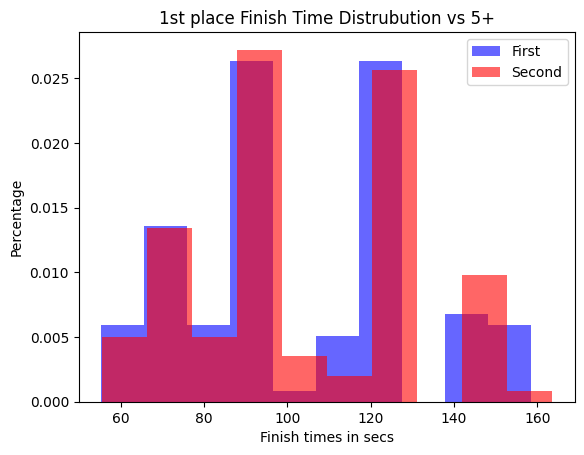

In [22]:
class_1 = df_drop.query('race_class_11 == 1')
plt.hist(class_1[class_1['result']==1]['finish_time'], color='blue', label="First", density=True,alpha=0.6,  bins=10)
plt.hist(class_1[class_1['result']>=2]['finish_time'], color='red', label="Second", density=True,alpha=0.6, bins=10)

plt.title("1st place Finish Time Distrubution vs 5+")
plt.ylabel("Percentage")
plt.xlabel("Finish times in secs")
plt.legend()
plt.show()

Finish time for regression, result for classification

## Datasets

In [23]:
# Test Train Split based off of race_id

# Train sets
gss = GroupShuffleSplit(test_size=.20, n_splits=1, random_state = 42).split(df_drop, groups=df_drop['race_id'])
X_train_inds, X_test_inds = next(gss)
train_data = df_drop.iloc[X_train_inds]
TrainX = train_data.loc[:, ~train_data.columns.isin(['race_id','result','finish_time'])]
TrainYClass = train_data.loc[:, train_data.columns.isin(['result'])]
TrainYReg = train_data.loc[:, train_data.columns.isin(['finish_time'])]
TrainYOVA = (TrainYClass.result == 1).astype(int)

# Eval sets
gss2 = GroupShuffleSplit(test_size=.20, n_splits=1, random_state = 42).split(train_data, groups=train_data['race_id'])
X_train_val_inds, X_eval_inds = next(gss2)
train_val_data = train_data.iloc[X_train_val_inds]
eval_data = train_data.iloc[X_eval_inds]
TrainXNN = train_val_data.loc[:, ~train_val_data.columns.isin(['race_id','result','finish_time'])]
TrainYClassNN = train_val_data.loc[:, train_val_data.columns.isin(['result'])]
TrainYRegNN = train_val_data.loc[:, train_val_data.columns.isin(['finish_time'])]
TrainYOVANN = (TrainYClassNN.result == 1).astype(int)

EvalX = eval_data.loc[:, ~eval_data.columns.isin(['race_id','result','finish_time'])]
EvalY = eval_data.loc[:, eval_data.columns.isin(['result','race_id'])]
EvalYOVA = (EvalY.result == 1).astype(int)
EvalReg = eval_data.loc[:, eval_data.columns.isin(['finish_time'])]


# Test sets
test_data= df_drop.iloc[X_test_inds]


X_test = test_data.loc[:, ~test_data.columns.isin(['race_id','result','finish_time'])]
TestYClass = test_data.loc[:, test_data.columns.isin(['result','race_id'])]
Y_test_reg = test_data.loc[:, test_data.columns.isin(['finish_time','result','race_id'])]
TestYClassOVA = (TestYClass.result == 1).astype(int)

In [24]:
train_data_cat = df_keep_cata.iloc[X_train_inds]
test_data_cat = df_keep_cata.iloc[X_test_inds]
train_val_cat_data = train_data_cat.iloc[X_train_val_inds]
eval_cat_data = train_data_cat.iloc[X_eval_inds]

# Training for CatBoost
TrainXCat = train_val_cat_data.loc[:, ~train_val_cat_data.columns.isin(['race_id','result','finish_time'])]
TrainYCatClass = train_val_cat_data.loc[:, train_val_cat_data.columns.isin(['result'])]
TrainYCatReg = train_val_cat_data.loc[:, train_val_cat_data.columns.isin(['finish_time'])]
TrainYCatOVA = (TrainYCatClass.result == 1).astype(int)

# Eval for CatBoost
EvalXCat = eval_cat_data.loc[:, ~eval_cat_data.columns.isin(['race_id','result','finish_time'])]
EvalYCat = eval_cat_data.loc[:, eval_cat_data.columns.isin(['result','race_id'])]
EvalRegCat = eval_cat_data.loc[:, eval_cat_data.columns.isin(['finish_time'])]

# Testing for CatBoost 
X_testCat = test_data_cat.loc[:, ~test_data_cat.columns.isin(['race_id','result','finish_time'])]

In [25]:
balancer = RandomOverSampler(random_state=42)
TrainXOVABalanced, TrainYOVABalanced = balancer.fit_resample(TrainX, TrainYOVA)
TrainXOVABalanced = pd.DataFrame(TrainXOVABalanced, columns=TrainX.columns)
TrainYOVABalanced = pd.DataFrame(TrainYOVABalanced, columns=["result"])

In [26]:
TrainXOVABalancedNN, EvalXOVABalanced, TrainYOVABalancedNN, EvalYOVABalanced, = train_test_split(TrainXOVABalanced, TrainYOVABalanced,random_state=42, stratify=TrainYOVABalanced)

In [27]:
TrainXCatOVABalance, TrainYCatOVABalance = balancer.fit_resample(TrainXCat, TrainYCatOVA)

In [28]:
TrainXCatOVABalancedNN, EvalXCatOVABalanced, TrainYCatOVABalancedNN, EvalYCatOVABalanced, = train_test_split(TrainXCatOVABalance, TrainYCatOVABalance,random_state=42, stratify=TrainYCatOVABalance)

In [29]:
TrainXCat = catagorize(TrainXCat)
EvalXCat = catagorize(EvalXCat)
catxtest = catagorize(X_testCat)
TrainXCatOVABalancedNN = catagorize(TrainXCatOVABalancedNN)
EvalXCatOVABalanced = catagorize(EvalXCatOVABalanced)
cat_features = [TrainXCat.columns.get_loc(col) for col in categorical_cols]

In [30]:
def BettingResults(y_pred, output=False):
    df = TestYClass
    df['prediction'] = y_pred

    total_races = df['race_id'].nunique()
    accuracies = {}

    # Win
    win_correct = sum(df[df['result'] == 1]['prediction'] == 1)
    accuracies['win'] = win_correct / total_races

    # Place
    place_correct = sum(df[df['result'] <= 2].groupby('race_id')['prediction'].min() <= 2)
    accuracies['place'] = place_correct / total_races

    # Show
    show_correct = sum(df[df['result'] <= 3].groupby('race_id')['prediction'].min() <= 3)
    accuracies['show'] = show_correct / total_races
    
    # Calculate exacta accuracy
    exacta_df = df[(df['prediction'] == df['result']) & (df['result'] <= 2)]
    matched_counts = exacta_df.groupby('race_id').size()
    exacta_correct = sum(matched_counts == 2)
    accuracies['exacta'] = exacta_correct / total_races

    # Quinella
    quinella_df = df[(df['prediction'] <= 2) & (df['result'] <= 2)]
    matched_counts = quinella_df.groupby('race_id').size()
    quinella_correct = sum(matched_counts == 2)
    accuracies['quinella'] = quinella_correct / total_races

    # Trifecta (Note: A few models returned 0 for trifecta so adding 1e-9 buffer so that the geometric mean doesn't go to 0)
    trifecta_df = df[(df['prediction'] == df['result']) & (df['result'] <= 3)]
    matched_counts = trifecta_df.groupby('race_id').size()
    trifecta_correct = sum(matched_counts == 3)
    accuracies['trifecta'] = max(trifecta_correct / total_races, 1e-9)
    boxed_trifecta = df[(df['prediction'] <= 3) & (df['result'] <= 3)]
    matched_counts = boxed_trifecta.groupby('race_id').size()
    boxed_trifecta_correct = sum(matched_counts == 3)

    # Calculate boxed trifecta accuracy
    accuracies['boxed trifecta'] = boxed_trifecta_correct / total_races
    
    # Calculate the geometric mean
    accuracies['Geometric Mean'] = scipy.stats.gmean(list(accuracies.values()))
    
    if output:
        return accuracies

    for key, value in accuracies.items():
        print("{}: {}".format(key, value))
        

In [31]:
def RegResults(prediction, results=True):
    df_dummy = Y_test_reg.copy()
    df_dummy['pred'] = prediction
    df_dummy['result_pred'] = df_dummy.groupby('race_id')['pred'].rank('dense').astype(int)
    if results:
        print(classification_report(TestYClass['result'], df_dummy['result_pred']))
        print('\n')
        BettingResults(df_dummy['result_pred'])
    else:
        return df_dummy['result_pred'].reset_index(drop=True)

In [32]:
def cutoffSearch(y_proba,ground_truth=TestYClassOVA):
    res = []
    f1Max = [0,0]
    precisionMax = [0,0]
    recallMax = [0,0]
    for i in np.arange(0.0,1.01,0.01):

        cur = []
        test = [1 if value > i else 0 for value in y_proba]
        curPrec = sklearn.metrics.precision_score(ground_truth,test)
        cur.append(curPrec)
        if curPrec > precisionMax[0]:
            precisionMax = [curPrec, i]
        curRec = sklearn.metrics.recall_score(ground_truth,test)
        cur.append(curRec)
        if curRec > recallMax[0]:
            recallMax = [curRec, i]
        curf1 = sklearn.metrics.f1_score(ground_truth,test)
        cur.append(curf1)
        if curf1 > f1Max[0]:
            f1Max = [curf1, i]
        res.append(cur)

    print("Largest F1:",f1Max)
    print("Largest precision:",precisionMax)
    print("Largest recall:",recallMax)

    res = np.array(res)

    plt.plot(np.arange(0.0,1.01,0.01), res[:,0],label='Precision')
    plt.plot(np.arange(0.0,1.01,0.01), res[:,1],label='Recall')
    plt.plot(np.arange(0.0,1.01,0.01), res[:,2],label='F1')
    plt.title("Metrics for Classification Cutoffs")
    plt.xlabel("Cutoff")
    plt.ylabel("Score")
    plt.legend()
    plt.show()

In [33]:
print('Run complete')

Run complete


# Run here

The models below are designed to be modular in that they can be run independent of other models already hyper-parameter tuned. All that's needed is to run all the cells above this point then any model can be ran

# Data Exploration

This part can be skipped. This is just looking to see if there are any interesting trends within the data. This does not include all data exploration that was conducted during this project.

In [35]:
df_temp.groupby("horse_type")["result"].mean().sort_values().reset_index()

horse_type    result
0       Roan  6.595238
1      Horse  6.693820
2    Gelding  6.839658
3      Brown  6.842691
4        Rig  6.880000
5       Mare  7.039130
6       Colt  7.400000
7       Grey  8.000000
8      Filly  8.261905

In [36]:
df_temp.groupby("horse_type")["finish_time"].mean().sort_values().reset_index()

horse_type  finish_time
0       Grey    71.793529
1       Roan    76.310000
2      Brown    84.730966
3       Mare    85.163304
4    Gelding    85.256371
5        Rig    86.653333
6       Colt    86.788000
7      Filly    90.849524
8      Horse    94.229101

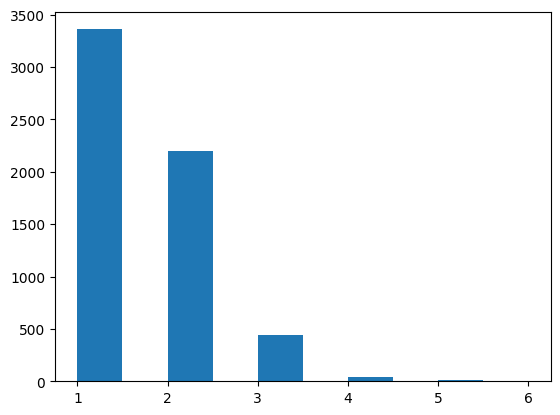

In [37]:
horse_types_per_races = df_temp.groupby("race_id")["horse_type"].nunique()
plt.hist(horse_types_per_races)
plt.show()

In [38]:
df_drop.groupby("horse_gear")["result"].mean().reset_index()

horse_gear    result
0           0  6.941399
1           1  6.506497
2           2  6.624804
3           3  6.446653
4           4  6.677778
5           5  6.000000

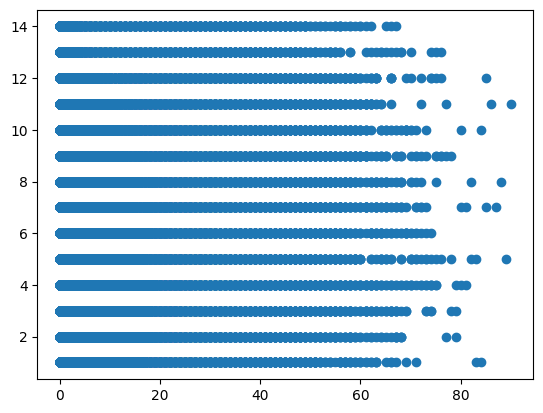

In [39]:
plt.scatter(df_temp['cumulative_races'], df_temp['result'])

In [40]:
df_keep_cata.groupby('race_class')['finish_time'].mean().reset_index()

race_class  finish_time
0           0    80.264854
1           1    86.347938
2           2    85.387630
3           3    83.501175
4           4    84.157100
5           5    90.392773
6           6    67.190084
7          11   103.477190
8          12    89.012379
9          13    89.742084

In [41]:
total_races_bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 20), (20, 30), (40, 50),(50,60),(60,70),(70,80),(80,90)])
test = df_keep_cata.copy()
test["race_range"] = pd.cut(test['cumulative_races'], bins=total_races_bins)
test.groupby('race_range')['result'].mean().sort_values().reset_index()

race_range    result
0   (10, 20]  6.395042
1   (70, 80]  6.761194
2   (80, 90]  6.800000
3   (20, 30]  6.827169
4   (60, 70]  6.865320
5    (0, 10]  6.898771
6   (40, 50]  7.140550
7   (50, 60]  7.239572

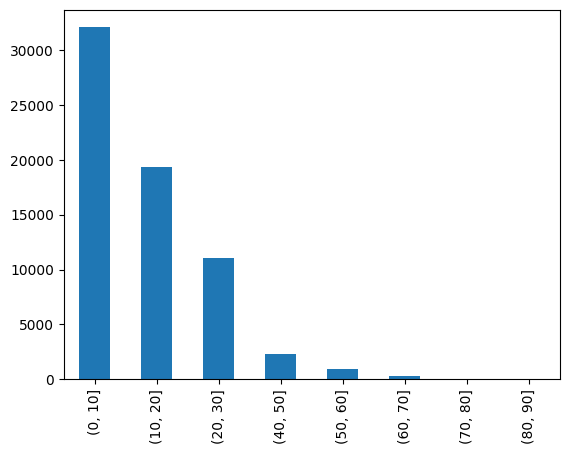

In [42]:
intervals_freq = test['race_range'].value_counts(sort=False)

intervals_freq.plot(kind='bar')
plt.show()

In [43]:
test.groupby('race_range')['rolling_place_rate'].mean().sort_values(ascending=False).reset_index()

race_range  rolling_place_rate
0   (10, 20]            0.188770
1   (20, 30]            0.187563
2   (40, 50]            0.171138
3   (50, 60]            0.163987
4   (60, 70]            0.157181
5    (0, 10]            0.151276
6   (70, 80]            0.140084
7   (80, 90]            0.128630

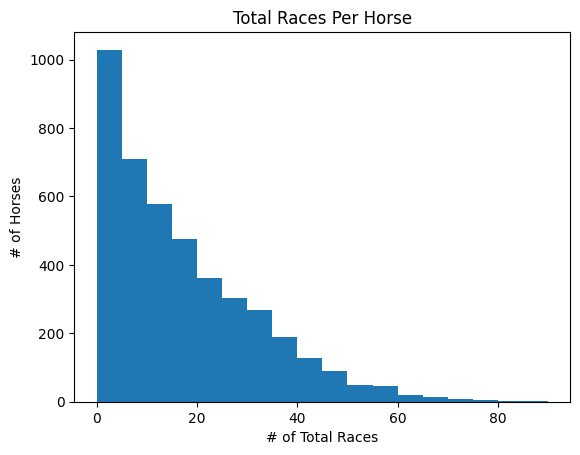

16.689252336448597
13.0


In [44]:
total_race_by_horse = df_temp.groupby("horse_id")["cumulative_races"].agg(lambda x: x.max())
plt.hist(total_race_by_horse,bins=18)
plt.title("Total Races Per Horse")
plt.ylabel("# of Horses")
plt.xlabel("# of Total Races")
plt.show()
print(total_race_by_horse.mean())
print(total_race_by_horse.median())

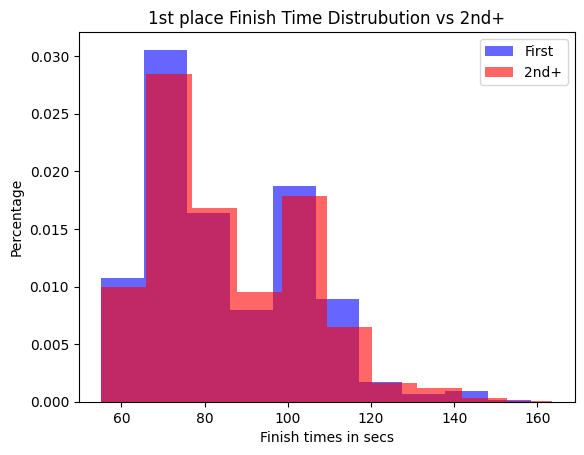

In [45]:
  plt.hist(df_temp[df_temp['result']==1]['finish_time'], color='blue', label="First", density=True,alpha=0.6,  bins=10)
  plt.hist(df_temp[df_temp['result']>=2]['finish_time'], color='red', label="2nd+", density=True,alpha=0.6, bins=10)

  plt.title("1st place Finish Time Distrubution vs 2nd+")
  plt.ylabel("Percentage")
  plt.xlabel("Finish times in secs")
  plt.legend()
  plt.show()

IQR 1.319999999999979
0.28000000000000114 80.05 2.3668844054903255


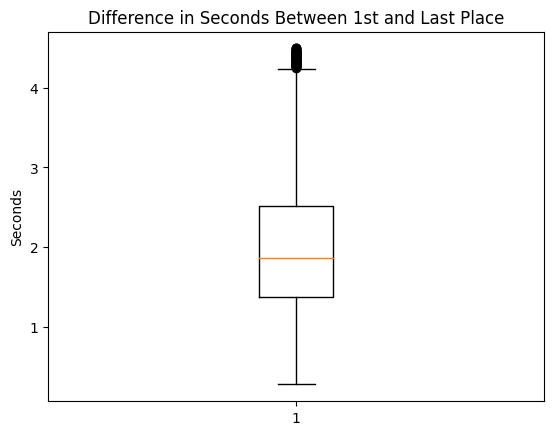

In [46]:
result = df_drop.groupby('race_id')['finish_time'].agg(lambda x: x.max() - x.min())
diff_split = [value for value in result if value < 4.5]
plt.boxplot(diff_split)
plt.title("Difference in Seconds Between 1st and Last Place")
plt.ylabel("Seconds")
Q1 = np.percentile(result, 25)
Q3 = np.percentile(result, 75)
print("IQR",Q3-Q1)
print(result.min(),result.max(),result.mean())

IQR:1.319999999999979
Min:0.06500000000001194
Max:2.4599999999999937
Mean:0.6644964445179428


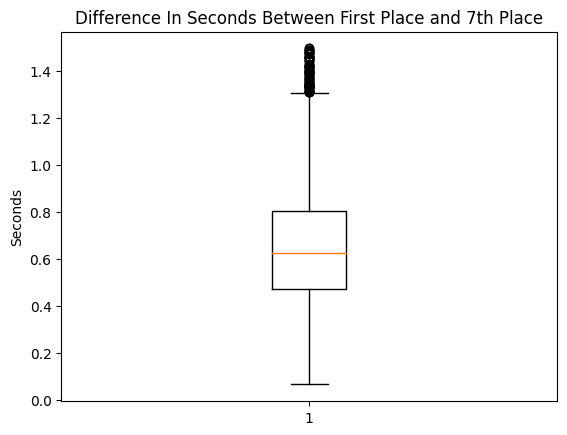

In [47]:
first_vs_mid_times = df_drop.groupby('race_id')['finish_time'].agg(lambda x: x.median() - x.min())
first_vs_mid_times_trimmed = [value for value in first_vs_mid_times if value < 1.5]
plt.boxplot(first_vs_mid_times_trimmed)
plt.title("Difference In Seconds Between First Place and 7th Place")
plt.ylabel("Seconds")
Q1 = np.percentile(result, 25)
Q3 = np.percentile(result, 75)
print(f"IQR:{Q3-Q1}")
print(f"Min:{first_vs_mid_times.min()}\nMax:{first_vs_mid_times.max()}\nMean:{first_vs_mid_times.mean()}")

In [48]:
df_temp.groupby('race_class')['finish_time'].mean().reset_index()

race_class  finish_time
0           0    80.264854
1           1    86.347938
2           2    85.387630
3           3    83.501175
4           4    84.157100
5           5    90.392773
6           6    67.190084
7          11   103.477190
8          12    89.012379
9          13    89.742084

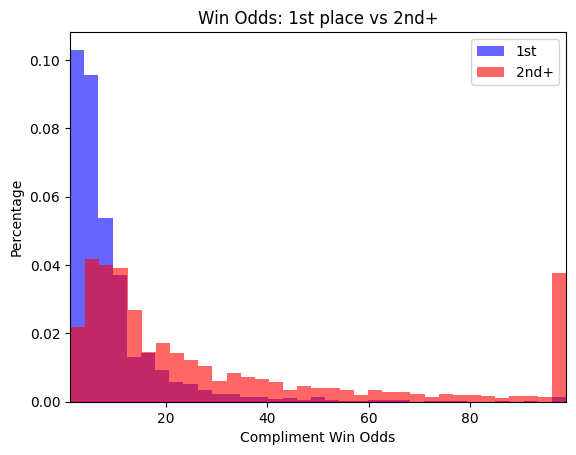

In [49]:
  plt.hist(df_temp[df_temp['result']==1]['win_odds'], color='blue', label="1st", density=True,alpha=0.6,  bins=35)
  plt.hist(df_temp[df_temp['result']>=2]['win_odds'], color='red', label="2nd+", density=True,alpha=0.6, bins=35)

  plt.title("Win Odds: 1st place vs 2nd+")
  plt.ylabel("Percentage")
  plt.xlabel("Compliment Win Odds")
  plt.margins(x=0)
  plt.legend()
  plt.show()

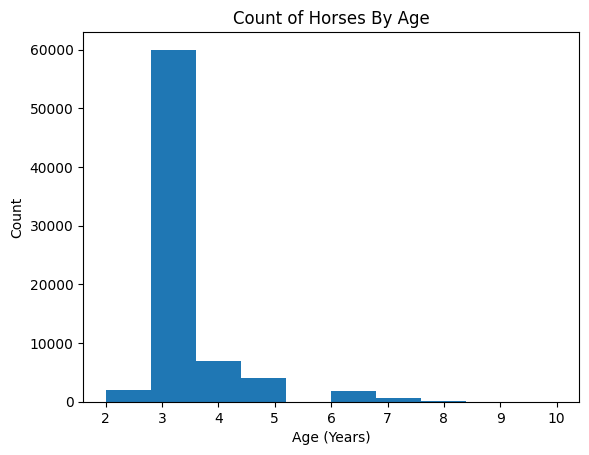

Mean: 3.293131686699247


In [50]:
age = df_temp["horse_age"]
plt.hist(age)
plt.title("Count of Horses By Age")
plt.ylabel("Count")
plt.xlabel("Age (Years)")
plt.show()
print(f"Mean: {age.mean()}")

In [51]:
df_drop.groupby("horse_age")["cumulative_races"].mean().reset_index()

horse_age  cumulative_races
0          2          2.054237
1          3         13.244658
2          4         14.054393
3          5         24.177146
4          6         34.113649
5          7         44.354651
6          8         55.604396
7          9         69.000000
8         10         68.500000

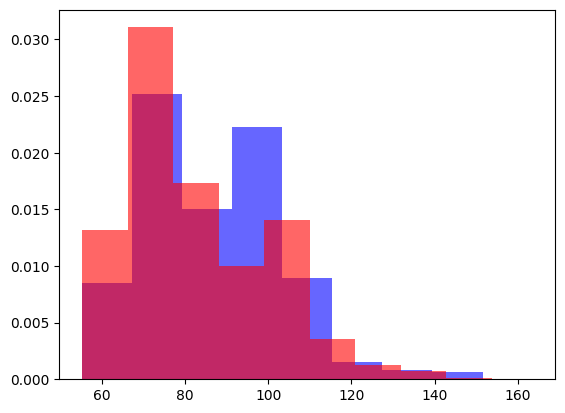

In [55]:
plt.hist(df_temp[df_temp['horse_weight']<=1050]['finish_time'], color='blue', label="First", density=True,alpha=0.6,  bins=9)
plt.hist(df_temp[df_temp['horse_weight']>1050]['finish_time'], color='red', label="2nd+", density=True,alpha=0.6, bins=9)
plt.show()

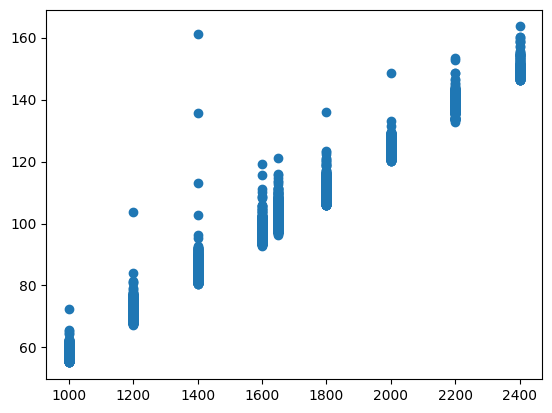

In [56]:
plt.scatter(df_drop['distance'],df_drop['finish_time'])
plt.show()

Below is a interesting widget for showing trends within the data

In [60]:
# profile = ProfileReport()
# profile.config.interactions.targets = ['result','finish_time']

In [59]:
# ProfileReport(df_drop) 


# Setting A Baseline

Consider a horse race with $N$ participants, each denoted as $x_{i}$. If a horse is selected randomly, the probability of correctly predicting its placement is $\frac{1}{N}$. The probability of $x_{i}$ is represented as $P(x_{i})$. Therefore, the expected True Positive rate (TP), the probability of a correct prediction for $x_{i}$'s placement, is $\frac{1}{N}P(x_{i})$.

Simultaneously, the False Negative rate (FN), the probability of an incorrect prediction for $x_{i}$'s placement, would be equal to $(1 - \frac{1}{N})P(x_{i})$.

For performance metrics, recall serves as an indicator of the proportion of actual $x_{i}$ instances that were correctly identified. More formally, it is defined as the ratio of True Positives to the sum of True Positives and False Negatives.

Substituting the expressions for TP and FN into this formula, we get:

$$\frac{\frac{1}{N}P(x_{i})}{\frac{1}{N} P(x_{i}) + (1 - \frac{1}{N}) P(x_{i})}$$

This simplifies to:
$$\frac{\frac{1}{N}}{\frac{1}{N} + (1 - \frac{1}{N})}$$

Simplifying this expression further, we find that the $P(x_{i})$ terms cancel out, resulting in the formula for recall simplifying to $\frac{1}{N}$.


Likewise, precision measures the proportion of instances that were correctly identified as $x_{i}$ out of all instances that were predicted to be $x_{i}$. More formally, it is defined as the ratio of True Positives to the sum of True Positives and False Positives (FP). Here, a False Positive represents an event where we incorrectly assign a specific placement to $x_{i}$ when it actually corresponds to a different placement which is equal to $\frac{1}{N}(1 - P(x_{i})$

Substituting the expressions for TP and FP into this formula, we get:

$$\frac{\frac{1}{N}P(x_{i})}{\frac{1}{N}P(x_{i}) + \frac{1}{N}(1 - P(x_{i})}$$

Again, simplifying this expression, the $\frac{1}{N}$ terms cancel out, resulting in the formula for precision simplifying to $P(x_{i})$.

Given that a typical horse race consists of around 14 horses, we can approximate $\frac{1}{N}$ as $\frac{1}{14} \approx 0.07$.

It's also important to note that not all predictions are uniformly distributed across the test set of 15832 values due to dropped NaNs. The following table demonstrates the precision, recall, and support (number of instances of each placement in our dataset) for each placement:

| Placement | Expected Precision | Expected Recall | Support |
|-----------|-----------|--------|---------|
| 1         | 0.08      | 0.07   | 1271    |
| 2         | 0.08      | 0.07   | 1274    |
| 3         | 0.08      | 0.07   | 1276    |
| 4         | 0.08      | 0.07   | 1266    |
| 5         | 0.08      | 0.07   | 1267    |
| 6         | 0.08      | 0.07   | 1266    |
| 7         | 0.08      | 0.07   | 1264    |
| 8         | 0.08      | 0.07   | 1253    |
| 9         | 0.08      | 0.07   | 1241    |
| 10        | 0.08      | 0.07   | 1225    |
| 11        | 0.07      | 0.07   | 1175    |
| 12        | 0.07      | 0.07   | 1076    |
| 13        | 0.03      | 0.07   | 531     |
| 14        | 0.03      | 0.07   | 447     |


Likewise, for trying to predict strictly first place, the following table would represent the expected precision, recall, and support for both first place and others.

| Placement | Expected Precision | Expected Recall | Support |
|-----------|-----------|--------|---------|
| 0         | 0.92      | 0.50   | 141561  |
| 1         | 0.08      | 0.50   | 1271    |


For models that are trying to predict the placement of all horses, the following percentages will be calcuated: win rate, place rate, show rate, trifecta rate, quinella rate, exacta rate, and boxed trifecta rate.

For their expected percentages rounded to two significant figures, 

Win rate: $\frac{1}{14}  \approx$ 0.071

Place rate: $\frac{26}{182}$ $\approx$ 0.14

Show rate: $\frac{468}{2164} \approx$ 0.22

Exacta: $ \frac{1}{182} \approx$ 0.0055

Quinella: $ \frac{2!12!}{14!} \approx$ 0.011

Trifecta: $ \frac{1}{2164} \approx$ 0.00046

boxed trifecta: $\frac{3!11!}{14!} \approx$ 0.0027

Geometric Mean: 1.6e-13

The geometric mean was chosen for an "all around" baseline due to the problem of classification models predicting on each horse independently resulting in repeat position predictions which could lead to inflated values for win, place, show, quinella, and boxed trifecta. This can be somewhat alleviated by using the geometric mean instead of the arithmetic mean. 

For example, suppose there is a model that has a place rate of 1.0 but an exacta rate of a 0.01. This would indicate that the model is most likely classifying a large majority of the horses as first place but almost none correctly as second place. If the arithmetic mean was used then the result would be $\frac{1.0 + 0.01}{2} = 0.505$ while the geometric mean would have $1.0 \cdot 0.01 =  0.01$ which is a more accurate representation of the performance of the model regarding these two metrics.

Having established our baseline metrics, it's time to introduce a heuristic to improve horse racing predictions. Utilizing the HK Horse Racing dataset, horses will be ranked based on a combination of their win and place chances.

In many cases, there are identical 'win chance' values for horses each horse. So instead of just win chance, the ranking will be based off the sum of the horse's 'win' and 'place' chances. This approach allows the performance of the machine learning models to be evaluated against a straightforward odds-playing strategy.

In [34]:
odds_test = pd.concat([test_data['race_id'], X_test['win_odds'] + X_test['place_odds']], axis=1)
odds_test = odds_test.groupby("race_id")[0].rank("dense").astype(int)

In [37]:
ovaoddscheck = odds_test.apply(lambda x: 1 if x == 1 else 0)

In [35]:
print(classification_report(TestYClass['result'],odds_test))
BettingResults(odds_test)

              precision    recall  f1-score   support

           1       0.29      0.29      0.29      1211
           2       0.17      0.17      0.17      1212
           3       0.12      0.12      0.12      1214
           4       0.11      0.11      0.11      1209
           5       0.11      0.12      0.11      1208
           6       0.12      0.12      0.12      1209
           7       0.10      0.10      0.10      1202
           8       0.11      0.11      0.11      1201
           9       0.11      0.11      0.11      1188
          10       0.14      0.14      0.14      1165
          11       0.15      0.15      0.15      1135
          12       0.18      0.17      0.17      1026
          13       0.18      0.18      0.18       526
          14       0.28      0.23      0.25       432

    accuracy                           0.15     15138
   macro avg       0.15      0.15      0.15     15138
weighted avg       0.15      0.15      0.15     15138

win: 0.29256198347107437


In [38]:
print(classification_report(ovaoddscheck,TestYClassOVA))
print(roc_auc_score(ovaoddscheck,TestYClassOVA))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     13906
           1       0.29      0.29      0.29      1232

    accuracy                           0.89     15138
   macro avg       0.61      0.61      0.61     15138
weighted avg       0.88      0.89      0.88     15138

0.6128547940625462


The prediction values above will serve as a heuristic for the machine learning models. They simply play the odds based off the given predicted odds for each horse.

# Regression

## Least Squares Regression

In [164]:
x_numpy = TrainX.to_numpy().astype('float32')
y_numpy = TrainYReg.to_numpy()
x_test_numpy = X_test.to_numpy()
X = np.hstack((np.ones((x_numpy.shape[0], 1)), x_numpy))
XT=x_numpy.T
XTX=XT@x_numpy

inv=np.linalg.pinv(XTX)

theta=(inv@XT)@y_numpy
y_hat = np.matmul(x_test_numpy,theta)

In [165]:
y_hat

array([[143.44219156],
       [144.36005617],
       [140.24801864],
       ...,
       [123.49668377],
       [121.52569212],
       [119.56020173]])

In [166]:
RegResults(y_hat)

              precision    recall  f1-score   support

           1       0.06      0.06      0.06      1211
           2       0.07      0.07      0.07      1212
           3       0.08      0.08      0.08      1214
           4       0.08      0.08      0.08      1209
           5       0.08      0.08      0.08      1208
           6       0.08      0.08      0.08      1209
           7       0.08      0.08      0.08      1202
           8       0.07      0.07      0.07      1201
           9       0.09      0.09      0.09      1188
          10       0.07      0.07      0.07      1165
          11       0.09      0.09      0.09      1135
          12       0.08      0.08      0.08      1026
          13       0.08      0.08      0.08       526
          14       0.07      0.07      0.07       432

    accuracy                           0.08     15138
   macro avg       0.08      0.08      0.08     15138
weighted avg       0.08      0.08      0.08     15138



win: 0.0603305785123967

## Elastic Net Regression

In [167]:
enet_cv = sklearn.linear_model.ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5,n_jobs=-1)
enet_cv.fit(TrainX,TrainYReg)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], n_jobs=-1)

In [168]:
enet_pred = enet_cv.predict(X_test)
df_encv = RegResults(enet_pred)

              precision    recall  f1-score   support

           1       0.16      0.16      0.16      1211
           2       0.14      0.14      0.14      1212
           3       0.11      0.11      0.11      1214
           4       0.10      0.10      0.10      1209
           5       0.10      0.10      0.10      1208
           6       0.10      0.10      0.10      1209
           7       0.10      0.10      0.10      1202
           8       0.09      0.09      0.09      1201
           9       0.10      0.10      0.10      1188
          10       0.12      0.12      0.12      1165
          11       0.14      0.14      0.14      1135
          12       0.16      0.16      0.16      1026
          13       0.16      0.16      0.16       526
          14       0.21      0.21      0.21       432

    accuracy                           0.12     15138
   macro avg       0.13      0.13      0.13     15138
weighted avg       0.12      0.12      0.12     15138



win: 0.1578512396694215

In [262]:
def objective(trial):
    params = {
        "l1_ratio": trial.suggest_float("l1_ratio", 1e-3, 1, log=True),
        "alpha": trial.suggest_float("alpha", 1e-6,1, log=True),
        "max_iter": trial.suggest_int("max_iter", 50,2000),
        "random_state": 42,
    }
    
    model = sklearn.linear_model.ElasticNet(**params)
    model.fit(TrainXNN, TrainYRegNN)
    y_pred = model.predict(EvalX)
    return mean_squared_error(EvalReg, y_pred, squared=False)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


encv_params = study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 1.0305603185102954
  Params: 
    l1_ratio: 0.0011986037171731426
    alpha: 0.0009649887771021301
    max_iter: 214


In [169]:
# Run this to skip hyperparameter tuning
encv_params = {'l1_ratio': 0.0011986037171731426,
    'alpha': 0.0009649887771021301,
    'max_iter': 214}

In [170]:
model = sklearn.linear_model.ElasticNet(**encv_params, random_state=42)
model.fit(TrainXNN, TrainYRegNN)
enet_pred = model.predict(X_test)
RegResults(enet_pred)

              precision    recall  f1-score   support

           1       0.21      0.21      0.21      1211
           2       0.14      0.14      0.14      1212
           3       0.13      0.13      0.13      1214
           4       0.09      0.09      0.09      1209
           5       0.10      0.10      0.10      1208
           6       0.12      0.12      0.12      1209
           7       0.10      0.10      0.10      1202
           8       0.10      0.10      0.10      1201
           9       0.11      0.11      0.11      1188
          10       0.13      0.13      0.13      1165
          11       0.13      0.13      0.13      1135
          12       0.17      0.17      0.17      1026
          13       0.16      0.16      0.16       526
          14       0.26      0.26      0.26       432

    accuracy                           0.13     15138
   macro avg       0.14      0.14      0.14     15138
weighted avg       0.13      0.13      0.13     15138



win: 0.2082644628099173

## Logistic Regression

Inital params used and later fine tuned further:

``param_grid = [    
    {'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]``


In [65]:
param_grid = [    
    {'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

        

grid_search = GridSearchCV(sklearn.linear_model.LogisticRegression(), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

best_params = grid_search.fit(TrainXOVABalanced,TrainYOVABalanced)

best_params.best_estimator_

Fitting 3 folds for each of 240 candidates, totalling 720 fits


LogisticRegression(C=0.00026366508987303583)

In [66]:
log_bal_params = best_params.best_params_
print(log_bal_params)

{'C': 0.00026366508987303583, 'max_iter': 100, 'solver': 'lbfgs'}


In [70]:
best_log = sklearn.linear_model.LogisticRegression(**log_bal_params)
best_log.fit(TrainX, TrainYOVA)
tester = best_log.predict_proba(X_test)
print(roc_auc_score(TestYClassOVA,tester[:,1]))

0.7795498910657253


In [72]:
best_log = sklearn.linear_model.LogisticRegression(**log_bal_params)
best_log.fit(TrainXOVABalanced, TrainYOVABalanced)
tester = best_log.predict_proba(X_test)
print(roc_auc_score(TestYClassOVA,tester[:,1]))

0.7782780501097124


In [189]:
def objective(trial):
    params = {
        "C": trial.suggest_float("C", 1e-8, 100.0, log=True),
        "solver": trial.suggest_categorical("solver", ["lbfgs", "newton-cg", "liblinear"]),
        "max_iter": trial.suggest_int("max_iter", 100, 5000),
        "warm_start": trial.suggest_categorical("warm_start", [True, False]),
        "fit_intercept": trial.suggest_categorical("fit_intercept", [True, False]),
        "random_state": 42,
        "n_jobs": -1
    }
    
    model = LogisticRegression(**params)
    model.fit(TrainXNN, TrainYOVANN)
    y_pred = model.predict_proba(EvalX)
    return roc_auc_score(EvalYOVA, y_pred[:,1])

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


log_params = study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 0.780003239001277
  Params: 
    C: 4.134017048575714e-05
    solver: liblinear
    max_iter: 2496
    warm_start: False
    fit_intercept: False


In [190]:
# Run this to skip hyperparameter tuning
log_params= {"C":4.134017048575714e-05,
        "solver":'liblinear',
        "max_iter": 2496,
        "warm_start": False,
        "fit_intercept": False,
        "random_state": 42,
        "n_jobs": -1}

In [191]:
temp = LogisticRegression(**log_params)
temp.fit(TrainXNN, TrainYOVANN)
y_temp = temp.predict(X_test)
y_prob = temp.predict_proba(X_test)
print(classification_report(TestYClassOVA, y_temp))
print(roc_auc_score(TestYClassOVA, y_prob[:,1]))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13927
           1       0.00      0.00      0.00      1211

    accuracy                           0.92     15138
   macro avg       0.46      0.50      0.48     15138
weighted avg       0.85      0.92      0.88     15138

0.7775963696986239


In [192]:
def objective(trial):
    params = {
        "C": trial.suggest_float("C", 1e-8, 1000.0, log=True),
        "solver": trial.suggest_categorical("solver", ["lbfgs", "newton-cg", "liblinear"]),
        "max_iter": trial.suggest_int("max_iter", 100, 5000),
        "warm_start": trial.suggest_categorical("warm_start", [True, False]),
        "fit_intercept": trial.suggest_categorical("fit_intercept", [True, False]),
        "random_state": 42,
        "n_jobs": -1
    }
    
    model = LogisticRegression(**params)
    model.fit(TrainXOVABalancedNN, TrainYOVABalancedNN)
    y_pred = model.predict_proba(EvalX)
    return roc_auc_score(EvalYOVA, y_pred[:,1])

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


log_bal_params = study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 0.778863018008847
  Params: 
    C: 2.2822634098451283e-06
    solver: newton-cg
    max_iter: 4012
    warm_start: False
    fit_intercept: False


In [39]:
# Run this to skip hyperparameter tuning
log_bal_params = {'C':2.2822634098451283e-06,
        'solver': 'newton-cg',
        'max_iter': 4012,
        'warm_start': False,
        'fit_intercept': False}

Largest F1: [0.3038674033149171, 0.65]
Largest precision: [0.6, 0.75]
Largest recall: [1.0, 0.0]


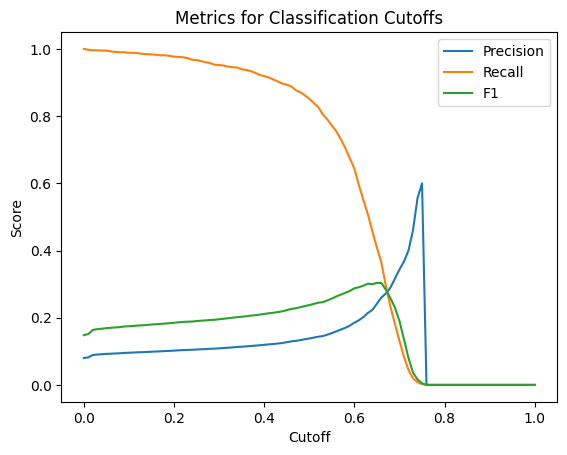

In [40]:
temp = LogisticRegression(**log_bal_params)
temp.fit(TrainXOVABalancedNN, TrainYOVABalancedNN)
y_temp = temp.predict(X_test)
y_proba = temp.predict_proba(X_test)
cutoffSearch(y_proba[:,1])

In [41]:
y_pred = [1 if prob > 0.65 else 0 for prob in y_proba[:,1]]
print(classification_report(TestYClassOVA, y_temp))
print(roc_auc_score(TestYClassOVA, y_proba[:,1]))

              precision    recall  f1-score   support

           0       0.98      0.54      0.69     13927
           1       0.14      0.85      0.24      1211

    accuracy                           0.56     15138
   macro avg       0.56      0.69      0.47     15138
weighted avg       0.91      0.56      0.66     15138

0.7753974555421904


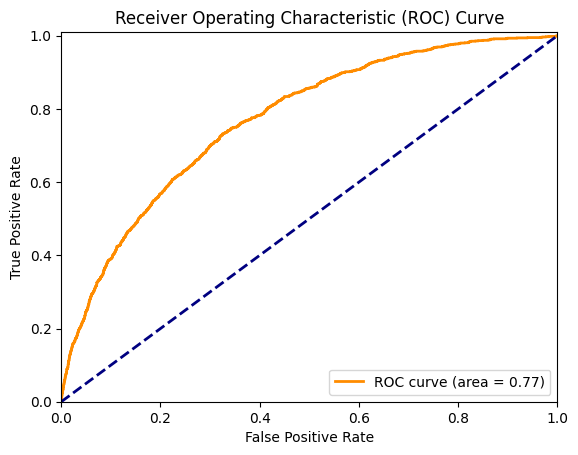

In [168]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(TestYClassOVA, y_prob[:,1])
roc_auc = sklearn.metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## XGBoost Regression

Note the process is more convluated than needed to test intergrating optuna both as a function and functions interacting with optuna

In [173]:
trainxgb = xgb.DMatrix(TrainXCat,label=TrainYRegNN, enable_categorical=True)
evalsxgb = xgb.DMatrix(EvalXCat,label=EvalReg, enable_categorical=True)
testxgb = xgb.DMatrix(catxtest, enable_categorical=True)

def xgb_reg(trial: Trial, trainx,evals):
    param = {
        "objective": "reg:squarederror",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        'gpu_id': 0,
        'random_state': 42,
        'eval_metric': 'rmse'
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-rmse")
    model = xgb.train(param,trainx, evals=[(evals, "validation")], verbose_eval=0)
    y_pred = model.predict(evals)
    return mean_squared_error(EvalReg, y_pred, squared=False)

def tune_reg(train,evals, model):
    optuna.logging.set_verbosity(optuna.logging.WARNING)

    study = optuna.create_study(
        pruner=optuna.pruners.HyperbandPruner(min_resource=2, reduction_factor=3), direction="minimize")
    study = optuna.create_study(direction="minimize")
    study.optimize(
            lambda trial: model(
                trial, train, evals),
                   n_trials=1500, show_progress_bar=True)
    return study
    
def study_results(study):
    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
    
def test_reg_model(model, params, trainx, evals, testx, output = False):
    temp = model.train(params, trainx,evals=[(evals, "validation")], verbose_eval=0)
    y_pred = temp.predict(testx)
    RegResults(y_pred)

In [183]:
xbg_all_study = tune_reg(trainxgb,evalsxgb, xgb_reg)

  0%|          | 0/1500 [00:00<?, ?it/s]

In [184]:
study_results(xbg_all_study)
xbg_all_study = xbg_all_study.best_trial.params

Number of finished trials: 1500
Best trial:
  Value: 0.9657125284023589
  Params: 
    booster: dart
    lambda: 0.005633350331641957
    alpha: 1.1664562960129352e-05
    max_depth: 5
    eta: 0.5722653684323799
    gamma: 0.004447268132504723
    grow_policy: lossguide
    sample_type: weighted
    normalize_type: forest
    rate_drop: 4.863844113530089e-06
    skip_drop: 0.022301269194589562


In [ ]:
test_reg_model(xgb, xbg_all_study, trainxgb, evalsxgb, testxgb)

In [62]:
# Run to skip hyperparameter tuning
def XGB_Reg():
    xbg_all_study = {'booster': 'dart',
        'lambda': 0.005633350331641957,
        'alpha': 1.1664562960129352e-05,
        'max_depth': 5,
        'eta': 0.5722653684323799,
        'gamma': 0.004447268132504723,
        'grow_policy': 'lossguide',
        'sample_type': 'weighted',
        'normalize_type': 'forest',
        'rate_drop': 4.863844113530089e-06,
        'skip_drop': 0.022301269194589562,
        'gpu_id': 0,
        'random_state': 42,
        'eval_metric': 'rmse',
        "objective": "reg:squarederror"}

    trainxgb = xgb.DMatrix(TrainXCat,label=TrainYRegNN, enable_categorical=True)
    evalsxgb = xgb.DMatrix(EvalXCat,label=EvalReg, enable_categorical=True)
    model = xgb.train(xbg_all_study, trainxgb,evals=[(evalsxgb, "validation")], verbose_eval=0)
    return model

In [178]:
testxgb = xgb.DMatrix(catxtest, enable_categorical=True)
xgbreg = XGB_Reg()
ypred = xgbreg.predict(testxgb)
RegResults(ypred)

              precision    recall  f1-score   support

           1       0.21      0.28      0.24      1211
           2       0.14      0.22      0.17      1212
           3       0.10      0.16      0.12      1214
           4       0.09      0.13      0.11      1209
           5       0.10      0.14      0.11      1208
           6       0.09      0.11      0.10      1209
           7       0.09      0.09      0.09      1202
           8       0.09      0.08      0.09      1201
           9       0.09      0.07      0.08      1188
          10       0.10      0.05      0.07      1165
          11       0.15      0.05      0.08      1135
          12       0.14      0.03      0.04      1026
          13       0.13      0.02      0.03       526
          14       0.27      0.01      0.02       432

    accuracy                           0.11     15138
   macro avg       0.13      0.10      0.10     15138
weighted avg       0.12      0.11      0.10     15138



win: 0.2851239669421487

## CatBoost Regression

In [201]:
trainreg = cb.Pool(TrainXCat,TrainYCatReg, cat_features=cat_features)
evals = cb.Pool(EvalXCat,EvalRegCat, cat_features=cat_features)

def objective(trial: optuna.Trial):
    param = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        "random_strength": trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        "od_type": trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        "od_wait": trial.suggest_int("od_wait", 10, 50),
        "verbose": False,
        "objective": trial.suggest_categorical("objective", ["RMSE"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "eval_metric": "RMSE",
        "loss_function": "RMSE",
    }
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)

    cat = cb.CatBoostRegressor(**param, random_state = 42)

    pruning_callback = optuna.integration.CatBoostPruningCallback(trial, "RMSE")
    cat.fit(trainreg,
        eval_set=[(evals)],
        verbose=False,
        callbacks=[pruning_callback],
    )

    # evoke pruning manually.
    pruning_callback.check_pruned()
    results = cat.predict(EvalXCat)
    return mean_squared_error(EvalRegCat, results)


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=1, reduction_factor=4), direction="minimize")
study.optimize(objective, n_trials=1500,show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


catboost_reg_params = study.best_params

  0%|          | 0/1500 [00:00<?, ?it/s]

Number of finished trials: 1500
Best trial:
  Value: 1.07688814278083
  Params: 
    learning_rate: 0.09125894359536063
    depth: 8
    l2_leaf_reg: 0.0003240380420799334
    random_strength: 5.973130780459945e-06
    od_type: IncToDec
    od_wait: 14
    objective: RMSE
    colsample_bylevel: 0.08743110279313847
    boosting_type: Ordered
    bootstrap_type: Bernoulli
    subsample: 0.3459822807023087


In [63]:
# Run this to skip hyperparameter tuning
def Cat_Reg():
    catboost_reg_params = {"eval_metric": "RMSE",
            "loss_function": "RMSE",
            "learning_rate": 0.09125894359536063,
            "depth": 8,
            "l2_leaf_reg": 0.0003240380420799334,
            "random_strength": 5.973130780459945e-06,
            "od_type": "IncToDec",
            "od_wait": 14,
            "objective": "RMSE",
            "colsample_bylevel": 0.08743110279313847,
            "boosting_type": "Ordered",
            "bootstrap_type": "Bernoulli",
            "subsample": 0.3459822807023087}

    trainreg = cb.Pool(TrainXCat,TrainYCatReg, cat_features=cat_features)
    evals = cb.Pool(EvalXCat,EvalRegCat, cat_features=cat_features)
    model = cb.CatBoostRegressor(**catboost_reg_params, verbose=False)
    model.fit(trainreg,early_stopping_rounds=200)
    return model

In [180]:
model = Cat_Reg()
cat_all_pred = model.predict(catxtest)
RegResults(cat_all_pred)

              precision    recall  f1-score   support

           1       0.17      0.17      0.17      1211
           2       0.12      0.12      0.12      1212
           3       0.10      0.10      0.10      1214
           4       0.10      0.10      0.10      1209
           5       0.09      0.09      0.09      1208
           6       0.08      0.08      0.08      1209
           7       0.10      0.10      0.10      1202
           8       0.08      0.08      0.08      1201
           9       0.10      0.10      0.10      1188
          10       0.11      0.11      0.11      1165
          11       0.11      0.11      0.11      1135
          12       0.14      0.14      0.14      1026
          13       0.13      0.13      0.13       526
          14       0.22      0.22      0.22       432

    accuracy                           0.11     15138
   macro avg       0.12      0.12      0.12     15138
weighted avg       0.11      0.11      0.11     15138



win: 0.1694214876033057

## LightGBM Regression

In [185]:
lgtrain = lgb.Dataset(TrainXCat,label=TrainYRegNN,
                      categorical_feature=cat_features, free_raw_data=False)
lgvalid = lgb.Dataset(EvalXCat,label=EvalReg,
                      categorical_feature=cat_features, free_raw_data=False)

def objective(trial):

    param = {
        "objective": "rmse",
        "metric": "rmse",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "feature_pre_filter": False,
        "random_state": 42
    }
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "rmse")
    gbm = lgb.train(param, lgtrain, valid_sets=[lgvalid], callbacks = [pruning_callback])
    y_pred = gbm.predict(EvalXCat)
    return mean_squared_error(EvalReg, y_pred, squared=False)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=1500, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

lgb_reg_params = trial.params

  0%|          | 0/1500 [00:00<?, ?it/s]

Number of finished trials: 1500
Best trial:
  Value: 0.958701090896177
  Params: 
    lambda_l1: 0.0005246826952281005
    lambda_l2: 9.838757730011761e-08
    num_leaves: 118
    feature_fraction: 0.9673984233153814
    bagging_fraction: 0.6291579155929223
    bagging_freq: 4
    min_child_samples: 75


In [64]:
# Run to skip hyperparameter tuning
def Light_Reg():
    
    lgb_reg_params = {"lambda_l1": 0.0005246826952281005,
            "lambda_l2": 9.838757730011761e-08,
            "num_leaves": 118,
            "feature_fraction": 0.9673984233153814,
            "bagging_fraction": 0.6291579155929223,
            "bagging_freq": 4,
            "min_child_samples": 75,
            "objective": "rmse",
            "verbosity": -1,
            "boosting_type": "gbdt",
            "feature_pre_filter": False,
            "random_state": 42}

    lgtrain = lgb.Dataset(TrainXCat,label=TrainYRegNN,
                          categorical_feature=cat_features, free_raw_data=False)
    lgvalid = lgb.Dataset(EvalXCat,label=EvalReg,
                          categorical_feature=cat_features, free_raw_data=False)
    model = lgb.train(lgb_reg_params, lgtrain, valid_sets=[lgvalid], callbacks = [early_stopping(100, verbose=0)])
    return model

In [182]:
model = Light_Reg()
lgb_all_pred = model.predict(catxtest)
RegResults(lgb_all_pred)

              precision    recall  f1-score   support

           1       0.24      0.24      0.24      1211
           2       0.15      0.15      0.15      1212
           3       0.12      0.12      0.12      1214
           4       0.11      0.11      0.11      1209
           5       0.09      0.09      0.09      1208
           6       0.10      0.10      0.10      1209
           7       0.09      0.09      0.09      1202
           8       0.10      0.10      0.10      1201
           9       0.11      0.11      0.11      1188
          10       0.12      0.12      0.12      1165
          11       0.15      0.15      0.15      1135
          12       0.17      0.17      0.17      1026
          13       0.17      0.17      0.17       526
          14       0.27      0.27      0.27       432

    accuracy                           0.14     15138
   macro avg       0.14      0.14      0.14     15138
weighted avg       0.14      0.14      0.14     15138



win: 0.2404958677685950

## AdaBoost Regression

In [121]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 25, 500),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 10, log=True),
        'loss': trial.suggest_categorical('loss',['linear', 'square', 'exponential']), 
}

    model = sklearn.ensemble.AdaBoostRegressor(**params)
    model.fit(TrainXNN, TrainYRegNN)
    y_pred = model.predict(EvalX)
    return mean_squared_error(EvalReg,y_pred,squared=False)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
ada_reg = study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 1.7894945594090534
  Params: 
    n_estimators: 34
    learning_rate: 0.0003758935348208809
    loss: square


In [53]:
# Run this to skip hyperparameter tuning
ada_reg = {"n_estimators": 34,
    "learning_rate": 0.0003758935348208809,
    "loss": "square"}

In [73]:
ada_best_reg = sklearn.ensemble.AdaBoostRegressor(**ada_reg)
ada_best_reg.fit(TrainXNN, TrainYRegNN)
ada_df = ada_best_reg.predict(X_test)
RegResults(ada_df)

              precision    recall  f1-score   support

           1       0.08      0.89      0.15      1211
           2       0.09      0.03      0.04      1212
           3       0.09      0.03      0.04      1214
           4       0.07      0.02      0.03      1209
           5       0.06      0.02      0.03      1208
           6       0.08      0.02      0.03      1209
           7       0.11      0.02      0.03      1202
           8       0.03      0.00      0.00      1201
           9       0.12      0.01      0.01      1188
          10       0.00      0.00      0.00      1165
          11       0.00      0.00      0.00      1135
          12       0.00      0.00      0.00      1026
          13       0.00      0.00      0.00       526
          14       0.00      0.00      0.00       432

    accuracy                           0.08     15138
   macro avg       0.05      0.07      0.03     15138
weighted avg       0.06      0.08      0.03     15138



win: 0.8859504132231405

# Classification

## KNN

In [185]:
def KNNResults(train_x,train_y,title,weights='uniform', test="all"):
    minmax = MinMaxScaler()
    train_x[continuous] = minmax.fit_transform(train_x[continuous])
    new_test = X_test
    new_test[continuous] = minmax.transform(X_test[continuous])
    scaled_eval = EvalX.copy()
    scaled_eval[continuous] = minmax.transform(scaled_eval[continuous])
    accuracy = []
    neighbors = np.arange(1,50)
    if test == "all":
        ground_truth = EvalY['result']
    if test == "ova":
        ground_truth = EvalYOVA
    for i in neighbors:
        neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i, weights=weights,n_jobs=-1)
        neigh.fit(train_x,train_y)
        predict = neigh.predict(scaled_eval)
        accuracy.append(accuracy_score(ground_truth,predict))
    plt.plot(neighbors,accuracy)
    plt.title(f"K-Neighvbors vs Accuracy: {title}")
    plt.xlabel("K-Neighbors")
    plt.ylabel("Accuracy")
    plt.show()
    best_k = accuracy.index(sorted(accuracy)[-1])+1
    print("The highest accuracy occured at K =",best_k)
    return best_k, new_test, neigh

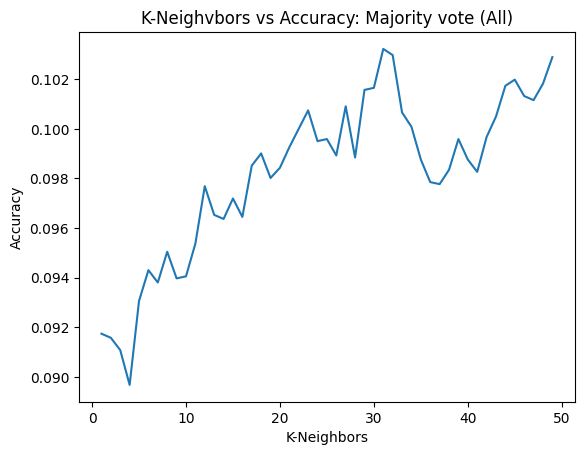

The highest accuracy occured at K = 31


In [186]:
best_k_all_maj, X_test_all_maj, knn_all_maj_model = KNNResults(TrainXNN,TrainYClassNN, "Majority vote (All)")

In [187]:
predict_mv = knn_all_maj_model.predict(X_test_all_maj)
print(classification_report(TestYClass['result'],predict_mv))
BettingResults(predict_mv)

              precision    recall  f1-score   support

           1       0.14      0.26      0.18      1211
           2       0.11      0.17      0.14      1212
           3       0.11      0.14      0.12      1214
           4       0.09      0.11      0.10      1209
           5       0.09      0.09      0.09      1208
           6       0.10      0.09      0.09      1209
           7       0.09      0.07      0.08      1202
           8       0.10      0.08      0.09      1201
           9       0.09      0.08      0.08      1188
          10       0.10      0.08      0.09      1165
          11       0.11      0.08      0.09      1135
          12       0.14      0.11      0.12      1026
          13       0.15      0.05      0.08       526
          14       0.14      0.05      0.07       432

    accuracy                           0.11     15138
   macro avg       0.11      0.10      0.10     15138
weighted avg       0.11      0.11      0.10     15138

win: 0.2578512396694215
p

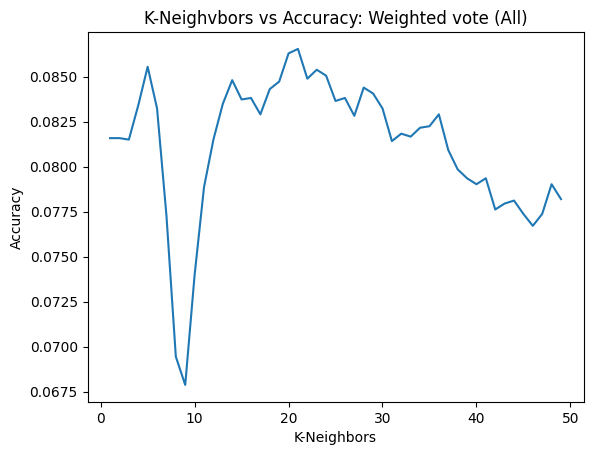

The highest accuracy occured at K = 21


In [188]:
best_k_all_dist, X_test_all_dist, knn_all_dist_model = KNNResults(TrainXNN,TrainYClassNN, "Weighted vote (All)",weights='distance')

In [189]:
predict_mv = knn_all_dist_model.predict(X_test_all_dist)
print(classification_report(TestYClass['result'],predict_mv))
BettingResults(predict_mv)

              precision    recall  f1-score   support

           1       0.15      0.21      0.17      1211
           2       0.12      0.15      0.13      1212
           3       0.10      0.11      0.11      1214
           4       0.08      0.09      0.08      1209
           5       0.09      0.09      0.09      1208
           6       0.10      0.09      0.10      1209
           7       0.09      0.08      0.09      1202
           8       0.09      0.09      0.09      1201
           9       0.09      0.08      0.08      1188
          10       0.09      0.08      0.09      1165
          11       0.11      0.10      0.10      1135
          12       0.14      0.13      0.14      1026
          13       0.13      0.06      0.08       526
          14       0.13      0.07      0.09       432

    accuracy                           0.11     15138
   macro avg       0.11      0.10      0.10     15138
weighted avg       0.11      0.11      0.10     15138

win: 0.20826446280991737


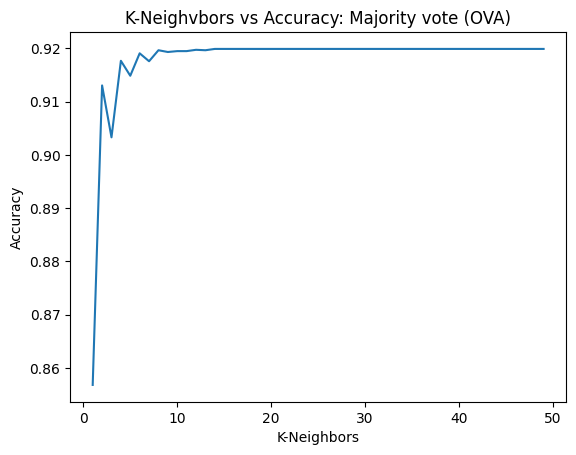

The highest accuracy occured at K = 14


In [209]:
best_k_ova_maj, X_test_ova_maj, knn_ova_maj_model = KNNResults(TrainXNN,TrainYOVANN, "Majority vote (OVA)", test="ova")

In [210]:
predict_mv = knn_ova_maj_model.predict(X_test_ova_maj)
pred_prob = knn_ova_maj_model.predict_proba(X_test_ova_maj)
print(classification_report(TestYClassOVA,predict_mv))
print(roc_auc_score(TestYClassOVA,pred_prob[:,1]))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13927
           1       0.00      0.00      0.00      1211

    accuracy                           0.92     15138
   macro avg       0.46      0.50      0.48     15138
weighted avg       0.85      0.92      0.88     15138

0.6268616225088267


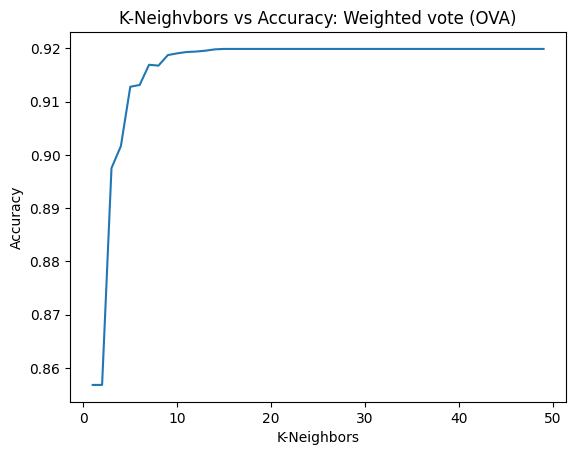

The highest accuracy occured at K = 15


In [211]:
best_k_ova_dist, X_test_ova_dist, knn_ova_dist_model= KNNResults(TrainXNN,TrainYOVANN, "Weighted vote (OVA)", weights='distance',test="ova")

In [212]:
predict_mv = knn_ova_dist_model.predict(X_test_ova_dist)
pred_prob = knn_ova_dist_model.predict_proba(X_test_ova_dist)
print(classification_report(TestYClassOVA,predict_mv))
print(roc_auc_score(TestYClassOVA,pred_prob[:,1]))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13927
           1       0.00      0.00      0.00      1211

    accuracy                           0.92     15138
   macro avg       0.46      0.50      0.48     15138
weighted avg       0.85      0.92      0.88     15138

0.6250615379935853


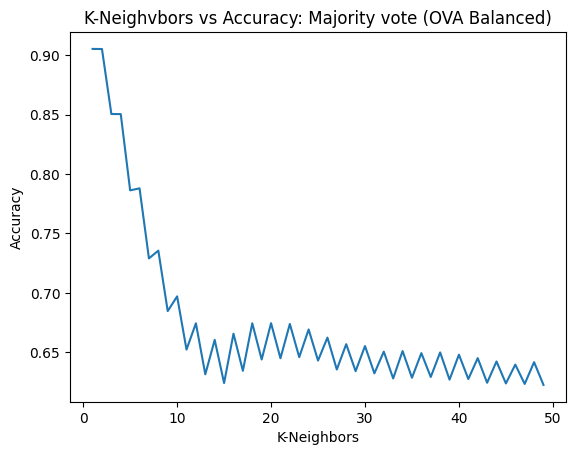

The highest accuracy occured at K = 1


In [213]:
best_k_ovab_maj, X_test_ovab_maj, knn_ovab_maj_model = KNNResults(TrainXOVABalancedNN,TrainYOVABalancedNN, "Majority vote (OVA Balanced)",test="ova")

In [214]:
predict_mv = knn_ovab_maj_model.predict(X_test_ovab_maj)
pred_prob = knn_ovab_maj_model.predict_proba(X_test_ovab_maj)
print(classification_report(TestYClassOVA,predict_mv))
print(roc_auc_score(TestYClassOVA,pred_prob[:,1]))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74     13927
           1       0.10      0.49      0.16      1211

    accuracy                           0.60     15138
   macro avg       0.52      0.55      0.45     15138
weighted avg       0.87      0.60      0.69     15138

0.5633952358757297


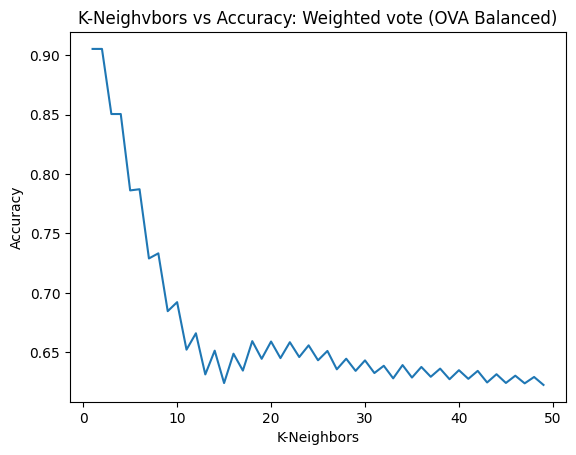

The highest accuracy occured at K = 1


In [215]:
best_k_ovab_dist, X_test_ovab_dist, knn_ovab_dist_model = KNNResults(TrainXOVABalancedNN,TrainYOVABalancedNN, "Weighted vote (OVA Balanced)", weights='distance', test="ova")

In [216]:
predict_mv = knn_ovab_dist_model.predict(X_test_ovab_dist)
pred_prob = knn_ovab_dist_model.predict_proba(X_test_ovab_dist)
print(classification_report(TestYClassOVA,predict_mv))
print(roc_auc_score(TestYClassOVA,pred_prob[:,1]))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74     13927
           1       0.10      0.49      0.16      1211

    accuracy                           0.60     15138
   macro avg       0.51      0.55      0.45     15138
weighted avg       0.87      0.60      0.69     15138

0.5638660760126072


## Naive Bayes

In [300]:
def objective(trial):
    params = {
        "alpha": trial.suggest_float("alpha", 1e-10, 10, log=True)
    }
    
    NBMB = sklearn.naive_bayes.MultinomialNB(**params)
    NBMB.fit(TrainXNN, TrainYClassNN)

    y_pred = NBMB.predict(EvalX)
    return accuracy_score(EvalY['result'],y_pred)


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
nb_mb_all = trial.params

  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.12138728323699421
  Params: 
    alpha: 3.18992031519118e-06


In [190]:
# Run to skip hyperparameter tuning
nb_mb_all = {'alpha': 3.18992031519118e-06}

In [191]:
temp = sklearn.naive_bayes.MultinomialNB(**nb_mb_all)
temp.fit(TrainXNN, TrainYClassNN)
y_pred = temp.predict(X_test)
print(classification_report(TestYClass['result'],y_pred))
BettingResults(y_pred)

              precision    recall  f1-score   support

           1       0.16      0.39      0.23      1211
           2       0.11      0.04      0.06      1212
           3       0.13      0.03      0.05      1214
           4       0.10      0.31      0.15      1209
           5       0.07      0.01      0.01      1208
           6       0.08      0.02      0.03      1209
           7       0.10      0.04      0.06      1202
           8       0.10      0.03      0.05      1201
           9       0.10      0.03      0.04      1188
          10       0.10      0.01      0.02      1165
          11       0.07      0.03      0.04      1135
          12       0.12      0.25      0.16      1026
          13       0.07      0.07      0.07       526
          14       0.08      0.50      0.14       432

    accuracy                           0.11     15138
   macro avg       0.10      0.13      0.08     15138
weighted avg       0.10      0.11      0.08     15138

win: 0.39173553719008264


In [303]:
def objective(trial):
    params = {
        "alpha": trial.suggest_float("alpha", 1e-10, 100, log=True)
    }
    
    NBMB = sklearn.naive_bayes.MultinomialNB(**params)
    NBMB.fit(TrainXNN, TrainYOVANN)

    y_pred = NBMB.predict_proba(EvalX)[:, 1]
    
    return roc_auc_score(EvalYOVA, y_pred)


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500, n_jobs=-1, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

nb_mb_ova = trial.params

  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.7815728590201557
  Params: 
    alpha: 0.9492438074465995


In [41]:
# Run this to skip hyperparameter tuning
nb_mb_ova = {"alpha": 0.9492438074465995}

Largest F1: [0.2524804177545692, 0.99]
Largest precision: [0.14994572801984804, 0.99]
Largest recall: [1.0, 0.0]


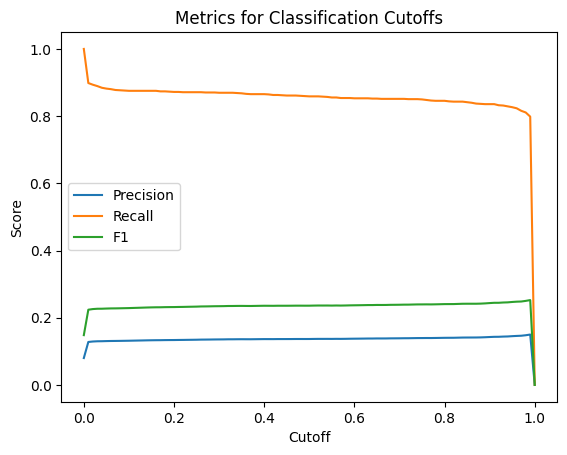

In [45]:
temp = sklearn.naive_bayes.MultinomialNB(**nb_mb_ova)
temp.fit(TrainXNN, TrainYOVANN)
y_proba = temp.predict_proba(X_test)
cutoffSearch(y_proba[:,1])

In [52]:
y_pred = [1 if value > 0.99 else 0 for value in y_proba[:,1]]
print(classification_report(TestYClassOVA,y_pred))
print(roc_auc_score(TestYClassOVA,y_proba[:,1]))

              precision    recall  f1-score   support

           0       0.98      0.56      0.71     13927
           1       0.14      0.83      0.24      1211

    accuracy                           0.59     15138
   macro avg       0.56      0.70      0.48     15138
weighted avg       0.91      0.59      0.68     15138

0.7797141719916586


In [306]:
def objective(trial):
    params = {
        "alpha": trial.suggest_float("alpha", 1e-10, 100, log=True)
    }
    
    NBMB = sklearn.naive_bayes.MultinomialNB(**params)
    NBMB.fit(TrainXOVABalancedNN, np.hstack(TrainYOVABalancedNN.values))

    y_pred = NBMB.predict_proba(EvalX)[:, 1]
    return roc_auc_score(EvalYOVA, y_pred)


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
nb_mb_ova_bal = trial.params

  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.7821167798774732
  Params: 
    alpha: 0.7774689605353391


In [48]:
# Run this to skip hyperparameter tuning
nb_mb_ova_bal = {"alpha": 0.7774689605353391}

Largest F1: [0.2435495538943815, 0.99]
Largest precision: [0.14259494564450093, 0.99]
Largest recall: [1.0, 0.0]


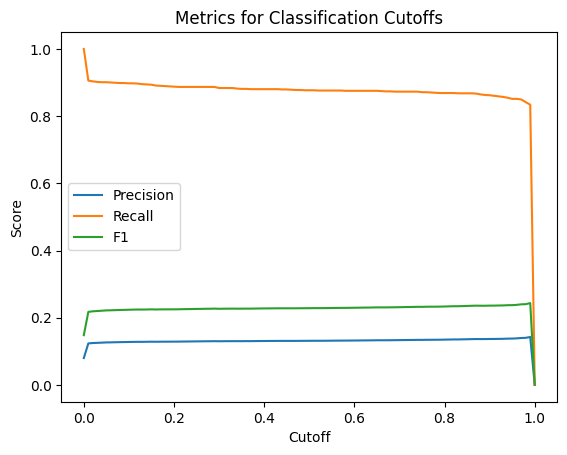

In [49]:
temp = sklearn.naive_bayes.MultinomialNB(**nb_mb_ova_bal)
temp.fit(TrainXOVABalancedNN, np.hstack(TrainYOVABalancedNN.values))
y_proba = temp.predict_proba(X_test)
cutoffSearch(y_proba[:,1])

In [51]:
y_pred = [1 if value > 0.99 else 0 for value in y_proba[:,1]]
print(classification_report(TestYClassOVA,y_pred))
print(roc_auc_score(TestYClassOVA,y_proba[:,1]))

              precision    recall  f1-score   support

           0       0.98      0.56      0.71     13927
           1       0.14      0.83      0.24      1211

    accuracy                           0.59     15138
   macro avg       0.56      0.70      0.48     15138
weighted avg       0.91      0.59      0.68     15138

0.7797141719916586


## SVM (Bagged for speed)

In [124]:
def objective(trial):
    params = {
            "C": trial.suggest_float("C", 1e-7, 10, log=True),
            "gamma": trial.suggest_float("gamma", 1e-4, 1),
            "kernel": trial.suggest_categorical("kernel", ['linear','rbf','sigmoid'])
        }
    n_estimators = trial.suggest_int('n_estimators', 5,10)
    model = BaggingClassifier(sklearn.svm.SVC(**params), max_samples=0.1, n_estimators=n_estimators,n_jobs=-1, random_state=42)
    model.fit(TrainXNN, TrainYClassNN)
    y_pred = model.predict(EvalX)
    return accuracy_score(EvalY['result'],y_pred)


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, show_progress_bar=True, timeout=3600)


print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

svm_params_all = study.best_params

  0%|          | 0/30 [00:00<?, ?it/s]

Number of finished trials: 15
Best trial:
  Value: 0.1274153592072667
  Params: 
    C: 0.05709281858781962
    gamma: 0.7414278440016849
    kernel: linear
    n_estimators: 7


In [192]:
# Run this to skip hyperparameter tuning
svm_params_all = {'C': 0.05709281858781962,
                  'gamma': 0.7414278440016849,
                  'kernel': 'linear'}

In [193]:
svm_model = BaggingClassifier(sklearn.svm.SVC(**svm_params_all),max_samples=0.1, n_jobs=-1, random_state=42, n_estimators=7)
svm_model.fit(TrainXNN, TrainYClassNN)
y_pred = svm_model.predict(X_test)
print(classification_report(TestYClass['result'], y_pred))
BettingResults(y_pred)

              precision    recall  f1-score   support

           1       0.16      0.46      0.23      1211
           2       0.10      0.22      0.14      1212
           3       0.09      0.09      0.09      1214
           4       0.09      0.14      0.11      1209
           5       0.10      0.03      0.05      1208
           6       0.10      0.04      0.06      1209
           7       0.10      0.08      0.09      1202
           8       0.10      0.08      0.09      1201
           9       0.11      0.04      0.06      1188
          10       0.11      0.05      0.07      1165
          11       0.14      0.07      0.09      1135
          12       0.17      0.24      0.20      1026
          13       0.43      0.01      0.01       526
          14       0.00      0.00      0.00       432

    accuracy                           0.12     15138
   macro avg       0.13      0.11      0.09     15138
weighted avg       0.12      0.12      0.10     15138

win: 0.46115702479338844


In [152]:
def objective(trial):
    params = {
            "C": trial.suggest_float("C", 1e-7, 10, log=True),
            "gamma": trial.suggest_float("gamma", 1e-4, 1),
            "kernel": trial.suggest_categorical("kernel", ['linear','rbf','sigmoid'])
        }
    estimators = trial.suggest_int('estimators', 5,10)
    model = BaggingClassifier(sklearn.svm.SVC(**params), max_samples=0.08, n_estimators=estimators,n_jobs=-1, random_state=42)
    model.fit(TrainXNN, TrainYOVANN)
    y_pred = model.predict_proba(EvalX)
    return roc_auc_score(EvalYOVA,y_pred[:,1])


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, show_progress_bar=True, timeout = 3600)


print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

svm_params_ova = study.best_params

  0%|          | 0/30 [00:00<?, ?it/s]

Number of finished trials: 30
Best trial:
  Value: 0.5262358158537032
  Params: 
    C: 9.787365235322468
    gamma: 0.10885947749994632
    kernel: linear
    estimators: 9


In [72]:
# Run this to work
svm_params_ova = {'C':9.787365235322468, 'gamma': 0.10885947749994632, 'kernel': 'linear'}

Largest F1: [0.07407407407407407, 0.0]
Largest precision: [1.0, 0.34]
Largest recall: [0.042939719240297276, 0.0]


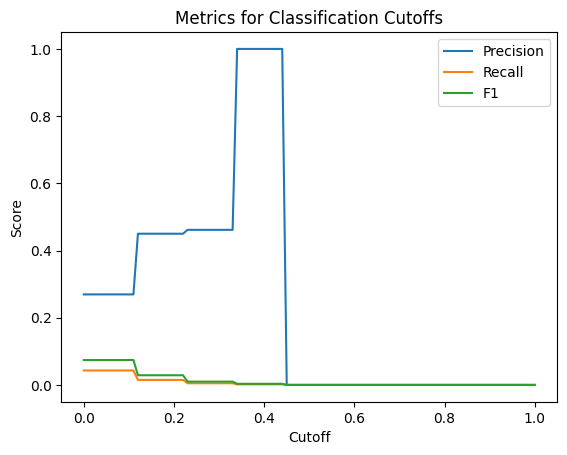

In [73]:
svm_model = BaggingClassifier(sklearn.svm.SVC(**svm_params_ova), max_samples=0.1, n_estimators=9,n_jobs=-1, random_state=42)
svm_model.fit(TrainXNN, TrainYOVANN)
y_prob = svm_model.predict_proba(X_test)
cutoffSearch(y_prob[:,1])

In [77]:
y_pred = [1 if prob > 0 else 0 for prob in y_prob[:,1]]
print(classification_report(TestYClassOVA, y_pred))
print(roc_auc_score(TestYClassOVA, y_prob[:,1]))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     13927
           1       0.27      0.04      0.07      1211

    accuracy                           0.91     15138
   macro avg       0.60      0.52      0.51     15138
weighted avg       0.87      0.91      0.88     15138

0.5164496697033613


In [160]:
def objective(trial):
    params = {
            "C": trial.suggest_float("C", 1e-7, 10, log=True),
            "gamma": trial.suggest_float("gamma", 1e-4, 1),
            "kernel": trial.suggest_categorical("kernel", ['linear','rbf','sigmoid'])
        }
    estimators = trial.suggest_int('estimators', 5,10)
    model = BaggingClassifier(sklearn.svm.SVC(**params), max_samples=0.1, n_estimators=estimators,n_jobs=-1, random_state=42)
    model.fit(TrainXOVABalancedNN, TrainYOVABalancedNN)
    y_pred = model.predict_proba(EvalX)
    return roc_auc_score(EvalYOVA,y_pred[:,1])


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, show_progress_bar=True, timeout=3600)


print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

svm_params_ova_bal = study.best_params

  0%|          | 0/30 [00:00<?, ?it/s]

Number of finished trials: 30
Best trial:
  Value: 0.9982699388224776
  Params: 
    C: 9.554515154785872
    gamma: 0.11165281607342496
    kernel: rbf
    estimators: 9


In [79]:
# Run this to work
svm_params_ova_bal = {"C": 9.554515154785872,"gamma": 0.11165281607342496,"kernel": "rbf"}

Largest F1: [0.012861736334405143, 0.0]
Largest precision: [0.25, 0.67]
Largest recall: [0.006606110652353427, 0.0]


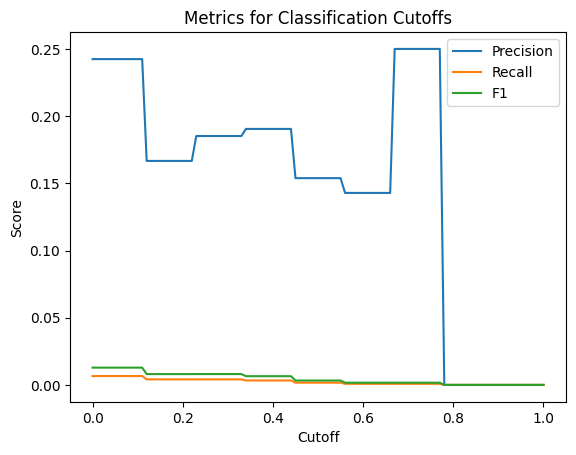

In [81]:
svm_model = BaggingClassifier(sklearn.svm.SVC(**svm_params_ova_bal), max_samples=0.1, n_estimators=9,n_jobs=-1, random_state=42)
svm_model.fit(TrainXOVABalancedNN, TrainYOVABalancedNN)
y_prob = svm_model.predict_proba(X_test)
cutoffSearch(y_prob[:,1])

In [82]:
y_pred = [1 if prob > 0 else 0 for prob in y_prob[:,1]]
print(classification_report(TestYClassOVA, y_pred))
print(roc_auc_score(TestYClassOVA, y_prob[:,1]))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13927
           1       0.24      0.01      0.01      1211

    accuracy                           0.92     15138
   macro avg       0.58      0.50      0.49     15138
weighted avg       0.87      0.92      0.88     15138

0.5024035615223107


## AdaBoost Classifier

In [309]:
def objective(trial):
    params = {
    "learning_rate": trial.suggest_float("learning_rate",1e-3,100, log=True),
    "n_estimators": trial.suggest_int("n_estimators", 20, 500),
    "random_state": 42
    }
    
    model = sklearn.ensemble.AdaBoostClassifier(**params)
    model.fit(TrainXNN,TrainYClassNN)
    y_pred = model.predict(EvalX)
    return accuracy_score(EvalY['result'],y_pred)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True, timeout=3600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
ada_all_params = study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 89
Best trial:
  Value: 0.14227910817506192
  Params: 
    learning_rate: 0.0070630280470046275
    n_estimators: 240


In [194]:
# Run this to skip hyperparameter tuning
ada_all_params = {"learning_rate": 0.0070630280470046275,
                  "n_estimators": 240}

In [195]:
model = sklearn.ensemble.AdaBoostClassifier(**ada_all_params, random_state=42)
model.fit(TrainXNN, TrainYClassNN)
y_pred = model.predict(X_test)
print(classification_report(TestYClass['result'],y_pred))
BettingResults(y_pred)

              precision    recall  f1-score   support

           1       0.21      0.59      0.31      1211
           2       0.11      0.13      0.12      1212
           3       0.13      0.05      0.07      1214
           4       0.09      0.12      0.10      1209
           5       0.10      0.04      0.06      1208
           6       0.10      0.02      0.04      1209
           7       0.10      0.07      0.08      1202
           8       0.09      0.06      0.08      1201
           9       0.11      0.13      0.12      1188
          10       0.13      0.09      0.11      1165
          11       0.13      0.17      0.15      1135
          12       0.17      0.32      0.22      1026
          13       0.00      0.00      0.00       526
          14       0.00      0.00      0.00       432

    accuracy                           0.14     15138
   macro avg       0.10      0.13      0.10     15138
weighted avg       0.11      0.14      0.11     15138

win: 0.5917355371900826
p

In [312]:
def objective(trial):
    params = {
    "learning_rate": trial.suggest_float("learning_rate",1e-3,100, log=True),
    "n_estimators": trial.suggest_int("n_estimators", 20, 500),
    "random_state": 42,
    }
    
    model = sklearn.ensemble.AdaBoostClassifier(**params)
    model.fit(TrainXNN,TrainYOVANN)
    y_pred = model.predict_proba(EvalX)
    return roc_auc_score(EvalYOVA,y_pred[:,1])

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    

ada_ova_params = study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 0.7881332247496715
  Params: 
    learning_rate: 0.12184627422874357
    n_estimators: 87


In [42]:
# Run this to skip hyperparameter tuning
ada_ova_params = {"learning_rate": 0.12184627422874357,
        "n_estimators": 87,
        "random_state": 42}

Largest F1: [0.33006018371872026, 0.46]
Largest precision: [0.5231788079470199, 0.49]
Largest recall: [1.0, 0.0]


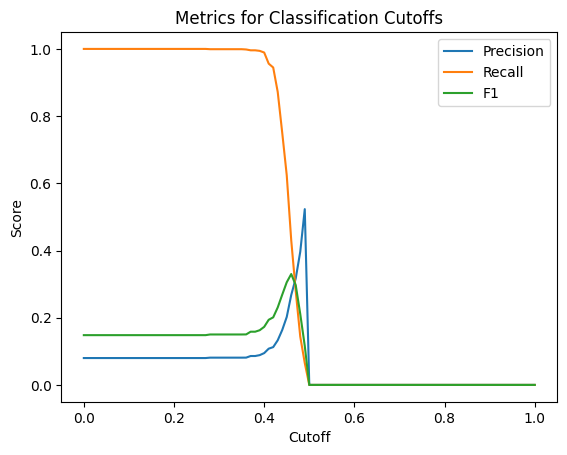

In [43]:
model = sklearn.ensemble.AdaBoostClassifier(**ada_ova_params)
model.fit(TrainXNN, TrainYOVANN)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
cutoffSearch(y_prob[:,1])

In [44]:
y_pred = [1 if prob > 0.46 else 0 for prob in y_prob[:,1]]
print(classification_report(TestYClassOVA,y_pred))
print(roc_auc_score(TestYClassOVA,y_prob[:,1]))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     13927
           1       0.27      0.43      0.33      1211

    accuracy                           0.86     15138
   macro avg       0.61      0.66      0.63     15138
weighted avg       0.89      0.86      0.87     15138

0.7846649009815663


In [ ]:
def objective(trial):
    params = {
    "learning_rate": trial.suggest_float("learning_rate",1e-3,100, log=True),
    "n_estimators": trial.suggest_int("n_estimators", 20, 500),
    "random_state": 42
    }
    
    model = sklearn.ensemble.AdaBoostClassifier(**params)
    model.fit(TrainXOVABalancedNN,TrainYOVABalancedNN)
    y_pred = model.predict_proba(EvalX)
    return roc_auc_score(EvalYOVA,y_pred[:,1])

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True, timeout = 3600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
ada_ova_bal_params = study.best_params

In [45]:
# Run this to skip hyperparameter tuning
ada_ova_bal_params = {"learning_rate": 1.7016569438354876,
        "n_estimators": 297,
        "random_state": 42}

Largest F1: [0.2718321226795803, 0.5]
Largest precision: [0.1689406099518459, 0.5]
Largest recall: [1.0, 0.0]


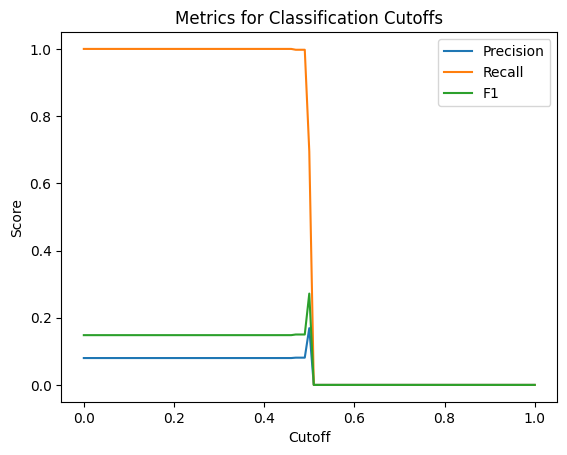

In [46]:
model = sklearn.ensemble.AdaBoostClassifier(**ada_ova_bal_params)
model.fit(TrainXOVABalancedNN,TrainYOVABalancedNN)
y_prob = model.predict_proba(X_test)
cutoffSearch(y_prob[:,1])

In [47]:
y_pred = [1 if prob > 0.5 else 0 for prob in y_prob[:,1]]
print(classification_report(TestYClassOVA,y_pred))
print(roc_auc_score(TestYClassOVA,y_prob[:,1]))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     13927
           1       0.17      0.70      0.27      1211

    accuracy                           0.70     15138
   macro avg       0.57      0.70      0.54     15138
weighted avg       0.90      0.70      0.77     15138

0.7697135179976137


## Random Forests

In [34]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'random_state': 42,
        'n_jobs': -1

    }
    
    rf_model = RandomForestClassifier(**params)
    rf_model.fit(TrainXNN, TrainYClassNN)

    y_pred = rf_model.predict(EvalX)
    return accuracy_score(EvalY['result'], y_pred)


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True, timeout=3600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

rf_all_best = study.best_params


  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 262
Best trial:
  Value: 0.14475639966969447
  Params: 
    n_estimators: 792
    max_depth: 5
    max_features: None
    min_samples_split: 9
    min_samples_leaf: 9
    bootstrap: True
    criterion: gini
    class_weight: None


In [35]:
# Run to skip hyperparameter tuning
def RF_All():
    rf_all_best = {
            "n_estimators": 792,
            "max_depth": 5,
            "max_features": None,
            "min_samples_split": 9,
            "min_samples_leaf": 9,
            "bootstrap": True,
            "criterion": "gini",
            "class_weight": None,
            "random_state": 42,
            "n_jobs": -1
    }

    rf_class_all = RandomForestClassifier(**rf_all_best)
    rf_class_all.fit(TrainXNN, TrainYClassNN)
    return rf_class_all

In [36]:
rf_class_all = RF_All()
rf_all_pred = rf_class_all.predict(X_test)
print(classification_report(TestYClass['result'],rf_all_pred))
BettingResults(rf_all_pred)

              precision    recall  f1-score   support

           1       0.25      0.44      0.32      1211
           2       0.12      0.23      0.16      1212
           3       0.14      0.04      0.06      1214
           4       0.10      0.19      0.13      1209
           5       0.11      0.01      0.02      1208
           6       0.13      0.05      0.07      1209
           7       0.08      0.02      0.03      1202
           8       0.12      0.09      0.10      1201
           9       0.09      0.18      0.12      1188
          10       0.12      0.13      0.13      1165
          11       0.12      0.11      0.12      1135
          12       0.20      0.19      0.20      1026
          13       0.16      0.12      0.14       526
          14       0.23      0.23      0.23       432

    accuracy                           0.14     15138
   macro avg       0.14      0.14      0.13     15138
weighted avg       0.14      0.14      0.12     15138

win: 0.4446280991735537
p

In [141]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced', {0:1,1:15}]),
        'random_state': 42,
        'n_jobs': -1

    }
    
    rf_model = RandomForestClassifier(**params)
    rf_model.fit(TrainXNN, TrainYOVANN)

    y_pred = rf_model.predict_proba(EvalX)[:, 1]
    return roc_auc_score(EvalYOVA, y_pred)


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True, timeout=5400)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

rf_ova_best = study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 0.7832458494512207
  Params: 
    n_estimators: 968
    max_depth: 13
    max_features: sqrt
    min_samples_split: 2
    min_samples_leaf: 4
    bootstrap: False
    criterion: entropy
    class_weight: None


In [48]:
# Run this to skip hyperparameter tuning
def RF_OVA():
    rf_ova_best = {"n_estimators": 968,
        "max_depth": 13,
        "max_features": 'sqrt',
        "min_samples_split": 2,
        "min_samples_leaf": 4,
        "bootstrap": False,
        "criterion": "entropy",
        "class_weight": None,
        'random_state': 42,
        'n_jobs': -1}
    rf_model = RandomForestClassifier(**rf_ova_best)
    rf_model.fit(TrainXNN, TrainYOVANN)
    return rf_model

Largest F1: [0.32272024729520865, 0.16]
Largest precision: [1.0, 0.5700000000000001]
Largest recall: [1.0, 0.0]


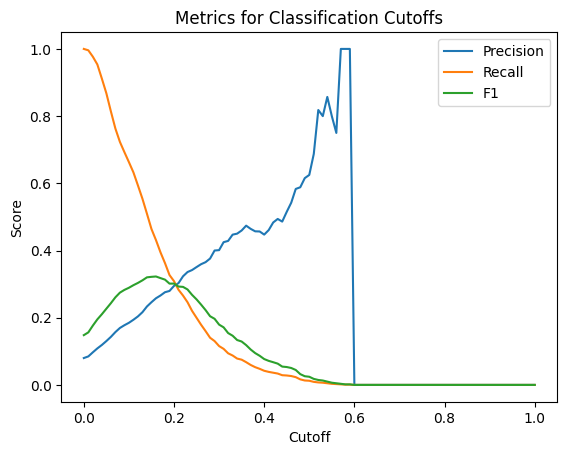

In [49]:
rf_model = RF_OVA()
y_proba = rf_model.predict_proba(X_test)
cutoffSearch(y_proba[:,1])

In [50]:
y_pred = [1 if prob > 0.16 else 0 for prob in y_proba[:,1]]
print(classification_report(TestYClassOVA,y_pred))
print(roc_auc_score(TestYClassOVA,y_proba[:,1]))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     13927
           1       0.26      0.43      0.32      1211

    accuracy                           0.86     15138
   macro avg       0.60      0.66      0.62     15138
weighted avg       0.89      0.86      0.87     15138

0.7791055958469777


In [142]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'random_state': 42,
        'n_jobs': -1

    }
    
    rf_model = RandomForestClassifier(**params)
    rf_model.fit(TrainXOVABalancedNN, TrainYOVABalancedNN)

    y_pred = rf_model.predict_proba(EvalX)[:, 1]
    return roc_auc_score(EvalYOVA, y_pred)


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

rf_ova_bal_best = study.best_params


  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 0.9996471339465843
  Params: 
    n_estimators: 601
    max_depth: 20
    max_features: None
    min_samples_split: 3
    min_samples_leaf: 1
    bootstrap: True
    criterion: entropy
    class_weight: balanced


In [51]:
# Run this to skip hyperparameter tuning
def RF_Bal():
    rf_ova_bal_best = {"n_estimators": 601,
    "max_depth": 20,
    "max_features": None,
    "min_samples_split": 3,
    "min_samples_leaf": 1,
    "bootstrap": True,
    "criterion": "entropy",
    "class_weight": 'balanced',
    "random_state": 42,
    "n_jobs": -1}
    
    rf_model = RandomForestClassifier(**rf_ova_bal_best)
    rf_model.fit(TrainXOVABalancedNN, np.hstack(TrainYOVABalancedNN.values))
    return rf_model

Largest F1: [0.29321071138761157, 0.44]
Largest precision: [1.0, 0.9500000000000001]
Largest recall: [0.9966969446738233, 0.0]


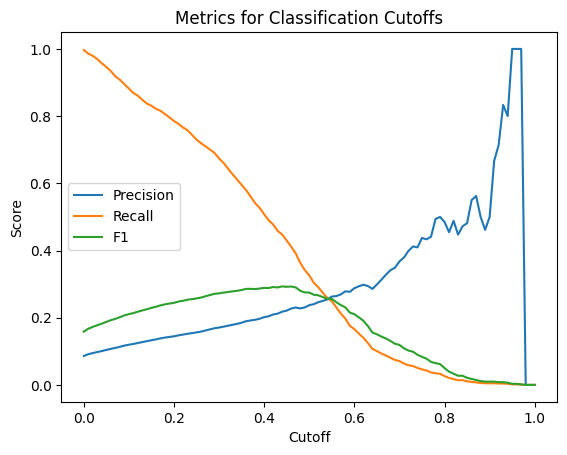

In [52]:
rf_model = RF_Bal()
y_proba = rf_model.predict_proba(X_test)
y_pred = rf_model.predict(X_test)
cutoffSearch(y_proba[:,1])

In [53]:
y_pred = [1 if prob > 0.44 else 0 for prob in y_proba[:,1]]
print(classification_report(TestYClassOVA,y_pred))
print(roc_auc_score(TestYClassOVA,y_proba[:,1]))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     13927
           1       0.22      0.45      0.29      1211

    accuracy                           0.83     15138
   macro avg       0.58      0.65      0.60     15138
weighted avg       0.89      0.83      0.85     15138

0.758401674129887


## XGBoost Classifier

In [156]:
le = LabelEncoder()
encoded_y = le.fit_transform(TrainYClassNN)
encoded_y_val = le.fit_transform(EvalY['result'])

dtrain = xgb.DMatrix(TrainXCat, label=encoded_y, enable_categorical=True)
deval = xgb.DMatrix(EvalXCat,label=encoded_y_val, enable_categorical=True)


def objective(trial):
    param = {
        "verbosity": 0,
        "objective": "multi:softmax",
        "eval_metric": "mlogloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "num_class": 14,
        "verbosity": 0,
        "tree_method":'gpu_hist',
        "gpu_id": 0,
        "predictor":'gpu_predictor',
        "random_state": 42,
        "early_stopping_rounds": 100
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)
    
    model = xgb.train(param, dtrain,evals=[(deval, 'validation')], verbose_eval = False)
    results = model.predict(deval)
    results = results.astype(int)
    results =  le.inverse_transform(results)
    return accuracy_score(EvalY['result'],results)
    # CV version: remove eval_set and eval_metric
    
    #     score = cross_val_score(model, TrainX, encoded_y, cv=5, scoring="accuracy")
    
    #     mean_score = score.mean()
    
    #     return mean_score


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=2, reduction_factor=3),direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
xgb_all_Best = study.best_params


  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.14269199009083403
  Params: 
    booster: dart
    lambda: 0.0010305970521699243
    alpha: 2.9590999268750783e-05
    max_depth: 3
    eta: 7.971270329329855e-07
    gamma: 3.626911977854771e-08
    grow_policy: lossguide
    sample_type: uniform
    normalize_type: tree
    rate_drop: 1.0230412678097064e-08
    skip_drop: 0.6544303903637052


In [37]:
# Run this to skip hyperparameter tuning step
def XGB_Class_All():
    xgb_all_Best = {"verbosity": 0,
            "objective": "multi:softmax",
            "eval_metric": "mlogloss",
            "num_class": 14,
            "verbosity": 0,
            "tree_method":'gpu_hist',
            "gpu_id": 0,
            "predictor":'gpu_predictor',
            "random_state": 42,
            "early_stopping_rounds": 300,
            'booster': 'dart',
            'lambda': 0.0010305970521699243,
            'alpha': 2.9590999268750783e-05,
            'max_depth': 3,
            'eta': 7.971270329329855e-07,
            'gamma': 3.626911977854771e-08,
            'grow_policy': 'lossguide',
            'sample_type': 'uniform',
            'normalize_type': 'tree',
            'rate_drop': 1.0230412678097064e-08,
            'skip_drop': 0.6544303903637052}

    le = LabelEncoder()
    encoded_y = le.fit_transform(TrainYClassNN)
    encoded_y_val = le.transform(EvalY['result'])

    dtrain = xgb.DMatrix(TrainXCat, label=encoded_y, enable_categorical=True)
    deval = xgb.DMatrix(EvalXCat,label=encoded_y_val, enable_categorical=True)
    xgb_all_class = xgb.train(xgb_all_Best, dtrain,evals=[(deval, 'validation')], verbose_eval = False)
    return xgb_all_class

In [199]:
xtest = xgb.DMatrix(catxtest, enable_categorical=True)
xgb_all_class = XGB_Class_All()
y_pred = xgb_all_class.predict(xtest)
y_pred = y_pred.astype(int)
xgboost_all_class =  y_pred + 1
print(classification_report(TestYClass['result'],xgboost_all_class))
print('\n')
BettingResults(xgboost_all_class)

              precision    recall  f1-score   support

           1       0.22      0.55      0.31      1211
           2       0.10      0.25      0.14      1212
           3       0.10      0.03      0.05      1214
           4       0.10      0.11      0.11      1209
           5       0.08      0.09      0.08      1208
           6       0.08      0.00      0.00      1209
           7       0.00      0.00      0.00      1202
           8       0.11      0.06      0.08      1201
           9       0.11      0.06      0.08      1188
          10       0.10      0.02      0.04      1165
          11       0.11      0.21      0.15      1135
          12       0.15      0.25      0.19      1026
          13       0.16      0.11      0.13       526
          14       0.26      0.13      0.18       432

    accuracy                           0.13     15138
   macro avg       0.12      0.13      0.11     15138
weighted avg       0.11      0.13      0.10     15138



win: 0.5462809917355372

In [174]:
dtrain = xgb.DMatrix(TrainXCat, label=TrainYOVANN, enable_categorical=True)
deval = xgb.DMatrix(EvalXCat,label=EvalYOVA, enable_categorical=True)


def objective(trial):
    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "scale_pos_weight": trial.suggest_int("scale_pos_weight", 1,20),
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "verbosity": 0,
        "tree_method":'gpu_hist',
        "gpu_id": 0,
        "predictor":'gpu_predictor',
        "random_state": 42,
        "early_stopping_rounds": 100
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)
    
    model = xgb.train(param, dtrain,evals=[(deval, 'validation')], verbose_eval = False)
    results = model.predict(deval)
    return roc_auc_score(EvalYOVA,results)


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
xgb_ova_Best = study.best_params


  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.7881920357585741
  Params: 
    scale_pos_weight: 15
    booster: gbtree
    lambda: 6.504617121879726e-06
    alpha: 1.2687784288137063e-05
    max_depth: 3
    eta: 0.37645414580756553
    gamma: 1.2162933916029757e-07
    grow_policy: depthwise


In [89]:
# Run this to skip hyperparameter tuning
def XGB_Class_OVA():
    xgb_ova_Best = {
            'scale_pos_weight': 15,
            'booster': 'gbtree',
            'lambda': 6.504617121879726e-06,
            'alpha': 1.2687784288137063e-05,
            'max_depth': 3,
            'eta': 0.37645414580756553,
            'gamma': 1.2162933916029757e-07,
            'grow_policy': 'depthwise',
            "verbosity": 0,
            "objective": "binary:logistic",
            "eval_metric": "auc",
            "verbosity": 0,
            "tree_method":'gpu_hist',
            "gpu_id": 0,
            "predictor":'gpu_predictor',
            "random_state": 42,
            "early_stopping_rounds": 100}

    dtrain = xgb.DMatrix(TrainXCat, label=TrainYOVANN, enable_categorical=True)
    deval = xgb.DMatrix(EvalXCat,label=EvalYOVA, enable_categorical=True)
    model = xgb.train(xgb_ova_Best, dtrain,evals=[(deval, 'validation')], verbose_eval = False)
    return model

Largest F1: [0.32660850599781893, 0.71]
Largest precision: [0.75, 0.91]
Largest recall: [1.0, 0.0]


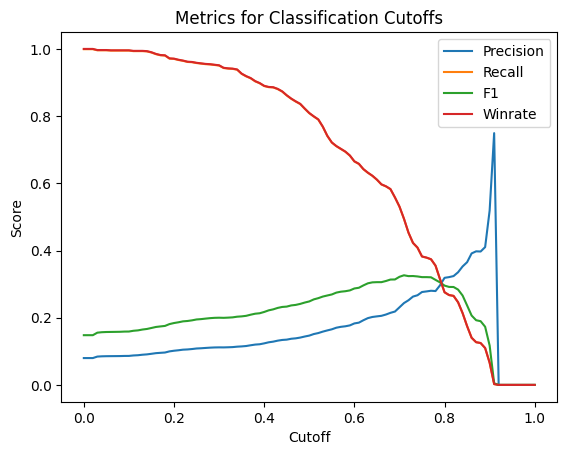

In [99]:
xtest = xgb.DMatrix(catxtest, enable_categorical=True)
model = XGB_Class_OVA()
y_proba = model.predict(xtest)
cutoffSearch(y_proba)

In [98]:
y_pred = [1 if prob > 0.71 else 0 for prob in y_proba]
print(classification_report(TestYClassOVA,y_pred))
print('\n')
print(roc_auc_score(TestYClassOVA,y_proba))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     13927
           1       0.24      0.49      0.33      1211

    accuracy                           0.84     15138
   macro avg       0.60      0.68      0.62     15138
weighted avg       0.90      0.84      0.86     15138



0.7829213813184319


In [178]:
dtrain = xgb.DMatrix(TrainXCatOVABalancedNN, label=TrainYCatOVABalancedNN, enable_categorical=True)
deval = xgb.DMatrix(EvalXCat,label=EvalYOVA, enable_categorical=True)


def objective(trial):
    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "verbosity": 0,
        "tree_method":'gpu_hist',
        "gpu_id": 0,
        "predictor":'gpu_predictor',
        "random_state": 42,
        "early_stopping_rounds": 100
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)
    
    model = xgb.train(param, dtrain,evals=[(deval, 'validation')], verbose_eval = False)
    results = model.predict(deval)
    return roc_auc_score(EvalYOVA,results)
    # CV version: remove eval_set and eval_metric
    
    #     score = cross_val_score(model, TrainX, encoded_y, cv=5, scoring="accuracy")
    
    #     mean_score = score.mean()
    
    #     return mean_score


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
xgb_bal_ova_Best = study.best_params


  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.7878273704862203
  Params: 
    booster: gbtree
    lambda: 2.3339283480140298e-08
    alpha: 0.00383404922965509
    max_depth: 2
    eta: 0.49710860062384415
    gamma: 4.1732470770159154e-06
    grow_policy: lossguide


In [54]:
def XGB_Class_Balance():    
    xgb_bal_ova_Best = {'booster': 'gbtree',
            'lambda': 2.3339283480140298e-08,
            'alpha': 0.00383404922965509,
            'max_depth': 2,
            'eta': 0.49710860062384415,
            'gamma': 4.1732470770159154e-06,
            'grow_policy': 'lossguide',
            "verbosity": 0,
            "objective": "binary:logistic",
            "eval_metric": "auc",
            "verbosity": 0,
            "tree_method":'gpu_hist',
            "gpu_id": 0,
            "predictor":'gpu_predictor',
            "random_state": 42,
            "early_stopping_rounds": 100}
    dtrain = xgb.DMatrix(TrainXCatOVABalancedNN, label=TrainYCatOVABalancedNN, enable_categorical=True)
    deval = xgb.DMatrix(EvalXCat,label=EvalYOVA, enable_categorical=True)
    model = xgb.train(xgb_bal_ova_Best, dtrain,evals=[(deval, 'validation')], verbose_eval = False)
    return model

Largest F1: [0.3240620957309185, 0.68]
Largest precision: [0.625, 0.9]
Largest recall: [1.0, 0.0]


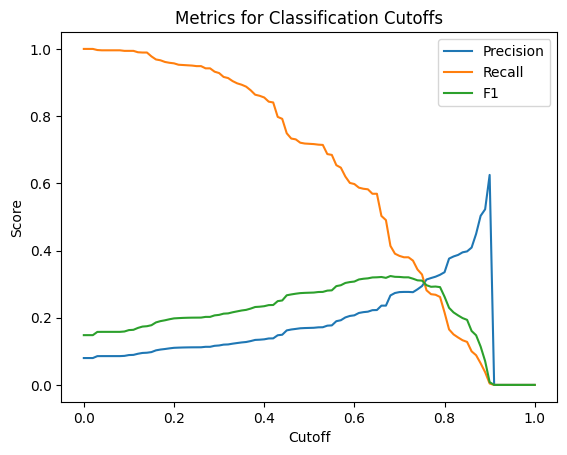

In [55]:
xtest = xgb.DMatrix(catxtest, enable_categorical=True)
model = XGB_Class_Balance()
y_prob = model.predict(xtest)
cutoffSearch(y_prob)

In [56]:
y_pred = [1 if prob > 0.68 else 0 for prob in y_prob]
print(classification_report(TestYClassOVA,y_pred))
print('\n')
print(roc_auc_score(TestYClassOVA,y_prob))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     13927
           1       0.27      0.41      0.32      1211

    accuracy                           0.86     15138
   macro avg       0.61      0.66      0.62     15138
weighted avg       0.89      0.86      0.88     15138



0.7827478031166049


## CatBoost Classifier

**All**

In [65]:
cat_features = [TrainXCat.columns.get_loc(col) for col in categorical_cols]
train = cb.Pool(TrainXCat,TrainYCatClass, cat_features=cat_features)
evals = cb.Pool(EvalXCat, EvalYCat['result'], cat_features=cat_features)


def objective(trial: optuna.Trial):
    param = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        "random_strength": trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        "od_type": trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        "od_wait": trial.suggest_int("od_wait", 10, 50),
        "verbose": False,
        "objective": trial.suggest_categorical("objective", ["MultiClass"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "eval_metric": "Accuracy",
        "loss_function": "MultiClass",
        "random_state": 42
    }
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)

    gbm = cb.CatBoostClassifier(**param)

    pruning_callback = optuna.integration.CatBoostPruningCallback(trial, "Accuracy")
    gbm.fit(train,
        eval_set=evals,
        verbose=0,
        callbacks=[pruning_callback],
    )

    # evoke pruning manually.
    pruning_callback.check_pruned()

    preds = gbm.predict(evals)
    accuracy = accuracy_score(EvalYCat['result'], preds)

    return accuracy


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=1, reduction_factor=4), direction="maximize")
study.optimize(objective, n_trials=500,show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


catboost_all_params = study.best_params

  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.1471511147811726
  Params: 
    learning_rate: 0.05049113914181088
    depth: 7
    l2_leaf_reg: 1.5491444918179988e-06
    random_strength: 4.4444764295588715e-05
    od_type: IncToDec
    od_wait: 35
    objective: MultiClass
    colsample_bylevel: 0.09485557961889983
    boosting_type: Ordered
    bootstrap_type: Bayesian
    bagging_temperature: 0.5989711035644039


In [39]:
# Run this to skip hyperparameter tuning
def Cat_Class_All():
    catboost_all_params = {"verbose": False,
        "eval_metric": "Accuracy",
        "loss_function": "MultiClass",
        "random_state": 42,
        "learning_rate": 0.05049113914181088,
        "depth": 7,
        "l2_leaf_reg": 1.5491444918179988e-06,
        "random_strength": 4.4444764295588715e-05,
        "od_type": "IncToDec",
        "od_wait": 24,
        "objective": "MultiClass",
        "colsample_bylevel": 0.09485557961889983,
        "boosting_type": "Ordered",
        "bootstrap_type": "Bayesian",
        "bagging_temperature": 0.5989711035644039}

    cat_features = [TrainXCat.columns.get_loc(col) for col in categorical_cols]
    train = cb.Pool(TrainXCat,TrainYCatClass, cat_features=cat_features)
    evals = cb.Pool(EvalXCat, EvalYCat['result'], cat_features=cat_features)
    cat_class_all = cb.CatBoostClassifier(**catboost_all_params)
    cat_class_all.fit(train,eval_set=evals,verbose=0)
    return cat_class_all

In [201]:
cat_class_all = Cat_Class_All()
cat_all_pred = cat_class_all.predict(catxtest)
print(classification_report(TestYClass['result'],cat_all_pred))
BettingResults(cat_all_pred)

              precision    recall  f1-score   support

           1       0.24      0.50      0.32      1211
           2       0.12      0.18      0.15      1212
           3       0.11      0.05      0.07      1214
           4       0.11      0.14      0.13      1209
           5       0.12      0.06      0.08      1208
           6       0.13      0.08      0.10      1209
           7       0.10      0.04      0.06      1202
           8       0.10      0.10      0.10      1201
           9       0.10      0.12      0.11      1188
          10       0.12      0.09      0.10      1165
          11       0.12      0.12      0.12      1135
          12       0.17      0.23      0.20      1026
          13       0.17      0.11      0.14       526
          14       0.24      0.20      0.22       432

    accuracy                           0.14     15138
   macro avg       0.14      0.15      0.14     15138
weighted avg       0.13      0.14      0.13     15138

win: 0.49586776859504134


**OVA**

In [103]:
train = cb.Pool(TrainXCat,TrainYOVANN, cat_features=cat_features)
evals = cb.Pool(EvalXCat, EvalYOVA, cat_features=cat_features)

def objective(trial: optuna.Trial):
    param = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "scale_pos_weight": trial.suggest_int("scale_pos_weight", 1,20),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        "random_strength": trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        "od_type": trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        "od_wait": trial.suggest_int("od_wait", 10, 50),
        "verbose": False,
        "objective": "Logloss",
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "eval_metric": "AUC",
        "random_state": 42
    }
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)

    gbm = cb.CatBoostClassifier(**param)

    pruning_callback = optuna.integration.CatBoostPruningCallback(trial, "AUC")
    gbm.fit(train,
        eval_set=evals,
        verbose=0,
        callbacks=[pruning_callback],
    )

    # evoke pruning manually.
    pruning_callback.check_pruned()

    preds = gbm.predict_proba(EvalXCat)
    return roc_auc_score(EvalYOVA, preds[:,1])


optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=1, reduction_factor=4), direction="maximize")
study.optimize(objective, n_trials=500,show_progress_bar=True, timeout=3600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


catboost_ova_params = study.best_params

  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 11
Best trial:
  Value: 0.7824061152344111
  Params: 
    learning_rate: 0.005652301946453826
    depth: 8
    scale_pos_weight: 18
    l2_leaf_reg: 0.49730827844792175
    random_strength: 0.014863578405226782
    od_type: IncToDec
    od_wait: 45
    colsample_bylevel: 0.07700602122717151
    boosting_type: Plain
    bootstrap_type: Bayesian
    bagging_temperature: 0.05447029569757178


In [58]:
# Run this to skip hyperparameter tuning
def Cat_Class_OVA():
    catboost_ova_params = {
            'learning_rate': 0.005652301946453826,
            'depth': 8,
            'scale_pos_weight': 18,
            'l2_leaf_reg': 0.49730827844792175,
            'random_strength': 0.014863578405226782,
            'od_type': 'IncToDec',
            'od_wait': 45,
            'colsample_bylevel': 0.07700602122717151,
            'boosting_type': 'Plain',
            'bootstrap_type': 'Bayesian',
            "verbose": False,
            "objective": "Logloss",
            "eval_metric": "AUC",
            "random_state": 42}

    train = cb.Pool(TrainXCat,TrainYOVANN, cat_features=cat_features)
    evals = cb.Pool(EvalXCat, EvalYOVA, cat_features=cat_features)
    model = cb.CatBoostClassifier(**(catboost_ova_params))
    model.fit(train,
            eval_set=evals,verbose=0,early_stopping_rounds=200)
    return model

Largest F1: [0.3205784874962338, 0.76]
Largest precision: [0.5, 0.9]
Largest recall: [1.0, 0.0]


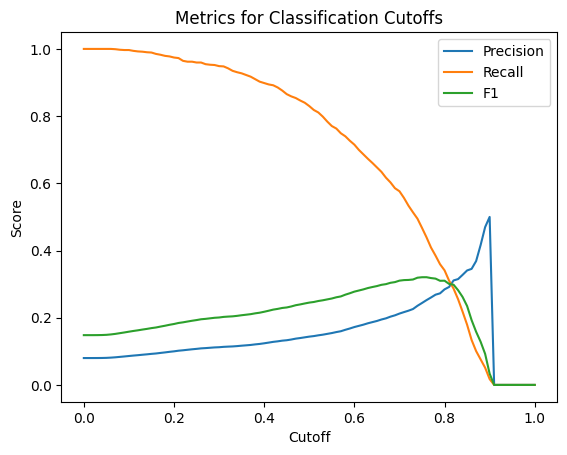

In [59]:
model = Cat_Class_OVA()
cat_ova_pred = model.predict(catxtest)
cat_ova_prob = model.predict_proba(catxtest)
cutoffSearch(cat_ova_prob[:,1])

In [60]:
y_pred = [1 if prob > 0.76 else 0 for prob in cat_ova_prob[:,1]]
print(classification_report(TestYClassOVA,y_pred))
print(roc_auc_score(TestYClassOVA, cat_ova_prob[:,1]))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     13927
           1       0.25      0.44      0.32      1211

    accuracy                           0.85     15138
   macro avg       0.60      0.66      0.62     15138
weighted avg       0.89      0.85      0.87     15138

0.7810955639459427


**OVA Balanced**

In [104]:
train = cb.Pool(TrainXCatOVABalancedNN,TrainYCatOVABalancedNN, cat_features=cat_features)
evals = cb.Pool(EvalXCat, EvalYOVA, cat_features=cat_features)

def objective(trial: optuna.Trial):
    param = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        "random_strength": trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        "od_type": trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        "od_wait": trial.suggest_int("od_wait", 10, 50),
        "verbose": False,
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "eval_metric": "AUC",
        "random_state": 42
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)

    gbm = cb.CatBoostClassifier(**param)

    pruning_callback = optuna.integration.CatBoostPruningCallback(trial, "AUC")
    gbm.fit(train,
        eval_set=evals,
        callbacks=[pruning_callback],
        
    )

    # evoke pruning manually.
    pruning_callback.check_pruned()

    preds = gbm.predict_proba(EvalXCat)
    return roc_auc_score(EvalYOVA, preds[:,1])



optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=1, reduction_factor=4), direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True, timeout = 3600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

catboost_bal_ova_params = study.best_params

  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 13
Best trial:
  Value: 0.7838471931740362
  Params: 
    learning_rate: 0.04722121113468437
    depth: 5
    l2_leaf_reg: 0.21800898127234203
    random_strength: 5.268208547712614e-05
    od_type: IncToDec
    od_wait: 25
    objective: Logloss
    colsample_bylevel: 0.06881857557138349
    boosting_type: Ordered
    bootstrap_type: Bernoulli
    subsample: 0.2040827543682774


In [74]:
# Run this to skip hyperparameter tuning
def Cat_Class_Balance():
    catboost_bal_ova_params = {"learning_rate": 0.04722121113468437,
        "depth": 5,
        "l2_leaf_reg": 0.21800898127234203,
        "random_strength": 5.268208547712614e-05,
        "od_type": "IncToDec",
        "od_wait": 25,
        "objective": "Logloss",
        "colsample_bylevel": 0.06881857557138349,
        "boosting_type": "Ordered",
        "bootstrap_type": "Bernoulli",
        "subsample": 0.2040827543682774,
        "eval_metric": "AUC",
        "random_state": 42,
        "verbose": False}

    train = cb.Pool(TrainXCatOVABalancedNN,TrainYCatOVABalancedNN, cat_features=cat_features)
    evals = cb.Pool(EvalXCat, EvalYOVA, cat_features=cat_features)
    model = cb.CatBoostClassifier(**catboost_bal_ova_params)
    model.fit(train,eval_set=[(evals)],verbose=0,early_stopping_rounds=100)
    return model

Largest F1: [0.326805027769658, 0.67]
Largest precision: [0.59375, 0.9]
Largest recall: [1.0, 0.0]


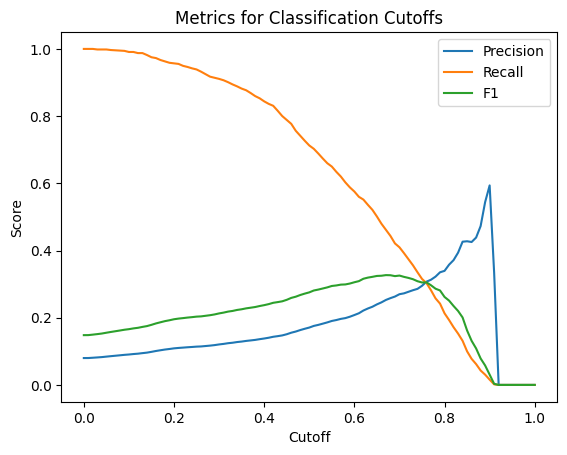

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     13927
           1       0.17      0.71      0.28      1211

    accuracy                           0.70     15138
   macro avg       0.57      0.71      0.54     15138
weighted avg       0.90      0.70      0.77     15138

0.7819621801706753


In [75]:
model = Cat_Class_Balance()
cat_bal_ova_pred = model.predict(catxtest)
cat_bal_ova_prob = model.predict_proba(catxtest)
cutoffSearch(cat_bal_ova_prob[:,1])
print(classification_report(TestYClassOVA, cat_bal_ova_pred))
print(roc_auc_score(TestYClassOVA,cat_bal_ova_prob[:,1]))

In [77]:
y_pred = [1 if prob > 0.67 else 0 for prob in cat_bal_ova_prob[:,1]]
print(classification_report(TestYClassOVA, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     13927
           1       0.25      0.46      0.33      1211

    accuracy                           0.85     15138
   macro avg       0.60      0.67      0.62     15138
weighted avg       0.89      0.85      0.87     15138



## LightGBM Classifier

In [160]:
le = LabelEncoder()
encoded_y = le.fit_transform(TrainYClassNN)
encoded_y_val = le.fit_transform(EvalY['result'])

lgtrain = lgb.Dataset(TrainXCat,label=encoded_y,
                     categorical_feature=cat_features, free_raw_data=False)
lgvalid = lgb.Dataset(EvalXCat,label=encoded_y_val,
                     categorical_feature=cat_features, free_raw_data=False)

def objective(trial):

    param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_class": 14,
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "feature_pre_filter": False,
        "random_state": 42
    }
    gbm = lgb.train(param, lgtrain, valid_sets=[lgvalid], callbacks = [early_stopping(200, verbose=0)], categorical_feature=cat_features)
    y_pred = gbm.predict(EvalXCat)
    y_pred = [np.argmax(x) + 1 for x in y_pred]
    y_pred = np.hstack(y_pred)
    
    return accuracy_score(EvalY['result'],y_pred)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=2, reduction_factor=3),direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

lgb_all_params = trial.params

  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.1476465730800991
  Params: 
    lambda_l1: 0.2392878864433801
    lambda_l2: 3.8862947758569e-05
    num_leaves: 7
    feature_fraction: 0.6980771433280335
    bagging_fraction: 0.7479328680003059
    bagging_freq: 1
    min_child_samples: 22


In [40]:
# Run this to skip hyperparameter tuning
def Light_Class_All():
    lgb_all_params = { 'lambda_l1': 0.2392878864433801,
            'lambda_l2': 3.8862947758569e-05,
            'num_leaves': 7,
            'feature_fraction': 0.6980771433280335,
            'bagging_fraction': 0.7479328680003059,
            'bagging_freq': 1,
            'min_child_samples': 22,
            "objective": "multiclass",
            "metric": "multi_logloss",
            "verbosity": -1,
            "boosting_type": "gbdt",
            "num_class": 14}


    le = LabelEncoder()
    encoded_y = le.fit_transform(TrainYClassNN)
    encoded_y_val = le.fit_transform(EvalY['result'])

    lgtrain = lgb.Dataset(TrainXCat,label=encoded_y,
                         categorical_feature=cat_features, free_raw_data=False)
    lgvalid = lgb.Dataset(EvalXCat,label=encoded_y_val,
                         categorical_feature=cat_features, free_raw_data=False)

    model = lgbm_all_class = lgb.train(lgb_all_params, lgtrain, valid_sets=[lgvalid], callbacks = [early_stopping(200, verbose=0)])
    return model

In [203]:
lgbm_all_class = Light_Class_All()
lgbm_all_probs = lgbm_all_class.predict(catxtest)
y_pred = [np.argmax(x) + 1 for x in lgbm_all_probs]
lgbm_all_results = np.hstack(y_pred)

print(classification_report(TestYClass['result'],lgbm_all_results))
      
BettingResults(lgbm_all_results)


              precision    recall  f1-score   support

           1       0.23      0.47      0.31      1211
           2       0.12      0.19      0.15      1212
           3       0.12      0.08      0.10      1214
           4       0.09      0.11      0.10      1209
           5       0.10      0.07      0.08      1208
           6       0.10      0.06      0.07      1209
           7       0.12      0.04      0.06      1202
           8       0.11      0.08      0.09      1201
           9       0.10      0.11      0.10      1188
          10       0.11      0.09      0.10      1165
          11       0.10      0.12      0.11      1135
          12       0.18      0.21      0.20      1026
          13       0.16      0.13      0.14       526
          14       0.20      0.22      0.21       432

    accuracy                           0.14     15138
   macro avg       0.13      0.14      0.13     15138
weighted avg       0.13      0.14      0.13     15138

win: 0.47107438016528924


In [321]:
lgtrain = lgb.Dataset(TrainXCat,label=TrainYOVANN, 
                      categorical_feature=cat_features, free_raw_data=False)
lgvalid = lgb.Dataset(EvalXCat,label=EvalYOVA, 
                      categorical_feature=cat_features, free_raw_data=False)

def objective(trial):

    param = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "unbalance": True,
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "feature_pre_filter": False,
        "random_state": 42
    }
    gbm = lgb.train(param, lgtrain, valid_sets=[lgvalid], callbacks = [early_stopping(200, verbose=0)])
    y_pred = gbm.predict(EvalXCat)
    y_pred = np.rint(y_pred)
    return accuracy_score(EvalYOVA,y_pred)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

lgb_ova_params = trial.params

  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.9201486374896779
  Params: 
    lambda_l1: 6.583149331738682
    lambda_l2: 5.369801032730379e-08
    num_leaves: 63
    feature_fraction: 0.45377840066427194
    bagging_fraction: 0.5402682828602083
    bagging_freq: 2
    min_child_samples: 71


In [48]:
# Run this to skip hyperparameter tuning
def Light_Class_OVA():
    lgb_ova_params = {"lambda_l1": 0.01936858541423188,
            "lambda_l2": 0.4168550677695767,
            "num_leaves": 23,
            "feature_fraction": 0.9208216279473694,
            "bagging_fraction": 0.8870424767254557,
            "bagging_freq": 4,
            "min_child_samples": 56,
            "objective": "binary",
            "metric": "auc",
            "verbosity": -1,
            "boosting_type": "gbdt",
            "unbalance": True}

    lgtrain = lgb.Dataset(TrainXCat,label=TrainYOVANN, 
                          categorical_feature=cat_features, free_raw_data=False)
    lgvalid = lgb.Dataset(EvalXCat,label=EvalYOVA, 
                          categorical_feature=cat_features, free_raw_data=False)
    model = lgb.train(lgb_ova_params, lgtrain, valid_sets=[lgvalid], callbacks = [early_stopping(200, verbose=0)])
    return model

Largest F1: [0.3302162478082992, 0.49]
Largest precision: [0.3932291666666667, 0.63]
Largest recall: [1.0, 0.0]


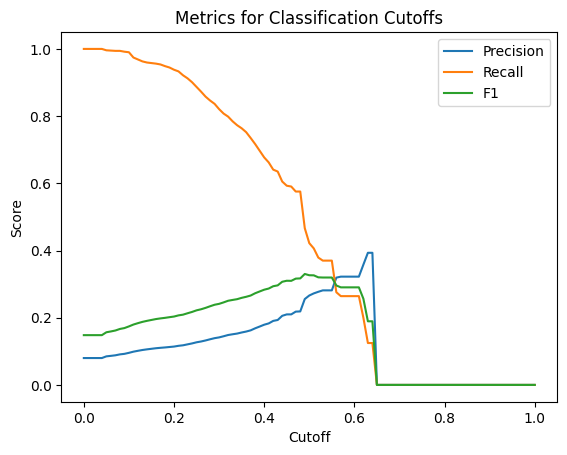

In [79]:
model = Light_Class_OVA()
y_proba = model.predict(catxtest)
cutoffSearch(y_proba)

In [80]:
y_pred = [1 if prob > 0.49 else 0 for prob in y_proba]
print(classification_report(TestYClassOVA, y_pred))
print(roc_auc_score(TestYClassOVA,y_proba))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     13927
           1       0.26      0.47      0.33      1211

    accuracy                           0.85     15138
   macro avg       0.60      0.67      0.62     15138
weighted avg       0.89      0.85      0.87     15138

0.7817347942085893


In [326]:
lgtrain = lgb.Dataset(TrainXCatOVABalancedNN,label=TrainYCatOVABalancedNN,
                      categorical_feature=cat_features, free_raw_data=False)
lgvalid = lgb.Dataset(EvalXCat,label=EvalYOVA, 
                      categorical_feature=cat_features, free_raw_data=False)

def objective(trial):

    param = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "random_state": 42
    }
    gbm = lgb.train(param, lgtrain, valid_sets=[lgvalid], callbacks = [early_stopping(100, verbose=0)])
    y_pred = gbm.predict(EvalXCat)
    return roc_auc_score(EvalYOVA,y_pred)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

lgb_ova_params = trial.params

  0%|          | 0/500 [00:00<?, ?it/s]

Number of finished trials: 500
Best trial:
  Value: 0.7889372374095394
  Params: 
    lambda_l1: 4.547271951185619e-06
    lambda_l2: 3.048147123443626
    num_leaves: 13
    feature_fraction: 0.9216644424814373
    bagging_fraction: 0.4302603564473942
    bagging_freq: 1
    min_child_samples: 97


In [51]:
# Run this to skip hyperparameter tuning
def Light_Class_Balance():
    lgb_ova_params = {"lambda_l1": 4.547271951185619e-06,
            "lambda_l2": 3.048147123443626,
            "num_leaves": 13,
            "feature_fraction": 0.9216644424814373,
            "bagging_fraction": 0.4302603564473942,
            "bagging_freq": 1,
            "min_child_samples": 97,
            "objective": "binary",
            "metric": "auc",
            "verbosity": -1,
            "boosting_type": "gbdt"}

    lgtrain = lgb.Dataset(TrainXCatOVABalancedNN,label=TrainYCatOVABalancedNN,
                          categorical_feature=cat_features, free_raw_data=False)
    lgvalid = lgb.Dataset(EvalXCat,label=EvalYOVA, 
                          categorical_feature=cat_features, free_raw_data=False)
    model = lgb.train(lgb_ova_params, lgtrain, valid_sets=[lgvalid], callbacks = [early_stopping(200, verbose=0)])
    return model

Largest F1: [0.32867523756288425, 0.62]
Largest precision: [0.4258064516129032, 0.8]
Largest recall: [1.0, 0.0]


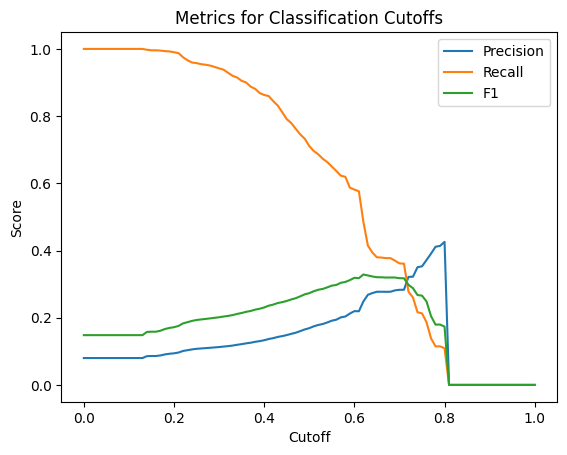

In [81]:
model = Light_Class_Balance()
y_prob = model.predict(catxtest)
cutoffSearch(y_prob)

In [82]:
y_pred = [1 if prob > 0.62 else 0 for prob in y_prob]
print(classification_report(TestYClassOVA, y_pred))
print(roc_auc_score(TestYClassOVA,y_prob))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     13927
           1       0.25      0.49      0.33      1211

    accuracy                           0.84     15138
   macro avg       0.60      0.68      0.62     15138
weighted avg       0.89      0.84      0.86     15138

0.7831270366533719


# Ranking

In [97]:
# Run before ranking models
le = LabelEncoder()
groups = train_val_cat_data.groupby('race_id').size().to_numpy()
eval_groups = eval_data.groupby('race_id').size().to_numpy()
grouped_eval = EvalX.copy()
grouped_eval['race_id'] = eval_data['race_id'].copy()
grouped_test = catxtest.copy()
grouped_test['race_id'] = test_data_cat['race_id'].copy()
group_test = test_data_cat.groupby('race_id').size().to_numpy()

## XGBoost Ranking

In [131]:
groups = train_data.groupby('race_id').size().to_numpy()
eval_groups = eval_data.groupby('race_id').size().to_numpy()
grouped_eval = EvalX.copy()
grouped_eval['race_id'] = eval_data['race_id'].copy()
grouped_test = X_test.copy()
grouped_test['race_id'] = test_data['race_id'].copy()

In [125]:
def predict(model, df):
    return model.predict(df.loc[:, ~df.columns.isin(['race_id'])])

def objective(trial):
    params = {
        'verbosity': 0,
        'n_estimators': trial.suggest_int('n_estimators', 50, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 1e-7, 1e-1),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-5, 1e2),
        'lambda': trial.suggest_float('lambda', 1e-5, 1e2),
        'objective': trial.suggest_categorical('objective',['rank:pairwise','rank:ndcg','rank:map']), 
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 5),
        'tree_method': 'gpu_hist',
        'gpu_id': 0,
        'predictor': 'gpu_predictor',
        'random_state': 42,
        'early_stopping_rounds': 100,
        'eval_metric': 'ndcg'
    }
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation_0-ndcg")
    model = xgb.XGBRanker(**params)
    model.fit(TrainX, TrainYClass, group=groups, verbose=0, 
              eval_set=[(EvalX,EvalY['result'])],eval_group=[eval_groups])
    predictions = (grouped_eval.groupby('race_id')
               .apply(lambda x: predict(model, x)))
    predictions = predictions.apply(lambda x: np.argsort(x) + 1)
    predicted = np.hstack(predictions)
    return accuracy_score(EvalY['result'],predicted)
    

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=2, reduction_factor=3), direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True)


print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


xgb_ranker_params = study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 0.15791532983801548
  Params: 
    n_estimators: 1406
    learning_rate: 0.09376524049684233
    max_depth: 18
    colsample_bytree: 0.84942525764359
    alpha: 0.041879517084221746
    lambda: 0.07552241701625206
    objective: rank:pairwise
    min_child_weight: 1


In [93]:
def XGB_Rank():
    xgb_ranker_params = {"n_estimators": 1406,
            "learning_rate": 0.09376524049684233,
            "max_depth": 18,
            "colsample_bytree": 0.84942525764359,
            "alpha": 0.041879517084221746,
            "lambda": 0.07552241701625206,
            "objective": "rank:pairwise",
            "min_child_weight": 1,
            "tree_method": "gpu_hist",
            "gpu_id": 0,
            "predictor": "gpu_predictor",
            "random_state": 42,
            "early_stopping_rounds": 300,
            "eval_metric": "ndcg"}

    groups = train_data.groupby('race_id').size().to_numpy()
    eval_groups = eval_data.groupby('race_id').size().to_numpy()
    model = xgb.XGBRanker(**(xgb_ranker_params))
    model.fit(TrainX, TrainYClass, group=groups, 
              eval_set=[(EvalX,EvalY['result'])],eval_group=[eval_groups], verbose=0)
    return model

In [207]:
def predict(model, df):
    return model.predict(df.loc[:, ~df.columns.isin(['race_id'])])

model = XGB_Rank()
grouped_test = X_test.copy()
grouped_test['race_id'] = test_data['race_id'].copy()
# Calculates their score then ranks each horse within their race_id
predictions = (grouped_test.groupby('race_id')
               .apply(lambda x: predict(model, x)))
predictions = predictions.apply(lambda x: np.argsort(x) + 1)
xgb_rank = np.hstack(predictions)
print(classification_report(TestYClass['result'],xgb_rank))
BettingResults(xgb_rank)

              precision    recall  f1-score   support

           1       0.09      0.09      0.09      1211
           2       0.09      0.09      0.09      1212
           3       0.08      0.08      0.08      1214
           4       0.09      0.09      0.09      1209
           5       0.08      0.08      0.08      1208
           6       0.08      0.08      0.08      1209
           7       0.08      0.08      0.08      1202
           8       0.07      0.07      0.07      1201
           9       0.08      0.08      0.08      1188
          10       0.06      0.06      0.06      1165
          11       0.07      0.07      0.07      1135
          12       0.08      0.08      0.08      1026
          13       0.06      0.06      0.06       526
          14       0.07      0.07      0.07       432

    accuracy                           0.08     15138
   macro avg       0.08      0.08      0.08     15138
weighted avg       0.08      0.08      0.08     15138

win: 0.09338842975206611


## CatBoost Ranking

In [394]:
def predict(model, df):
    return model.predict(df.loc[:, ~df.columns.isin(['race_id'])])

# Get the indices of the categorical features
groups_cat = train_val_cat_data['race_id'].to_numpy()
eval_groups_cat = eval_cat_data['race_id'].to_numpy()

grouped_evalcatx = EvalXCat.copy()
grouped_evalcatx['race_id'] = eval_cat_data['race_id'].copy()

# Prepare the Pool objects
train_pool = cb.Pool(TrainXCat, TrainYCatClass, cat_features=cat_features, group_id=groups_cat)
eval_pool = cb.Pool(EvalXCat, EvalYCat['result'], cat_features=cat_features, group_id=eval_groups_cat)

def objective(trial):
    # Define the hyperparameters to be tuned
    params = {
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'depth': trial.suggest_int('depth', 2, 8),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
        'random_strength': trial.suggest_loguniform('random_strength', 1e-3, 10),
        'eval_metric': 'NDCG:type=Base',
        'od_type': 'Iter',
        'od_wait': 20,
        'random_seed': 42,
    }
    
    # Create the CatBoostRanker model with the trial parameters
    model = cb.CatBoostRanker(**params)
    pruning_callback = optuna.integration.CatBoostPruningCallback(trial, "NDCG:type=Base")


    # Train the model
    model.fit(train_pool, eval_set=eval_pool, callbacks=[pruning_callback],verbose=False)
    pruning_callback.check_pruned()
    predictions = (grouped_evalcatx.groupby('race_id')
               .apply(lambda x: predict(model, x)))
    predictions = predictions.apply(lambda x: np.argsort(x) + 1)
    predicted = np.hstack(predictions)
    return accuracy_score(EvalY['result'],predicted)



# Create an Optuna study to optimize the hyperparameters
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize")
study.optimize(objective, n_trials=100,show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
cat_rank_params = trial.params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 0.0916597853014038
  Params: 
    iterations: 977
    learning_rate: 0.007077264094773226
    depth: 8
    l2_leaf_reg: 3.3359932175452007
    random_strength: 9.696584631219286


In [94]:
# Run to skip hyperparameter tuning
def Cat_Rank():
    cat_rank_params = {"iterations": 977,
            "learning_rate": 0.007077264094773226,
            "depth": 8,
            "l2_leaf_reg": 3.3359932175452007,
            "random_strength": 9.696584631219286,
            "eval_metric": "NDCG:type=Base",
            "od_type": "Iter",
            "od_wait": 20,
            "random_seed": 42,}

    def predict(model, df):
        return model.predict(df.loc[:, ~df.columns.isin(['race_id'])])

    # Get the groups for ranking
    groups_cat = train_val_cat_data['race_id'].to_numpy()
    eval_groups_cat = eval_cat_data['race_id'].to_numpy()

    # Attaches race_id to rank per race
    grouped_evalcatx = EvalXCat.copy()
    grouped_evalcatx['race_id'] = eval_cat_data['race_id'].copy()

    # Prepare the Pool objects
    train_pool = cb.Pool(TrainXCat, TrainYCatClass, cat_features=cat_features, group_id=groups_cat)
    eval_pool = cb.Pool(EvalXCat, EvalYCat['result'], cat_features=cat_features, group_id=eval_groups_cat)

    model = cb.CatBoostRanker(**cat_rank_params)
    model.fit(train_pool,verbose=False)
    return model

In [61]:
def predict(model, df):
    return model.predict(df.loc[:, ~df.columns.isin(['race_id'])])
X_testCatR = test_data_cat.loc[:, ~test_data_cat.columns.isin(['result','finish_time'])].copy()
model = Cat_Rank()
predictions = (X_testCatR.groupby('race_id')
               .apply(lambda x: predict(model, x)))
predictions = predictions.apply(lambda x: np.argsort(x) + 1)
cat_rank = np.hstack(predictions)
print(classification_report(TestYClass['result'],cat_rank))
BettingResults(cat_rank)

              precision    recall  f1-score   support

           1       0.12      0.12      0.12      1211
           2       0.10      0.10      0.10      1212
           3       0.09      0.08      0.08      1214
           4       0.08      0.08      0.08      1209
           5       0.09      0.09      0.09      1208
           6       0.08      0.08      0.08      1209
           7       0.08      0.08      0.08      1202
           8       0.09      0.09      0.09      1201
           9       0.09      0.09      0.09      1188
          10       0.09      0.09      0.09      1165
          11       0.08      0.08      0.08      1135
          12       0.09      0.09      0.09      1026
          13       0.09      0.09      0.09       526
          14       0.09      0.09      0.09       432

    accuracy                           0.09     15138
   macro avg       0.09      0.09      0.09     15138
weighted avg       0.09      0.09      0.09     15138

win: 0.12231404958677686


## LightGBM Ranking

In [397]:
def predict(model, df):
    return model.predict(df.loc[:, ~df.columns.isin(['race_id'])])

grouped_evalx = EvalX.copy()
grouped_evalx['race_id'] = eval_data['race_id'].copy()

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 1e-7, 1e-1),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-5, 1e2),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 5),
        'random_state': 42,
        'metric': "ndcg",
        'objective': 'rank_xendcg',
        'n_jobs': -1
    }
    model = lgb.LGBMRanker(**params, verbose=-1)
    model.fit(TrainXNN, 
              TrainYClassNN['result'], 
              group=groups, 
              verbose=0, 
              eval_set=[(EvalX,EvalY['result'])],
              eval_group=([eval_groups])),
    callbacks = [early_stopping(200, verbose=0)]
    predictions = (grouped_evalx.groupby('race_id')
               .apply(lambda x: predict(model, x)))
    predictions = predictions.apply(lambda x: np.argsort(x) + 1)
    predicted = np.hstack(predictions)
    return accuracy_score(EvalY['result'],predicted)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

lgb_ranking_params = trial.params

  0%|          | 0/100 [00:00<?, ?it/s]

Number of finished trials: 100
Best trial:
  Value: 0.0939719240297275
  Params: 
    n_estimators: 538
    learning_rate: 0.06395565107830939
    max_depth: 10
    colsample_bytree: 0.7428688443654359
    alpha: 92.14476365863547
    min_child_weight: 5


In [95]:
# Run to skip hyperparameter tuning
def Light_Rank():
    lgb_ranking_params ={"n_estimators": 1288,
            "learning_rate": 0.038484187157713595,
            "max_depth": 12,
            "colsample_bytree": 0.5213976806764086,
            "alpha": 36.87437137592393,
            "min_child_weight": 3,
            "random_state": 42,
            "metric": "ndcg",
            "n_jobs": -1,}

    def predict(model, df):
        return model.predict(df.loc[:, ~df.columns.isin(['race_id'])])


    grouped_evalx = EvalX.copy()
    grouped_evalx['race_id'] = eval_data['race_id'].copy()
    groups = train_data.groupby('race_id').size().to_numpy()
    eval_groups = eval_data.groupby('race_id').size().to_numpy()

    model = lgb.LGBMRanker(**lgb_ranking_params)
    model.fit(TrainX, 
                  TrainYClass, 
                  group=groups, 
                  verbose=0, 
                  eval_set=[(EvalX,EvalY['result'])],
                  eval_group=([eval_groups]),
        callbacks = [early_stopping(200, verbose=0)])
    return model

In [91]:
grouped_test = X_test.copy()
grouped_test['race_id'] = test_data['race_id'].copy()

model = Light_Rank()
          
predictions = (grouped_test.groupby('race_id')
               .apply(lambda x: predict(model, x)))
predictions = predictions.apply(lambda x: np.argsort(x) + 1)
cat_rank = np.hstack(predictions)
print(classification_report(TestYClass['result'],cat_rank))
BettingResults(cat_rank)

              precision    recall  f1-score   support

           1       0.12      0.12      0.12      1211
           2       0.09      0.09      0.09      1212
           3       0.09      0.09      0.09      1214
           4       0.08      0.08      0.08      1209
           5       0.09      0.09      0.09      1208
           6       0.09      0.09      0.09      1209
           7       0.09      0.09      0.09      1202
           8       0.09      0.09      0.09      1201
           9       0.08      0.08      0.08      1188
          10       0.08      0.08      0.08      1165
          11       0.09      0.09      0.09      1135
          12       0.09      0.09      0.09      1026
          13       0.10      0.10      0.10       526
          14       0.09      0.09      0.09       432

    accuracy                           0.09     15138
   macro avg       0.09      0.09      0.09     15138
weighted avg       0.09      0.09      0.09     15138

win: 0.11983471074380166


# Ensemble

## Class

### Soft voting

In [42]:
xgb_model = XGB_Class_All()
cat_model = Cat_Class_All()
lgb_model = Light_Class_All()
rf_model = RF_All()

Because XGBoost uses softmax, the output has to converted to probability

In [43]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=1, keepdims=True)

xgbtest = xgb.DMatrix(catxtest, enable_categorical=True)
xgb_margins = xgb_model.predict(xgbtest, output_margin=True)
xgb_probs = softmax(xgb_margins)
print(xgb_probs)

[[0.07142852 0.07142857 0.07142872 ... 0.07142843 0.07142839 0.07142836]
 [0.07142849 0.07142875 0.07142871 ... 0.0714284  0.07142837 0.07142834]
 [0.07142849 0.07142855 0.07142853 ... 0.07142855 0.07142836 0.07142834]
 ...
 [0.07142891 0.07142887 0.07142891 ... 0.07142834 0.07142837 0.07142834]
 [0.07142832 0.07142832 0.07142841 ... 0.07142857 0.07142857 0.07142857]
 [0.0714283  0.0714283  0.0714283  ... 0.07142889 0.07142881 0.07142855]]


In [44]:
lgb_probs = lgb_model.predict(catxtest)
print(lgb_probs)

[[0.0754188  0.07866777 0.10402926 ... 0.04360732 0.02609389 0.02898501]
 [0.08002662 0.09140851 0.09040827 ... 0.04866768 0.03368782 0.04080378]
 [0.04334178 0.04770051 0.06498991 ... 0.08592293 0.04723419 0.04308641]
 ...
 [0.1571076  0.14981558 0.13853926 ... 0.01769151 0.00842119 0.00501384]
 [0.00844013 0.01596561 0.05476844 ... 0.12573485 0.06463064 0.03936514]
 [0.00838467 0.0119227  0.02054752 ... 0.11983587 0.07642463 0.05352972]]


In [45]:
cat_probs = cat_model.predict_proba(catxtest)
print(cat_probs)

[[0.06777184 0.08005572 0.09320092 ... 0.04561154 0.03557871 0.03040624]
 [0.07499076 0.09189228 0.09086386 ... 0.04380601 0.04205885 0.03608442]
 [0.03629812 0.04154366 0.05799403 ... 0.084878   0.05772968 0.04821062]
 ...
 [0.15569574 0.15152448 0.14299322 ... 0.0179265  0.00788146 0.00559982]
 [0.01185517 0.01753972 0.03150634 ... 0.12432001 0.07869001 0.05571865]
 [0.01058611 0.01790055 0.02958615 ... 0.10628198 0.08347295 0.06098469]]


In [46]:
rf_probs = rf_model.predict_proba(X_test)
print(rf_probs)

[[0.06842023 0.09214877 0.1032929  ... 0.03664543 0.01609407 0.0103828 ]
 [0.08191937 0.10064689 0.10212836 ... 0.0399615  0.01613014 0.01197422]
 [0.03790431 0.05407619 0.07061005 ... 0.06801983 0.04455142 0.03242451]
 ...
 [0.14383923 0.14288858 0.14802912 ... 0.02131551 0.00689947 0.00357885]
 [0.01535042 0.02152329 0.03621295 ... 0.10036809 0.07202603 0.06231363]
 [0.00672284 0.01158141 0.01843743 ... 0.12876995 0.11708696 0.09403919]]


In [47]:
ensemble_all_probs = rf_probs + cat_probs + lgb_probs + xgb_probs
ensemble_all_pred = np.argmax(ensemble_all_probs, axis=1)+1
print(classification_report(TestYClass['result'],ensemble_all_pred))
BettingResults(ensemble_all_pred)

              precision    recall  f1-score   support

           1       0.24      0.48      0.32      1211
           2       0.12      0.22      0.16      1212
           3       0.12      0.05      0.07      1214
           4       0.11      0.14      0.12      1209
           5       0.11      0.05      0.07      1208
           6       0.10      0.07      0.08      1209
           7       0.08      0.02      0.04      1202
           8       0.10      0.08      0.09      1201
           9       0.09      0.12      0.10      1188
          10       0.12      0.09      0.10      1165
          11       0.11      0.12      0.11      1135
          12       0.19      0.22      0.20      1026
          13       0.17      0.12      0.14       526
          14       0.23      0.21      0.22       432

    accuracy                           0.14     15138
   macro avg       0.13      0.14      0.13     15138
weighted avg       0.13      0.14      0.12     15138

win: 0.484297520661157
pl

### Ranking by first place probability

In [48]:
tester = pd.DataFrame(ensemble_all_probs)
ground_truth = test_data_cat['race_id'].copy()
ground_truth = ground_truth.reset_index(drop=True)
tester['race_id'] = ground_truth
tester['winner'] = tester.groupby("race_id")[0].rank("dense", ascending=False).astype(int)
tester.head(14)

0         1         2         3         4         5         6  \
0   0.283039  0.322301  0.371952  0.356960  0.366816  0.314891  0.354160   
1   0.308365  0.355376  0.354829  0.351747  0.351538  0.321512  0.346053   
2   0.188973  0.214749  0.265023  0.282573  0.313860  0.310350  0.330532   
3   0.290522  0.326670  0.357736  0.362543  0.350652  0.312553  0.336165   
4   0.567056  0.497980  0.485358  0.400256  0.362576  0.295582  0.271284   
5   0.118347  0.142220  0.176842  0.224311  0.236478  0.251061  0.297621   
6   1.185114  0.583096  0.424538  0.323138  0.299252  0.236798  0.154110   
7   0.112946  0.128570  0.166050  0.201870  0.223753  0.274528  0.310047   
8   0.481474  0.438878  0.427917  0.404924  0.373910  0.325082  0.290950   
9   0.098308  0.109355  0.129779  0.152676  0.186575  0.215213  0.255552   
10  0.082161  0.090981  0.102667  0.121490  0.154727  0.172040  0.202672   
11  0.078169  0.085228  0.088029  0.100500  0.129692  0.146145  0.186945   
12  0.265705  0.309552  0.363164  0.357590  0.367844  0.308894  0.332090   
13  0.081414  0.090188  0.101952  0.117088  0.154744  0.177218  0.209613   

           7         8         9        10        11        12        13  \
0   0.323214  0.303835  0.292563  0.222579  0.197293  0.149195  0.141202   
1   0.276037  0.299261  0.269602  0.238221  0.203864  0.163305  0.160291   
2   0.330665  0.366707  0.335498  0.334728  0.310249  0.220944  0.195150   
3   0.293099  0.307834  0.272838  0.248636  0.216584  0.169149  0.155018   
4   0.235656  0.201681  0.183869  0.160001  0.143196  0.102221  0.093285   
5   0.345742  0.373085  0.388700  0.405745  0.393583  0.348333  0.297933   
6   0.138649  0.127488  0.135648  0.117744  0.095424  0.090200  0.088802   
7   0.350124  0.362858  0.406064  0.396387  0.417994  0.364370  0.284438   
8   0.257201  0.222022  0.198482  0.197090  0.158074  0.120246  0.103750   
9   0.316943  0.358956  0.411005  0.423906  0.466258  0.475620  0.399854   
10  0.248791  0.305493  0.389786  0.412274  0.558296  0.576738  0.581882   
11  0.208057  0.309559  0.372708  0.415681  0.578819  0.639289  0.661180   
12  0.328415  0.312290  0.271682  0.249983  0.205596  0.166605  0.160590   
13  0.242698  0.320074  0.397818  0.430975  0.592416  0.580568  0.503234   

    race_id  winner  
0         8       6  
1         8       4  
2         8       8  
3         8       5  
4         8       2  
5         8       9  
6         8       1  
7         8      10  
8         8       3  
9         8      11  
10        8      12  
11        8      14  
12        8       7  
13        8      13

In [49]:
print(classification_report(TestYClass['result'],tester['winner']))
BettingResults(tester['winner'])

              precision    recall  f1-score   support

           1       0.29      0.29      0.29      1211
           2       0.18      0.18      0.18      1212
           3       0.12      0.12      0.12      1214
           4       0.12      0.12      0.12      1209
           5       0.12      0.12      0.12      1208
           6       0.11      0.11      0.11      1209
           7       0.09      0.09      0.09      1202
           8       0.11      0.11      0.11      1201
           9       0.11      0.11      0.11      1188
          10       0.15      0.15      0.15      1165
          11       0.15      0.15      0.15      1135
          12       0.18      0.18      0.18      1026
          13       0.19      0.19      0.19       526
          14       0.28      0.28      0.28       432

    accuracy                           0.15     15138
   macro avg       0.16      0.16      0.16     15138
weighted avg       0.15      0.15      0.15     15138

win: 0.023140495867768594

Because this is needed for hard voting. Checking each model if they simply voted based on who they think will be in first

In [50]:
xgb_test = pd.DataFrame(xgb_probs)
ground_truth = test_data_cat['race_id'].copy()
ground_truth = ground_truth.reset_index(drop=True)
xgb_test['race_id'] = ground_truth
xgb_test['winner'] = xgb_test.groupby("race_id")[0].rank("dense", ascending=False).astype(int)
xgb_test

0         1         2         3         4         5         6  \
0      0.071429  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   
1      0.071428  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   
2      0.071428  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   
3      0.071428  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   
4      0.071429  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   
...         ...       ...       ...       ...       ...       ...       ...   
15133  0.071428  0.071428  0.071429  0.071429  0.071429  0.071429  0.071429   
15134  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   
15135  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   
15136  0.071428  0.071428  0.071428  0.071428  0.071429  0.071429  0.071429   
15137  0.071428  0.071428  0.071428  0.071428  0.071429  0.071428  0.071429   

              7         8         9        10        11        12        13  \
0      0.071429  0.071429  0.071429  0.071428  0.071428  0.071428  0.071428   
1      0.071429  0.071429  0.071429  0.071429  0.071428  0.071428  0.071428   
2      0.071429  0.071429  0.071429  0.071429  0.071429  0.071428  0.071428   
3      0.071429  0.071429  0.071429  0.071429  0.071428  0.071428  0.071428   
4      0.071428  0.071428  0.071428  0.071428  0.071428  0.071428  0.071428   
...         ...       ...       ...       ...       ...       ...       ...   
15133  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429  0.071428   
15134  0.071429  0.071429  0.071429  0.071428  0.071428  0.071428  0.071428   
15135  0.071428  0.071428  0.071428  0.071428  0.071428  0.071428  0.071428   
15136  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   
15137  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429  0.071429   

       race_id  winner  
0            8       3  
1            8       5  
2            8       6  
3            8       5  
4            8       2  
...        ...     ...  
15133     6124       5  
15134     6124       4  
15135     6124       2  
15136     6124       6  
15137     6124       8  

[15138 rows x 16 columns]

In [51]:
print(classification_report(TestYClass['result'],xgb_test['winner']))
BettingResults(xgb_test['winner'])

              precision    recall  f1-score   support

           1       0.28      0.30      0.29      1211
           2       0.17      0.20      0.18      1212
           3       0.11      0.14      0.12      1214
           4       0.11      0.15      0.13      1209
           5       0.10      0.14      0.11      1208
           6       0.11      0.15      0.12      1209
           7       0.09      0.13      0.11      1202
           8       0.09      0.12      0.11      1201
           9       0.11      0.12      0.12      1188
          10       0.13      0.09      0.11      1165
          11       0.12      0.04      0.06      1135
          12       0.17      0.02      0.03      1026
          13       0.11      0.01      0.01       526
          14       0.00      0.00      0.00       432

    accuracy                           0.13     15138
   macro avg       0.12      0.11      0.11     15138
weighted avg       0.13      0.13      0.12     15138

win: 0.017355371900826446

In [52]:
lgb_test = pd.DataFrame(lgb_probs)
ground_truth = test_data_cat['race_id'].copy()
ground_truth = ground_truth.reset_index(drop=True)
lgb_test['race_id'] = ground_truth
lgb_test['winner'] = lgb_test.groupby("race_id")[0].rank("dense", ascending=False).astype(int)
lgb_test

0         1         2         3         4         5         6  \
0      0.075419  0.078668  0.104029  0.090403  0.085225  0.073187  0.099113   
1      0.080027  0.091409  0.090408  0.090752  0.090524  0.071086  0.091072   
2      0.043342  0.047701  0.064990  0.066363  0.082039  0.070627  0.086836   
3      0.074630  0.080381  0.100401  0.103881  0.089758  0.064120  0.089006   
4      0.170205  0.138842  0.134349  0.114175  0.105844  0.064802  0.065429   
...         ...       ...       ...       ...       ...       ...       ...   
15133  0.018854  0.038427  0.063035  0.061705  0.088394  0.097661  0.095265   
15134  0.075859  0.102400  0.113589  0.112233  0.098994  0.102378  0.093148   
15135  0.157108  0.149816  0.138539  0.127596  0.101257  0.088649  0.062303   
15136  0.008440  0.015966  0.054768  0.040477  0.047796  0.062535  0.079668   
15137  0.008385  0.011923  0.020548  0.029866  0.050095  0.068873  0.079111   

              7         8         9        10        11        12        13  \
0      0.086657  0.086239  0.076277  0.046098  0.043607  0.026094  0.028985   
1      0.059336  0.085048  0.071561  0.055618  0.048668  0.033688  0.040804   
2      0.084843  0.101755  0.089142  0.086120  0.085923  0.047234  0.043086   
3      0.064083  0.084944  0.070464  0.063337  0.050022  0.033809  0.031164   
4      0.051867  0.044293  0.038799  0.027805  0.024915  0.010579  0.008095   
...         ...       ...       ...       ...       ...       ...       ...   
15133  0.104212  0.110586  0.098668  0.083980  0.089005  0.027302  0.022907   
15134  0.084751  0.062582  0.055446  0.042948  0.031340  0.013443  0.010890   
15135  0.049065  0.038360  0.031555  0.024625  0.017692  0.008421  0.005014   
15136  0.107508  0.096413  0.137610  0.119088  0.125735  0.064631  0.039365   
15137  0.104339  0.115059  0.141302  0.120710  0.119836  0.076425  0.053530   

       race_id  winner  
0            8       5  
1            8       4  
2            8       8  
3            8       6  
4            8       2  
...        ...     ...  
15133     6124       7  
15134     6124       5  
15135     6124       2  
15136     6124       8  
15137     6124       9  

[15138 rows x 16 columns]

In [53]:
print(classification_report(TestYClass['result'],lgb_test['winner']))
BettingResults(lgb_test['winner'])

              precision    recall  f1-score   support

           1       0.29      0.29      0.29      1211
           2       0.17      0.17      0.17      1212
           3       0.12      0.12      0.12      1214
           4       0.12      0.12      0.12      1209
           5       0.11      0.11      0.11      1208
           6       0.11      0.11      0.11      1209
           7       0.09      0.09      0.09      1202
           8       0.11      0.11      0.11      1201
           9       0.09      0.09      0.09      1188
          10       0.14      0.14      0.14      1165
          11       0.14      0.14      0.14      1135
          12       0.17      0.17      0.17      1026
          13       0.17      0.17      0.17       526
          14       0.25      0.25      0.25       432

    accuracy                           0.14     15138
   macro avg       0.15      0.15      0.15     15138
weighted avg       0.14      0.14      0.14     15138

win: 0.021487603305785124

In [54]:
cat_test = pd.DataFrame(cat_probs)
ground_truth = test_data_cat['race_id'].copy()
ground_truth = ground_truth.reset_index(drop=True)
cat_test['race_id'] = ground_truth
cat_test['winner'] = cat_test.groupby("race_id")[0].rank("dense", ascending=False).astype(int)
cat_test

0         1         2         3         4         5         6  \
0      0.067772  0.080056  0.093201  0.087253  0.106390  0.074958  0.085808   
1      0.074991  0.091892  0.090864  0.088525  0.088342  0.086932  0.093020   
2      0.036298  0.041544  0.057994  0.067571  0.074377  0.079633  0.080797   
3      0.073219  0.080551  0.084315  0.083460  0.087048  0.082511  0.083496   
4      0.176989  0.139693  0.138481  0.105080  0.090574  0.079237  0.063358   
...         ...       ...       ...       ...       ...       ...       ...   
15133  0.026642  0.043107  0.062362  0.073532  0.086254  0.099337  0.099202   
15134  0.072924  0.099085  0.106205  0.116960  0.107287  0.100619  0.095779   
15135  0.155696  0.151524  0.142993  0.121413  0.095157  0.083653  0.071042   
15136  0.011855  0.017540  0.031506  0.036584  0.058772  0.059836  0.071222   
15137  0.010586  0.017901  0.029586  0.040793  0.055291  0.068351  0.082303   

              7         8         9        10        11        12        13  \
0      0.078776  0.076339  0.081959  0.055892  0.045612  0.035579  0.030406   
1      0.066777  0.071547  0.066592  0.058568  0.043806  0.042059  0.036084   
2      0.084201  0.099331  0.089161  0.098275  0.084878  0.057730  0.048211   
3      0.074710  0.080075  0.067130  0.060321  0.054799  0.046874  0.041491   
4      0.052675  0.043334  0.035254  0.027380  0.025279  0.012949  0.009717   
...         ...       ...       ...       ...       ...       ...       ...   
15133  0.103967  0.105048  0.089915  0.083626  0.068732  0.034985  0.023291   
15134  0.079892  0.064833  0.052475  0.046344  0.030282  0.016456  0.010859   
15135  0.053850  0.036651  0.030510  0.026103  0.017927  0.007881  0.005600   
15136  0.088340  0.112155  0.132643  0.120817  0.124320  0.078690  0.055719   
15137  0.098908  0.100228  0.129167  0.116146  0.106282  0.083473  0.060985   

       race_id  winner  
0            8       6  
1            8       4  
2            8       8  
3            8       5  
4            8       2  
...        ...     ...  
15133     6124       7  
15134     6124       6  
15135     6124       2  
15136     6124       8  
15137     6124       9  

[15138 rows x 16 columns]

In [55]:
print(classification_report(TestYClass['result'],cat_test['winner']))
BettingResults(cat_test['winner'])

              precision    recall  f1-score   support

           1       0.28      0.28      0.28      1211
           2       0.17      0.17      0.17      1212
           3       0.12      0.12      0.12      1214
           4       0.12      0.12      0.12      1209
           5       0.11      0.11      0.11      1208
           6       0.12      0.12      0.12      1209
           7       0.09      0.09      0.09      1202
           8       0.10      0.10      0.10      1201
           9       0.11      0.11      0.11      1188
          10       0.15      0.15      0.15      1165
          11       0.15      0.15      0.15      1135
          12       0.19      0.19      0.19      1026
          13       0.20      0.20      0.20       526
          14       0.27      0.27      0.27       432

    accuracy                           0.15     15138
   macro avg       0.16      0.16      0.16     15138
weighted avg       0.15      0.15      0.15     15138

win: 0.021487603305785124

### Hard Voting

In [56]:
big_test = pd.concat([xgb_test['winner'], lgb_test['winner'], cat_test['winner']], axis=1, keys=['xgb','lgb','cat'])
results = big_test.mode(axis=1)[0].astype(int)
print(classification_report(TestYClass['result'], results))
BettingResults(results)

              precision    recall  f1-score   support

           1       0.28      0.30      0.29      1211
           2       0.18      0.19      0.18      1212
           3       0.12      0.13      0.12      1214
           4       0.12      0.14      0.13      1209
           5       0.11      0.14      0.12      1208
           6       0.10      0.13      0.11      1209
           7       0.09      0.10      0.10      1202
           8       0.10      0.10      0.10      1201
           9       0.10      0.09      0.10      1188
          10       0.14      0.12      0.13      1165
          11       0.16      0.11      0.13      1135
          12       0.20      0.14      0.17      1026
          13       0.19      0.13      0.15       526
          14       0.27      0.22      0.25       432

    accuracy                           0.14     15138
   macro avg       0.15      0.14      0.15     15138
weighted avg       0.15      0.14      0.14     15138

win: 0.02231404958677686


### OVA

In [98]:
xtest = xgb.DMatrix(catxtest, enable_categorical=True)
xgb_ova = XGB_Class_OVA()
xgb_ova_prob = xgb_ova.predict(xtest)

In [99]:
cat_ova = Cat_Class_OVA()
cat_ova_prob = cat_ova.predict_proba(catxtest)

In [100]:
lgb_ova = Light_Class_OVA()
lgb_ova_prob = lgb_ova.predict(catxtest)

In [125]:
rf_ova = RF_OVA()
rf_ova_prob = rf_ova.predict_proba(X_test)

Largest F1: [0.32942667089008554, 0.7000000000000001]
Largest precision: [1.0, 0.99]
Largest recall: [1.0, 0.0]


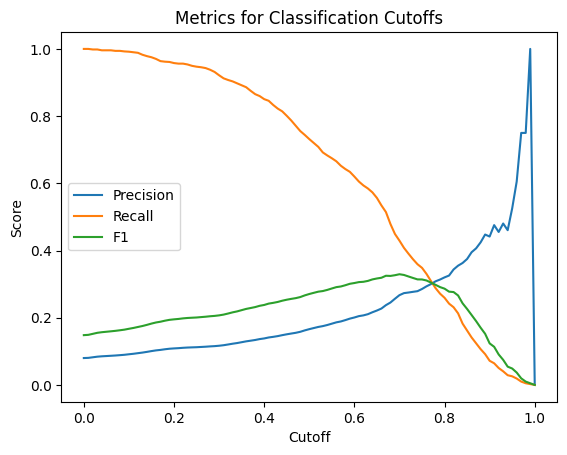

In [172]:
test = np.vstack(xgb_ova_prob + cat_ova_prob[:,1] + lgb_ova_prob + rf_ova_prob[:,1])
test = pd.DataFrame(test, columns=['odds'])
test['race_id'] = test_data['race_id'].reset_index(drop=True)
test['pred'] = np.where(test['odds'] == test.groupby('race_id')['odds'].transform('max'), 1, 0)
# minmax scale odds
test['odds'] = (test['odds'] - test['odds'].min()) / (test['odds'].max() - test['odds'].min())
cutoffSearch(test['odds'])

In [147]:
y_pred =test['odds'].apply(lambda x: 1 if x > 0.7 else 0)
print(classification_report(TestYClassOVA,y_pred))
print(roc_auc_score(TestYClassOVA, test['odds']))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     13927
           1       0.27      0.43      0.33      1211

    accuracy                           0.86     15138
   macro avg       0.61      0.66      0.63     15138
weighted avg       0.89      0.86      0.87     15138

0.7834612080438065


### Balanced

In [139]:
xtest = xgb.DMatrix(catxtest, enable_categorical=True)
xgb_ova = XGB_Class_Balance()
xgb_bal_prob = xgb_ova.predict(xtest)

In [140]:
cat_ova = Cat_Class_Balance()
cat_bal_prob = cat_ova.predict_proba(catxtest)

In [141]:
lgb_ova = Light_Class_Balance()
lgb_bal_prob = lgb_ova.predict(catxtest)

In [142]:
rf_ova = RF_OVA()
rf_bal_prob = rf_ova.predict_proba(X_test)

Largest F1: [0.33021605933569814, 0.66]
Largest precision: [1.0, 0.99]
Largest recall: [1.0, 0.0]


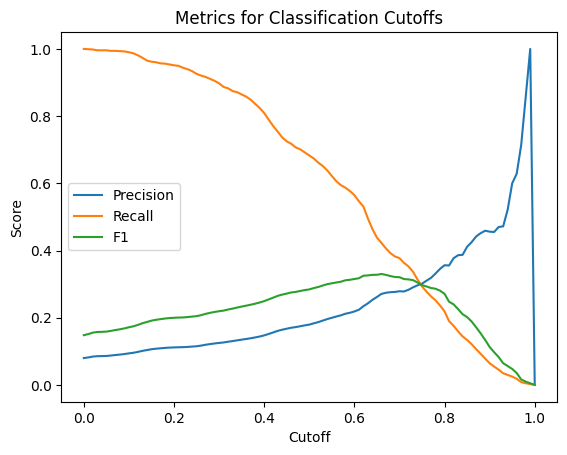

In [148]:
test = np.vstack(xgb_bal_prob + cat_bal_prob[:,1] + lgb_bal_prob + rf_bal_prob[:,1])
test = pd.DataFrame(test, columns=['odds'])
test['race_id'] = test_data['race_id'].reset_index(drop=True)
test['pred'] = np.where(test['odds'] == test.groupby('race_id')['odds'].transform('max'), 1, 0)
test['odds'] = (test['odds'] - test['odds'].min()) / (test['odds'].max() - test['odds'].min())
cutoffSearch(test['odds'])

In [149]:
y_pred =test['odds'].apply(lambda x: 1 if x > 0.66 else 0)
print(classification_report(TestYClassOVA,y_pred))
print(roc_auc_score(TestYClassOVA, test['odds']))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     13927
           1       0.27      0.42      0.33      1211

    accuracy                           0.86     15138
   macro avg       0.61      0.66      0.63     15138
weighted avg       0.89      0.86      0.88     15138

0.783821112291489


## Rank

In [98]:
def predict(model, df):
    return model.predict(df.loc[:, ~df.columns.isin(['race_id'])])

In [99]:
model = XGB_Rank()
grouped_test = X_test.copy()
grouped_test['race_id'] = test_data['race_id'].copy()
xgb_scores = (grouped_test.groupby('race_id')
               .apply(lambda x: predict(model, x)))

In [101]:
X_testCatR = test_data_cat.loc[:, ~test_data_cat.columns.isin(['result','finish_time'])].copy()
model = Cat_Rank()
cat_scores = (X_testCatR.groupby('race_id')
               .apply(lambda x: predict(model, x)))

In [103]:
model = Light_Rank()
grouped_test = X_test.copy()
grouped_test['race_id'] = test_data['race_id'].copy()
lgb_scores = (grouped_test.groupby('race_id')
               .apply(lambda x: predict(model, x)))

In [105]:
test = xgb_scores + lgb_scores + cat_scores
predictions = test.apply(lambda x: np.argsort(x) + 1)
test_rank = np.hstack(predictions)
print(classification_report(TestYClass['result'],test_rank))
BettingResults(test_rank)

              precision    recall  f1-score   support

           1       0.10      0.10      0.10      1211
           2       0.08      0.08      0.08      1212
           3       0.08      0.08      0.08      1214
           4       0.08      0.08      0.08      1209
           5       0.08      0.08      0.08      1208
           6       0.08      0.08      0.08      1209
           7       0.10      0.10      0.10      1202
           8       0.09      0.09      0.09      1201
           9       0.09      0.09      0.09      1188
          10       0.10      0.10      0.10      1165
          11       0.08      0.08      0.08      1135
          12       0.09      0.09      0.09      1026
          13       0.09      0.09      0.09       526
          14       0.08      0.08      0.08       432

    accuracy                           0.09     15138
   macro avg       0.09      0.09      0.09     15138
weighted avg       0.09      0.09      0.09     15138

win: 0.09834710743801653


In [106]:
model = XGB_Rank()
grouped_test = X_test.copy()
grouped_test['race_id'] = test_data['race_id'].copy()
xgb_scores = (grouped_test.groupby('race_id')
               .apply(lambda x: predict(model, x)))
predictions = xgb_scores.apply(lambda x: np.argsort(x) + 1)
xgb_rank = np.hstack(predictions)
xgb_rank = np.vstack(xgb_rank)

In [107]:
X_testCatR = test_data_cat.loc[:, ~test_data_cat.columns.isin(['result','finish_time'])].copy()
model = Cat_Rank()
cat_scores = (X_testCatR.groupby('race_id')
               .apply(lambda x: predict(model, x)))
predictions = cat_scores.apply(lambda x: np.argsort(x) + 1)
cat_rank = np.hstack(predictions)
cat_rank = np.vstack(cat_rank)

In [108]:
model = Light_Rank()
grouped_test = X_test.copy()
grouped_test['race_id'] = test_data['race_id'].copy()
lgb_scores = (grouped_test.groupby('race_id')
               .apply(lambda x: predict(model, x)))
predictions = lgb_scores.apply(lambda x: np.argsort(x) + 1)
lgb_rank = np.hstack(predictions)
lgb_rank = np.vstack(lgb_rank)

In [109]:
votes = np.column_stack((lgb_rank,xgb_rank,cat_rank))
result = mode(votes, axis=1)
result = np.hstack(result.mode)
print(classification_report(TestYClass['result'],result))
BettingResults(result)

              precision    recall  f1-score   support

           1       0.11      0.18      0.13      1211
           2       0.09      0.13      0.10      1212
           3       0.08      0.11      0.09      1214
           4       0.08      0.10      0.09      1209
           5       0.09      0.10      0.09      1208
           6       0.09      0.09      0.09      1209
           7       0.09      0.08      0.08      1202
           8       0.09      0.07      0.08      1201
           9       0.09      0.07      0.08      1188
          10       0.09      0.06      0.07      1165
          11       0.09      0.06      0.07      1135
          12       0.10      0.06      0.08      1026
          13       0.10      0.06      0.08       526
          14       0.11      0.06      0.08       432

    accuracy                           0.09     15138
   macro avg       0.09      0.09      0.09     15138
weighted avg       0.09      0.09      0.09     15138

win: 0.17768595041322313


## Reg

Ensemble voting for regression is averaging the combined outputs of the different models. Therefore deciding the ranks of the horses can be done by sorting the total of these averaged outputs

In [65]:
testxgb = xgb.DMatrix(catxtest, enable_categorical=True)
xgb_model = XGB_Reg()
xgb_times = xgb_model.predict(testxgb)

In [66]:
print(xgb_times)

[82.90376  82.90376  83.10608  ... 69.77258  70.509415 70.84948 ]


In [67]:
cat_model = Cat_Reg()
cat_times = cat_model.predict(catxtest)

In [68]:
print(cat_times)

[83.47811965 83.14875227 83.54413533 ... 69.44889625 69.8392772
 70.22464859]


In [69]:
lgb_model = Light_Reg()
lgb_times = lgb_model.predict(catxtest)

In [70]:
print(lgb_times)

[83.22880318 83.16555913 83.24333992 ... 69.89853314 70.09069237
 70.39253784]


In [71]:
soft_vote_reg = ((xgb_times + cat_times + lgb_times) / 3)
RegResults(soft_vote_reg)

              precision    recall  f1-score   support

           1       0.23      0.23      0.23      1211
           2       0.14      0.14      0.14      1212
           3       0.11      0.11      0.11      1214
           4       0.10      0.10      0.10      1209
           5       0.11      0.11      0.11      1208
           6       0.10      0.10      0.10      1209
           7       0.10      0.10      0.10      1202
           8       0.10      0.10      0.10      1201
           9       0.13      0.13      0.13      1188
          10       0.13      0.13      0.13      1165
          11       0.15      0.15      0.15      1135
          12       0.18      0.18      0.18      1026
          13       0.17      0.17      0.17       526
          14       0.24      0.24      0.24       432

    accuracy                           0.13     15138
   macro avg       0.14      0.14      0.14     15138
weighted avg       0.13      0.13      0.13     15138



win: 0.2305785123966942

In [137]:
xgb_reg_votes = RegResults(xgb_times, results=False)
lgb_reg_votes = RegResults(lgb_times, results=False)
cat_reg_votes = RegResults(cat_times, results=False)
reg_test = pd.concat([xgb_reg_votes, lgb_reg_votes, cat_reg_votes], axis=1, keys=['xgb','lgb','cat'])
print(reg_test)
results = reg_test.mode(axis=1)[0].astype(int)
print(classification_report(TestYClass['result'],results))
BettingResults(results)

       xgb  lgb  cat
0        3    7    7
1        3    5    3
2        5    8    9
3        4    4    8
4        2    3    5
...    ...  ...  ...
15133    5    7   10
15134    2    6    5
15135    3    5    3
15136    5    8    7
15137    7    9   11

[15138 rows x 3 columns]
0        7
1        3
2        5
3        4
4        2
        ..
15133    5
15134    2
15135    3
15136    5
15137    7
Name: 0, Length: 15138, dtype: int32
              precision    recall  f1-score   support

           1       0.18      0.38      0.25      1211
           2       0.13      0.24      0.16      1212
           3       0.09      0.15      0.11      1214
           4       0.08      0.12      0.10      1209
           5       0.09      0.11      0.10      1208
           6       0.09      0.09      0.09      1209
           7       0.09      0.07      0.08      1202
           8       0.09      0.06      0.08      1201
           9       0.10      0.05      0.07      1188
          10       0.11

# Neural Nets

In [86]:
def plot_losses(history, metric,val_metric):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    axes[0].plot(history.history['loss'], label='Train Loss')
    axes[0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0].set_title('Model Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend(loc='upper right')

    axes[1].plot(history.history[metric], label=f'Train {metric}')
    axes[1].plot(history.history[val_metric], label=f'Validation {metric}')
    axes[1].set_title(f'Model {metric}')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel(f'{metric}')
    axes[1].legend(loc='upper right')

    plt.tight_layout()
    plt.show()

## Regression

In [47]:
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X=TrainXNN)
Eval_train = minmax.transform(X=EvalX)
y_train = TrainYRegNN
y_eval = EvalReg


def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


def create_optimizer(trial):
    kwargs = {}
    optimizer_options = ["RMSprop", "Adam", "SGD"]
    optimizer_selected = trial.suggest_categorical("optimizer", optimizer_options)
    if optimizer_selected == "RMSprop":
        kwargs["learning_rate"] = trial.suggest_float(
            "rmsprop_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["decay"] = trial.suggest_float("rmsprop_weight_decay", 0.85, 0.99)
        kwargs["momentum"] = trial.suggest_float("rmsprop_momentum", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "Adam":
        kwargs["learning_rate"] = trial.suggest_float("adam_learning_rate", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "SGD":
        kwargs["learning_rate"] = trial.suggest_float(
            "sgd_opt_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["momentum"] = trial.suggest_float("sgd_opt_momentum", 1e-5, 1e-1, log=True)

    optimizer = getattr(tf.optimizers, optimizer_selected)(**kwargs)
    return optimizer

def objective(trial):
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5),
        optuna.integration.TFKerasPruningCallback(trial, monitor="val_auc"),
    ]
    
    optimizer = create_optimizer(trial)
    activation_0 =  trial.suggest_categorical("activation_0", ["relu","elu","selu","sigmoid"])
    activation_1 = trial.suggest_categorical("activation_1", ["relu","elu","selu","sigmoid"])
    activation_2 = trial.suggest_categorical("activation_2", ["relu","elu","selu","sigmoid"])
    n_layers0 = trial.suggest_int('n_layers0', 1, 3)
    n_layers1 = trial.suggest_int('n_layers1', 0, 4)
    n_layers2 = trial.suggest_int('n_layers2', 0, 4)
    batchsize = trial.suggest_int('batch_size', 100, 1028)
    epochs = trial.suggest_int('epochs', 10,60)
    validation_split = trial.suggest_float('validation', 0,0.4)
    
    
    model = tf.keras.Sequential()
    for i in range(n_layers0):
        n_units = trial.suggest_int("n0_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units,activation=activation_0))
    
    dropout_rate0 = trial.suggest_float("Dropout0", 0.0, 0.3) 
    model.add(tf.keras.layers.Dropout(dropout_rate0))
        
    for i in range(n_layers1):
        nb_units = trial.suggest_int("n1_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units))
        model.add(tf.keras.layers.Dense(n_units,activation=activation_1))
    
    dropout_rate1 = trial.suggest_float("Dropout1", 0.0, 0.3)
    model.add(tf.keras.layers.Dropout(dropout_rate1))
    
    for i in range(n_layers2):
        n_units = trial.suggest_int("n2_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units,activation=activation_2))
    
        
    model.add(tf.keras.layers.Dense(1, activation='relu'))
    # Compile and train the model
    model.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batchsize,
              validation_split=validation_split, verbose=0, callbacks=callbacks)
    results = model.evaluate(Eval_train, y_eval, batch_size=batchsize, verbose=1, return_dict=True)
    return results['root_mean_squared_error']

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=2, reduction_factor=3),direction="minimize")
study.optimize(objective, n_trials=200,show_progress_bar=True, timeout=3600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


  0%|          | 0/200 [00:00<?, ?it/s]

34/34 [==============================] - 0s 2ms/step - loss: 1.4046 - root_mean_squared_error: 1.1852
Number of finished trials: 181
Best trial:
  Value: 1.066412091255188
  Params: 
    optimizer: Adam
    adam_learning_rate: 0.00011090273674892206
    activation_0: relu
    activation_1: elu
    activation_2: elu
    n_layers0: 2
    n_layers1: 0
    n_layers2: 0
    batch_size: 380
    epochs: 56
    validation: 0.03078309045423964
    n0_units_l0: 973
    n0_units_l1: 547
    Dropout0: 0.27697404041954876
    Dropout1: 0.2985631805522835


In [55]:
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X=TrainXNN)
y_train = TrainYRegNN
tester = minmax.transform(X_test)
learning_rate = 0.00011090273674892206
batch_size = 380
epochs = 13
validation_split = 0.03078309045423964
dropout_rate_1 = 0.27697404041954876
dropout_rate_2 = 0.2985631805522835

def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(973, activation='relu'),
        tf.keras.layers.Dense(547, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate_1),
        tf.keras.layers.Dropout(dropout_rate_2),
        tf.keras.layers.Dense(1, activation='relu')
    ])
    return model


model = build_model()

optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, 
              loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

history_reg = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=validation_split, verbose=1)

results = model.predict(tester,verbose=1)
RegResults(results)

Epoch 1/13
124/124 [==============================] - 2s 16ms/step - loss: 4831.9219 - root_mean_squared_error: 69.5120 - val_loss: 365.4202 - val_root_mean_squared_error: 19.1160
Epoch 2/13
124/124 [==============================] - 2s 15ms/step - loss: 338.8492 - root_mean_squared_error: 18.4079 - val_loss: 290.0666 - val_root_mean_squared_error: 17.0313
Epoch 3/13
124/124 [==============================] - 2s 15ms/step - loss: 288.8293 - root_mean_squared_error: 16.9950 - val_loss: 246.4902 - val_root_mean_squared_error: 15.7000
Epoch 4/13
124/124 [==============================] - 2s 16ms/step - loss: 250.2207 - root_mean_squared_error: 15.8184 - val_loss: 211.9286 - val_root_mean_squared_error: 14.5578
Epoch 5/13
124/124 [==============================] - 2s 16ms/step - loss: 214.7628 - root_mean_squared_error: 14.6548 - val_loss: 173.4335 - val_root_mean_squared_error: 13.1694
Epoch 6/13
124/124 [==============================] - 2s 16ms/step - loss: 179.0133 - root_mean_squared_

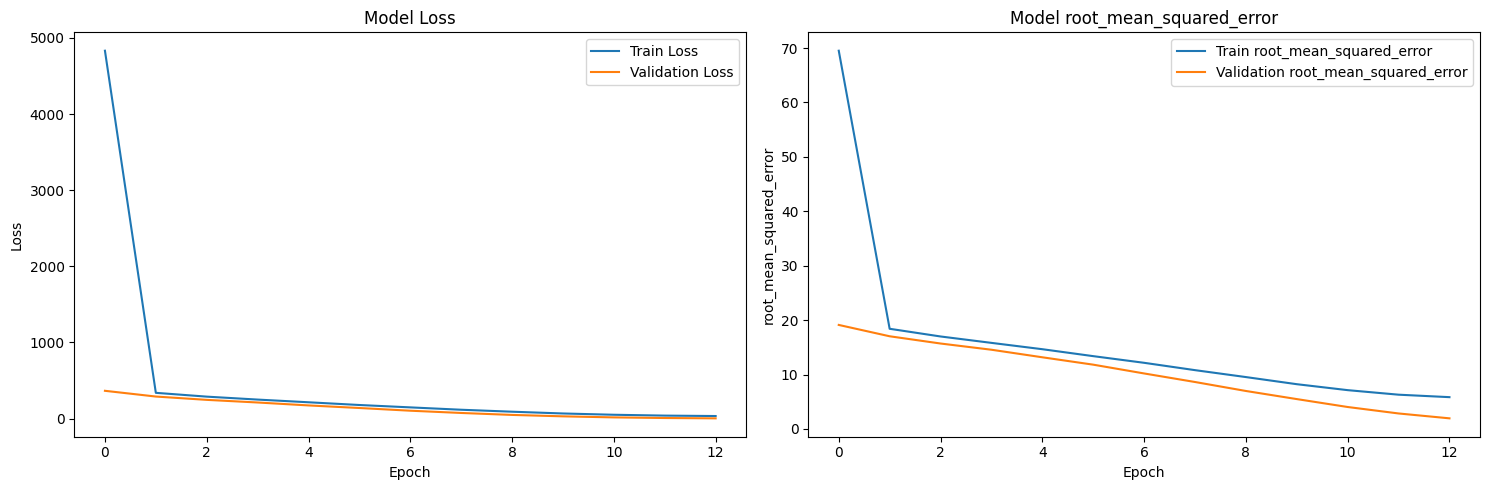

In [56]:
plot_losses(history_reg, "root_mean_squared_error", "val_root_mean_squared_error")

## Classification

In [46]:
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X=TrainXNN)
Eval_train = minmax.transform(X=EvalX)
y_train = TrainYClassNN - 1
y_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=14)
y_eval = EvalY['result'] - 1
y_eval = tf.keras.utils.to_categorical(y_eval, num_classes=14)


def create_optimizer(trial):
    kwargs = {}
    optimizer_options = ["RMSprop", "Adam", "SGD"]
    optimizer_selected = trial.suggest_categorical("optimizer", optimizer_options)
    if optimizer_selected == "RMSprop":
        kwargs["learning_rate"] = trial.suggest_float(
            "rmsprop_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["decay"] = trial.suggest_float("rmsprop_weight_decay", 0.85, 0.99)
        kwargs["momentum"] = trial.suggest_float("rmsprop_momentum", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "Adam":
        kwargs["learning_rate"] = trial.suggest_float("adam_learning_rate", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "SGD":
        kwargs["learning_rate"] = trial.suggest_float(
            "sgd_opt_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["momentum"] = trial.suggest_float("sgd_opt_momentum", 1e-5, 1e-1, log=True)

    optimizer = getattr(tf.optimizers, optimizer_selected)(**kwargs)
    return optimizer

def objective(trial):
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5),
        optuna.integration.TFKerasPruningCallback(trial, monitor="val_auc"),
    ]
    
    optimizer = create_optimizer(trial)
    activation_0 =  trial.suggest_categorical("activation_0", ["relu","elu","selu","sigmoid"])
    activation_1 = trial.suggest_categorical("activation_1", ["relu","elu","selu","sigmoid"])
    activation_2 = trial.suggest_categorical("activation_2", ["relu","elu","selu","sigmoid"])
    n_layers0 = trial.suggest_int('n_layers0', 1, 3)
    n_layers1 = trial.suggest_int('n_layers1', 0, 4)
    n_layers2 = trial.suggest_int('n_layers2', 0, 4)
    batchsize = trial.suggest_int('batch_size', 100, 1028)
    epochs = trial.suggest_int('epochs', 10,60)
    validation_split = trial.suggest_float('validation', 0,0.4)
    
    
    model = tf.keras.Sequential()
    tf.keras.layers.InputLayer(input_shape=(48462,)),
    for i in range(n_layers0):
        n_units = trial.suggest_int("n0_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units,activation=activation_0))
        
    dropout_rate0 = trial.suggest_float("Dropout0", 0.0, 0.3)
    model.add(tf.keras.layers.Dropout(dropout_rate0))
    
    for i in range(n_layers1):
        n_units = trial.suggest_int("n1_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units))
        model.add(tf.keras.layers.Dense(n_units,activation=activation_1))
    
    dropout_rate1 = trial.suggest_float("Dropout1", 0.0, 0.3)
    model.add(tf.keras.layers.Dropout(dropout_rate1))
    
    for i in range(n_layers2):
        n_units = trial.suggest_int("n2_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units,activation=activation_2))
        
    model.add(tf.keras.layers.Dense(14, activation='softmax'))
    # Compile and train the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_one_hot, epochs=epochs, batch_size=batchsize,
              validation_split=validation_split, verbose=0, callbacks=callbacks)
    results = model.evaluate(Eval_train, y_eval, batch_size=batchsize, verbose=1, return_dict=True)
    return results['accuracy']

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=2, reduction_factor=3),direction="maximize")
study.optimize(objective, n_trials=200,show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


  0%|          | 0/200 [00:00<?, ?it/s]

85/85 [==============================] - 0s 2ms/step - loss: 2.4244 - accuracy: 0.1374
Number of finished trials: 200
Best trial:
  Value: 0.14624278247356415
  Params: 
    optimizer: Adam
    adam_learning_rate: 0.00021819697101073022
    activation_0: elu
    activation_1: sigmoid
    activation_2: sigmoid
    n_layers0: 2
    n_layers1: 1
    n_layers2: 0
    batch_size: 101
    epochs: 42
    validation: 0.09897501604774267
    n0_units_l0: 149
    n0_units_l1: 10
    Dropout0: 0.24513409005642775
    n1_units_l0: 119
    Dropout1: 0.014123172318262262


In [60]:
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X=TrainX)
y_train = TrainYClass['result'] - 1
y_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=14)
tester = minmax.transform(X_test)

learning_rate = 0.00021819697101073022
batch_size = 101
epochs = 23
validation_split = 0.09897501604774267
dropout_rate_1 = 0.24513409005642775
dropout_rate_2 = 0.014123172318262262


def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(585, activation='elu'),
        tf.keras.layers.Dense(27, activation='elu'),
        tf.keras.layers.Dropout(dropout_rate_1),
        tf.keras.layers.Dense(16, activation='sigmoid'),
        tf.keras.layers.Dropout(dropout_rate_2),
        tf.keras.layers.Dense(14, activation='softmax')
    ])
    return model


model = build_model()

optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history_all = model.fit(X_train, 
                    y_one_hot, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_split=validation_split, 
                    verbose=1)

results = model.predict(tester,verbose=1)
results = np.argmax(results,axis=1)+1
print(classification_report(TestYClass['result'],np.rint(results)))
BettingResults(results)

Epoch 1/23
541/541 [==============================] - 3s 5ms/step - loss: 2.6325 - accuracy: 0.0878 - val_loss: 2.5713 - val_accuracy: 0.0946
Epoch 2/23
541/541 [==============================] - 2s 4ms/step - loss: 2.5417 - accuracy: 0.1025 - val_loss: 2.4970 - val_accuracy: 0.1136
Epoch 3/23
541/541 [==============================] - 2s 4ms/step - loss: 2.4911 - accuracy: 0.1175 - val_loss: 2.4707 - val_accuracy: 0.1268
Epoch 4/23
541/541 [==============================] - 3s 5ms/step - loss: 2.4712 - accuracy: 0.1274 - val_loss: 2.4556 - val_accuracy: 0.1349
Epoch 5/23
541/541 [==============================] - 2s 5ms/step - loss: 2.4607 - accuracy: 0.1296 - val_loss: 2.4466 - val_accuracy: 0.1351
Epoch 6/23
541/541 [==============================] - 3s 5ms/step - loss: 2.4534 - accuracy: 0.1311 - val_loss: 2.4394 - val_accuracy: 0.1394
Epoch 7/23
541/541 [==============================] - 3s 5ms/step - loss: 2.4476 - accuracy: 0.1312 - val_loss: 2.4362 - val_accuracy: 0.1331
Epoch 

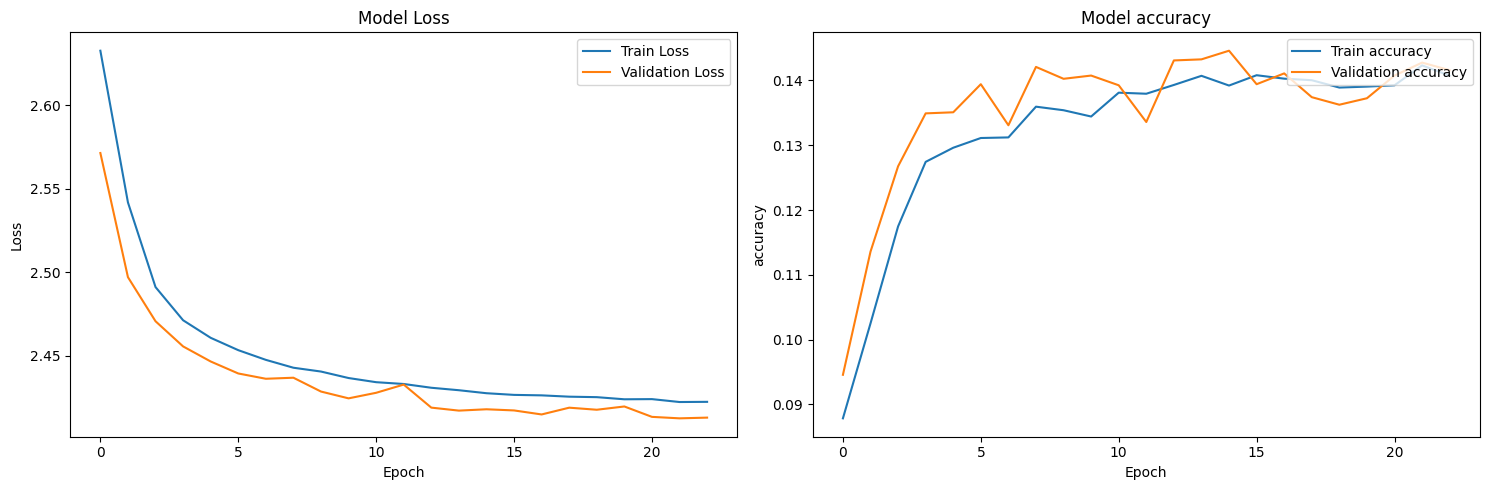

In [61]:
plot_losses(history_all, "accuracy", "val_accuracy")

In [48]:
X_train = TrainXNN
y_train = TrainYOVANN
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X=X_train)


X_eval = minmax.transform(EvalX)

def create_optimizer(trial):
    kwargs = {}
    optimizer_options = ["RMSprop", "Adam", "SGD"]
    optimizer_selected = trial.suggest_categorical("optimizer", optimizer_options)
    if optimizer_selected == "RMSprop":
        kwargs["learning_rate"] = trial.suggest_float(
            "rmsprop_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["decay"] = trial.suggest_float("rmsprop_weight_decay", 0.85, 0.99)
        kwargs["momentum"] = trial.suggest_float("rmsprop_momentum", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "Adam":
        kwargs["learning_rate"] = trial.suggest_float("adam_learning_rate", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "SGD":
        kwargs["learning_rate"] = trial.suggest_float(
            "sgd_opt_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["momentum"] = trial.suggest_float("sgd_opt_momentum", 1e-5, 1e-1, log=True)

    optimizer = getattr(tf.optimizers, optimizer_selected)(**kwargs)
    return optimizer

def objective(trial):
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5),
        optuna.integration.TFKerasPruningCallback(trial, monitor="val_auc"),
    ]
    
    optimizer = create_optimizer(trial)
    activation_0 =  trial.suggest_categorical("activation_0", ["relu","elu","selu","sigmoid"])
    activation_1 = trial.suggest_categorical("activation_1", ["relu","elu","selu","sigmoid"])
    activation_2 = trial.suggest_categorical("activation_2", ["relu","elu","selu","sigmoid"])
    n_layers0 = trial.suggest_int('n_layers0', 1, 3)
    n_layers1 = trial.suggest_int('n_layers1', 0, 4)
    n_layers2 = trial.suggest_int('n_layers2', 0, 4)
    batchsize = trial.suggest_int('batch_size', 100, 1028)
    epochs = trial.suggest_int('epochs', 10,60)
    validation_split = trial.suggest_float('validation', 0,0.4)
    
    
    model = tf.keras.Sequential()
    for i in range(n_layers0):
        n_units = trial.suggest_int("n0_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units,activation=activation_0))

    dropout_rate0 = trial.suggest_float("Dropout0", 0.0, 0.3)
    model.add(tf.keras.layers.Dropout(dropout_rate0))
    
    for i in range(n_layers1):
        n_units = trial.suggest_int("n1_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units))
        model.add(tf.keras.layers.Dense(n_units,activation=activation_1))

    dropout_rate1 = trial.suggest_float("Dropout1", 0.0, 0.3)
    model.add(tf.keras.layers.Dropout(dropout_rate1))
    
    for i in range(n_layers2):
        n_units = trial.suggest_int("n2_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units,activation=activation_2))
        
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batchsize,
              validation_split=validation_split, verbose=0, callbacks=callbacks)
    results = model.evaluate(X_eval, EvalYOVA, batch_size=batchsize, verbose=1, return_dict=True)
    return results['auc']

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=2, reduction_factor=3),direction="maximize")
study.optimize(objective, n_trials=200,show_progress_bar=True)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


  0%|          | 0/200 [00:00<?, ?it/s]

19/19 [==============================] - 0s 5ms/step - loss: 0.2403 - auc: 0.7820
Number of finished trials: 200
Best trial:
  Value: 0.7820353507995605
  Params: 
    optimizer: Adam
    adam_learning_rate: 0.004400922604171722
    activation_0: sigmoid
    activation_1: selu
    activation_2: relu
    n_layers0: 3
    n_layers1: 2
    n_layers2: 3
    batch_size: 643
    epochs: 38
    validation: 0.06301704971664474
    n0_units_l0: 6
    n0_units_l1: 28
    n0_units_l2: 97
    Dropout0: 0.06450666988480641
    n1_units_l0: 4
    n1_units_l1: 155
    Dropout1: 0.24103358265835675
    n2_units_l0: 398
    n2_units_l1: 15
    n2_units_l2: 40


Epoch 1/80
45/45 [==============================] - 1s 13ms/step - loss: 0.3333 - auc: 0.5088 - val_loss: 0.2785 - val_auc: 0.5000
Epoch 2/80
45/45 [==============================] - 0s 8ms/step - loss: 0.2826 - auc: 0.4982 - val_loss: 0.2786 - val_auc: 0.5000
Epoch 3/80
45/45 [==============================] - 0s 7ms/step - loss: 0.2801 - auc: 0.5019 - val_loss: 0.2786 - val_auc: 0.5000
Epoch 4/80
45/45 [==============================] - 0s 7ms/step - loss: 0.2799 - auc: 0.5038 - val_loss: 0.2793 - val_auc: 0.5000
Epoch 5/80
45/45 [==============================] - 0s 7ms/step - loss: 0.2806 - auc: 0.5092 - val_loss: 0.2798 - val_auc: 0.5000
Epoch 6/80
45/45 [==============================] - 0s 7ms/step - loss: 0.2810 - auc: 0.4957 - val_loss: 0.2800 - val_auc: 0.5015
Epoch 7/80
45/45 [==============================] - 0s 7ms/step - loss: 0.2789 - auc: 0.5266 - val_loss: 0.2776 - val_auc: 0.7090
Epoch 8/80
45/45 [==============================] - 0s 7ms/step - loss: 0.2648 - auc: 0.6

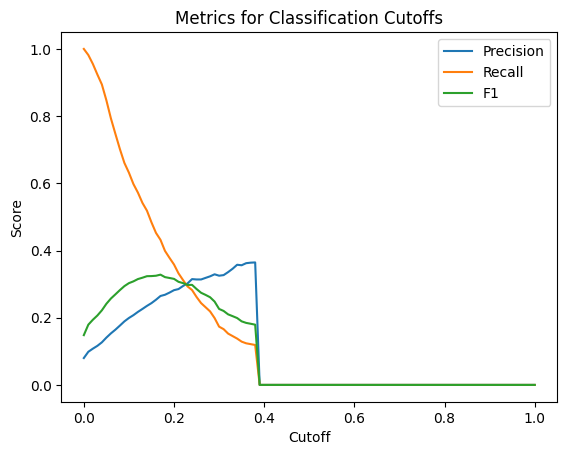

In [84]:
X_train = TrainXNN
y_train = TrainYOVANN
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)

max_placement = y_train.max()

learning_rate = 0.004400922604171722
batch_size = 1024
epochs = 80
validation_split = 0.06301704971664474
dropout_rate_1 = 0.3
dropout_rate_2 = 0.3

def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(6, activation='sigmoid'),
        tf.keras.layers.Dense(28, activation='sigmoid'),
        tf.keras.layers.Dense(97, activation='sigmoid'),
        tf.keras.layers.Dropout(dropout_rate_1),
        tf.keras.layers.Dense(4, activation='selu'),
        tf.keras.layers.Dense(155, activation='selu'),
        tf.keras.layers.Dropout(dropout_rate_2),
        tf.keras.layers.Dense(398, activation='relu'),
        tf.keras.layers.Dense(15, activation='relu'),
        tf.keras.layers.Dense(40, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model


model = build_model()

optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy', 
              metrics=['AUC'])

history_ova = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_split=validation_split, 
                    verbose=1)

xtest = minmax.transform(X_test)
results = model.predict(xtest,verbose=1)
cutoffSearch(results)

In [85]:
y_pred = [1 if prob > 0.17 else 0 for prob in results]
print(classification_report(TestYClassOVA,y_pred))
print(roc_auc_score(TestYClassOVA,results))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     13927
           1       0.26      0.43      0.33      1211

    accuracy                           0.86     15138
   macro avg       0.61      0.66      0.62     15138
weighted avg       0.89      0.86      0.87     15138

0.7839975661697598


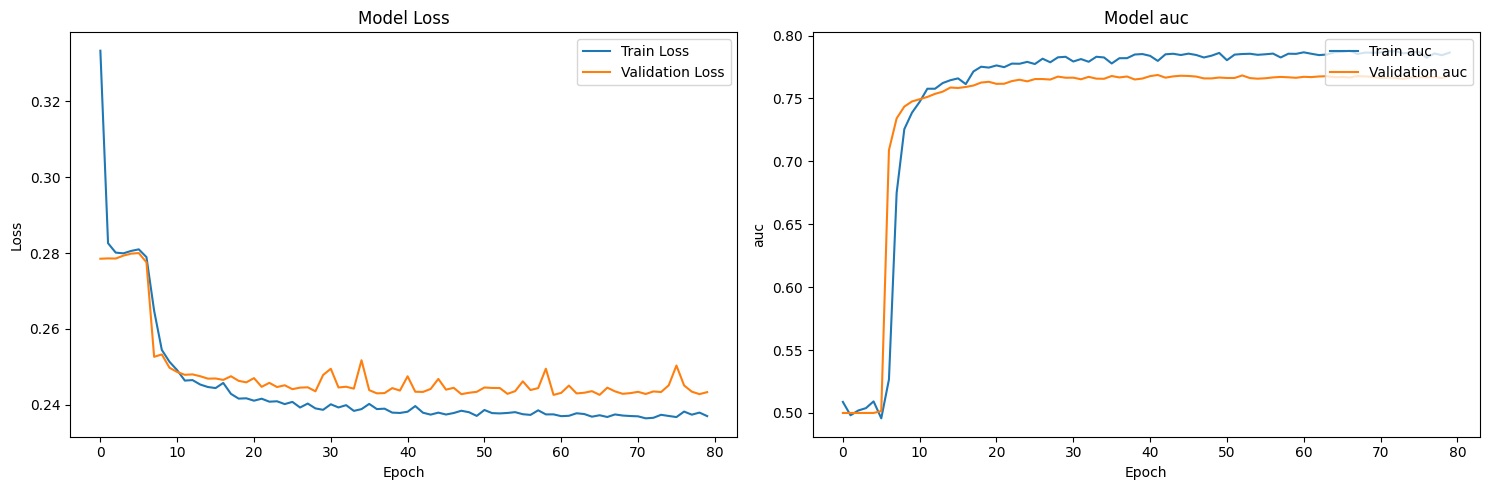

In [87]:
plot_losses(history_ova, "auc","val_auc")

In [42]:
X_train = TrainXOVABalancedNN
y_train = TrainYOVABalancedNN
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X=X_train)

X_eval = minmax.transform(EvalX)

def create_optimizer(trial):
    kwargs = {}
    optimizer_options = ["RMSprop", "Adam", "SGD"]
    optimizer_selected = trial.suggest_categorical("optimizer", optimizer_options)
    if optimizer_selected == "RMSprop":
        kwargs["learning_rate"] = trial.suggest_float(
            "rmsprop_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["decay"] = trial.suggest_float("rmsprop_weight_decay", 0.85, 0.99)
        kwargs["momentum"] = trial.suggest_float("rmsprop_momentum", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "Adam":
        kwargs["learning_rate"] = trial.suggest_float("adam_learning_rate", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "SGD":
        kwargs["learning_rate"] = trial.suggest_float(
            "sgd_opt_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["momentum"] = trial.suggest_float("sgd_opt_momentum", 1e-5, 1e-1, log=True)

    optimizer = getattr(tf.optimizers, optimizer_selected)(**kwargs)
    return optimizer

def objective(trial):
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5),
        optuna.integration.TFKerasPruningCallback(trial, monitor="val_auc"),
    ]
    
    optimizer = create_optimizer(trial)
    activation_0 =  trial.suggest_categorical("activation_0", ["relu","elu","selu","sigmoid"])
    activation_1 = trial.suggest_categorical("activation_1", ["relu","elu","selu","sigmoid"])
    activation_2 = trial.suggest_categorical("activation_2", ["relu","elu","selu","sigmoid"])
    n_layers0 = trial.suggest_int('n_layers0', 1, 3)
    n_layers1 = trial.suggest_int('n_layers1', 0, 4)
    n_layers2 = trial.suggest_int('n_layers2', 0, 4)
    batchsize = trial.suggest_int('batch_size', 100, 1028)
    epochs = trial.suggest_int('epochs', 10,60)
    validation_split = trial.suggest_float('validation', 0,0.4)
    
    
    model = tf.keras.Sequential()
    for i in range(n_layers0):
        n_units = trial.suggest_int("n0_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units,activation=activation_0))
    
    dropout_rate0 = trial.suggest_float("Dropout0", 0.0, 0.3)
    model.add(tf.keras.layers.Dropout(dropout_rate0))
    
    for i in range(n_layers1):
        n_units = trial.suggest_int("n1_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units))
        model.add(tf.keras.layers.Dense(n_units,activation=activation_1))
    
    dropout_rate1 = trial.suggest_float("Dropout1", 0.0, 0.3)
    model.add(tf.keras.layers.Dropout(dropout_rate1))
    
    for i in range(n_layers2):
        n_units = trial.suggest_int("n2_units_l{}".format(i), 4, 1028, log=True)
        model.add(tf.keras.layers.Dense(n_units,activation=activation_2))

        
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batchsize,
              validation_data=(X_eval, EvalYOVA), verbose=0, callbacks=callbacks)
    return np.mean(history.history['val_auc'])

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    pruner=optuna.pruners.HyperbandPruner(min_resource=2, reduction_factor=3),direction="maximize")
study.optimize(objective, n_trials=200,show_progress_bar=True, timeout = 3600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


  0%|          | 0/200 [00:00<?, ?it/s]

Number of finished trials: 185
Best trial:
  Value: 0.9248223149776459
  Params: 
    optimizer: Adam
    adam_learning_rate: 0.004290818781881419
    activation_0: relu
    activation_1: relu
    activation_2: relu
    n_layers0: 3
    n_layers1: 4
    n_layers2: 1
    batch_size: 165
    epochs: 52
    validation: 0.13356680125529763
    n0_units_l0: 497
    n0_units_l1: 35
    n0_units_l2: 692
    Dropout0: 0.2051722441247401
    n1_units_l0: 49
    n1_units_l1: 9
    n1_units_l2: 14
    n1_units_l3: 10
    Dropout1: 0.17556931689306238
    n2_units_l0: 12


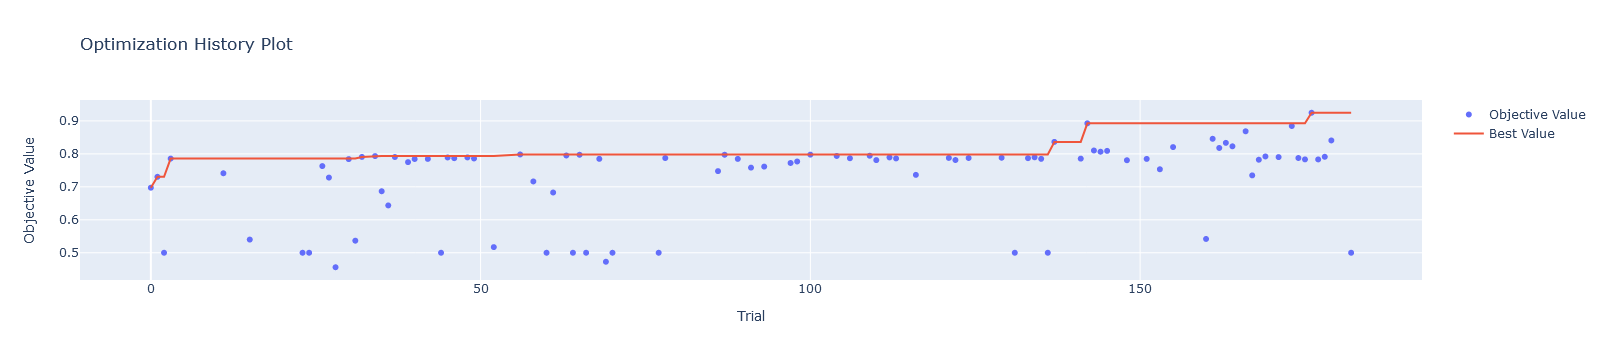

In [43]:
optuna.visualization.plot_optimization_history(study)

In [49]:
study.trials[3].params

{'optimizer': 'Adam',
 'adam_learning_rate': 0.001029067352831741,
 'activation_0': 'elu',
 'activation_1': 'elu',
 'activation_2': 'elu',
 'n_layers0': 2,
 'n_layers1': 1,
 'n_layers2': 1,
 'batch_size': 116,
 'epochs': 15,
 'validation': 0.29328927696489604,
 'n0_units_l0': 23,
 'n0_units_l1': 11,
 'Dropout0': 0.07574433789091202,
 'n1_units_l0': 19,
 'Dropout1': 0.10528709805317851,
 'n2_units_l0': 11}

Epoch 1/15
721/721 [==============================] - 5s 7ms/step - loss: 0.5997 - auc: 0.7344 - val_loss: 0.3611 - val_auc: 0.7493
Epoch 2/15
721/721 [==============================] - 4s 6ms/step - loss: 0.5659 - auc: 0.7733 - val_loss: 0.3358 - val_auc: 0.7396
Epoch 3/15
721/721 [==============================] - 4s 6ms/step - loss: 0.5589 - auc: 0.7813 - val_loss: 0.3327 - val_auc: 0.7066
Epoch 4/15
721/721 [==============================] - 4s 6ms/step - loss: 0.5541 - auc: 0.7862 - val_loss: 0.3512 - val_auc: 0.6923
Epoch 5/15
721/721 [==============================] - 4s 6ms/step - loss: 0.5517 - auc: 0.7882 - val_loss: 0.3679 - val_auc: 0.6954
Epoch 6/15
721/721 [==============================] - 4s 6ms/step - loss: 0.5480 - auc: 0.7921 - val_loss: 0.3685 - val_auc: 0.6575
Epoch 7/15
721/721 [==============================] - 4s 6ms/step - loss: 0.5454 - auc: 0.7945 - val_loss: 0.3758 - val_auc: 0.6466
Epoch 8/15
721/721 [==============================] - 4s 6ms/step - loss: 0.

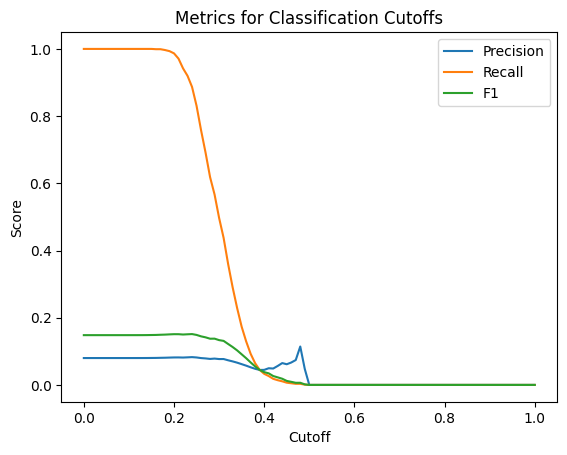

In [88]:
X_train = TrainXOVABalancedNN
y_train = TrainYOVABalancedNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
max_placement = y_train.max()
X_eval = minmax.transform(EvalX)

learning_rate = 0.001029067352831741
batch_size = 116
epochs = 15
validation_split = 0.29328927696489604
dropout_rate_1 = 0.07574433789091202
dropout_rate_2 = 0.10528709805317851

def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(104,)),
        tf.keras.layers.Dense(23, activation='elu'),
        tf.keras.layers.Dense(11, activation='elu'),
        tf.keras.layers.Dropout(dropout_rate_1),
        tf.keras.layers.Dense(19, activation='elu'),
        tf.keras.layers.Dropout(dropout_rate_2),
        tf.keras.layers.Dense(11, activation='elu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model


model = build_model()

optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy', 
              metrics=['AUC'])

history_bal = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(X_eval, EvalYOVA),
                    verbose=1)

xtest = minmax.transform(X_test)
results = model.predict(xtest,verbose=1)
cutoffSearch(results)

In [89]:
y_pred = [1 if prob > 0.24 else 0 for prob in results]
print(classification_report(TestYClassOVA,y_pred))
print(roc_auc_score(TestYClassOVA,results))

              precision    recall  f1-score   support

           0       0.94      0.14      0.25     13927
           1       0.08      0.89      0.15      1211

    accuracy                           0.20     15138
   macro avg       0.51      0.52      0.20     15138
weighted avg       0.87      0.20      0.24     15138

0.48130525708636346


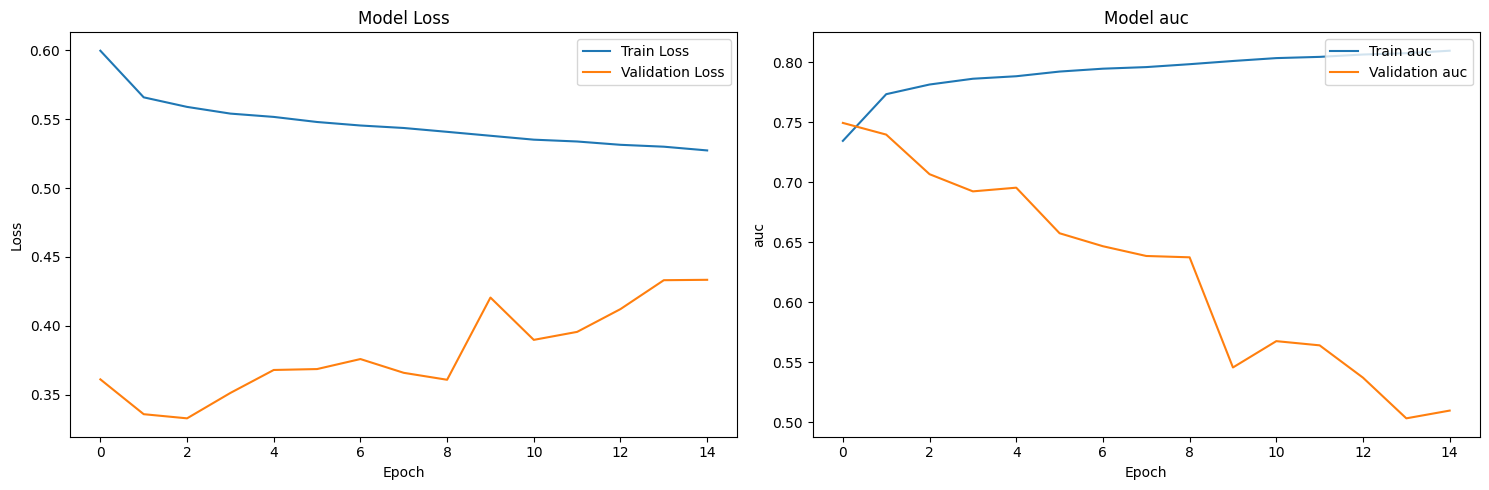

In [90]:
plot_losses(history_bal, 'auc','val_auc')

This is an expected result, given that the model's training data comes from a distinct distribution due to the oversampling of winners. The model quickly adjusts to the characteristics of the training distribution, resulting in significantly inferior performance on the validation set. This contrasts with other models where validation and training losses and metrics exhibit similar trends.